## Datasets & Params¶


In [1]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
# DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
#DATASET_NAME = 'ADULT_SEX'

# Experiment 5
# DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
# DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
# DATASET_NAME = 'NURSERY'

# Experiment 9
# DATASET_NAME = 'DEFAULT_CREDIT'

In [2]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
User uploaded file "diabetes_prediction_dataset.csv" with length 3810356 bytes


## Imports

In [3]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 664.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 895.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 966.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 889.2 kB/s eta 0:00:00
     ━━━━━━━━━━━

## Fairness metrics and functions


In [4]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [5]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [6]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [7]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [8]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [9]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

<ipython-input-9-fc0b70483649>:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)


In [10]:
orig_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [11]:
orig_data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Data_Visualization

In [12]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(4461, 9) (4039, 9) (54091, 9) (37391, 9)


In [13]:
orig_data_one_non_priv

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
26,0,67.0,0,1,not current,27.32,6.5,200,1
38,0,50.0,1,0,current,27.32,5.7,260,1
40,0,73.0,0,0,former,25.91,9.0,160,1
55,0,50.0,0,0,former,37.16,9.0,159,1
81,0,57.0,0,0,No Info,27.32,8.2,126,1
...,...,...,...,...,...,...,...,...,...
99826,0,63.0,0,1,No Info,27.32,6.6,300,1
99829,0,58.0,0,0,former,32.38,6.6,159,1
99867,0,64.0,1,0,former,33.12,5.7,300,1
99897,0,67.0,0,0,current,27.32,6.8,220,1


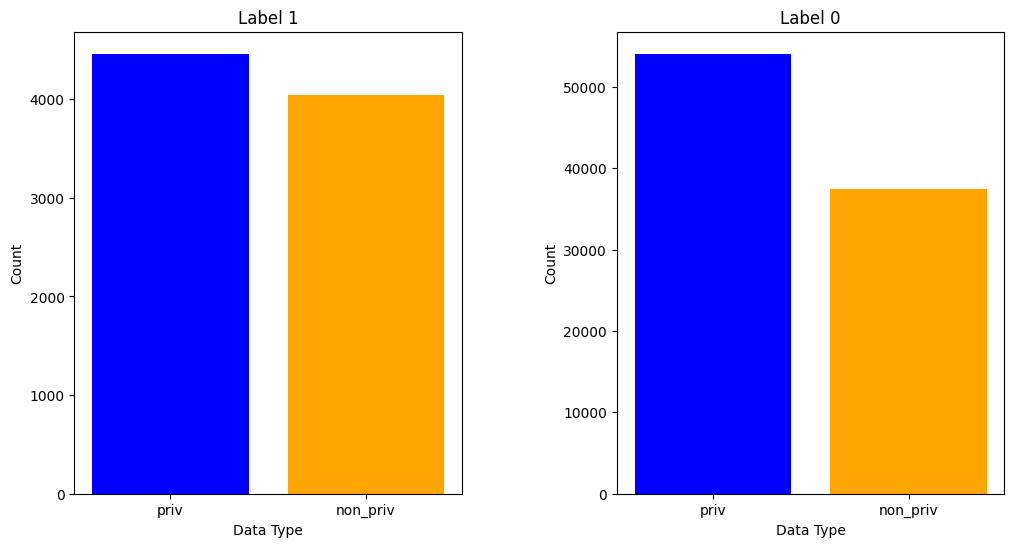

In [14]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [15]:
orig_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [16]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [17]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 tpr:  0.6263982102908278 fn+fp 334
conf matrix:
  [[7503    0]
 [ 300  506]] 
accuracy:  0.96389457215068 precision:  1.0 recall:  0.6277915632754343 fpr:  0.0 tpr:  0.6277915632754343 fn+fp 300
conf matrix:
  [[18297     0]
 [  638  1062]] 
accuracy:  0.9680952142821423 precision:  1.0 recall:  0.6247058823529412 fpr:  0.0 tpr:  0.6247058823529412 fn+fp 638
conf matrix:
  [[10823     0]
 [  329   564]] 
accuracy:  0.9719187435984978 precision:  1.0 recall:  0.631578947368421 fpr:  0.0 tpr:  0.631578947368421 fn+fp 329
conf matrix:
  [[7474    0]
 [ 309  498]] 
accuracy:  0.9626856659823693 precision:  1.0 recall:  0.6171003717472119 fpr:  0.0 tpr:  0.6171003717472119 fn+fp 309
conf matrix:
  [[

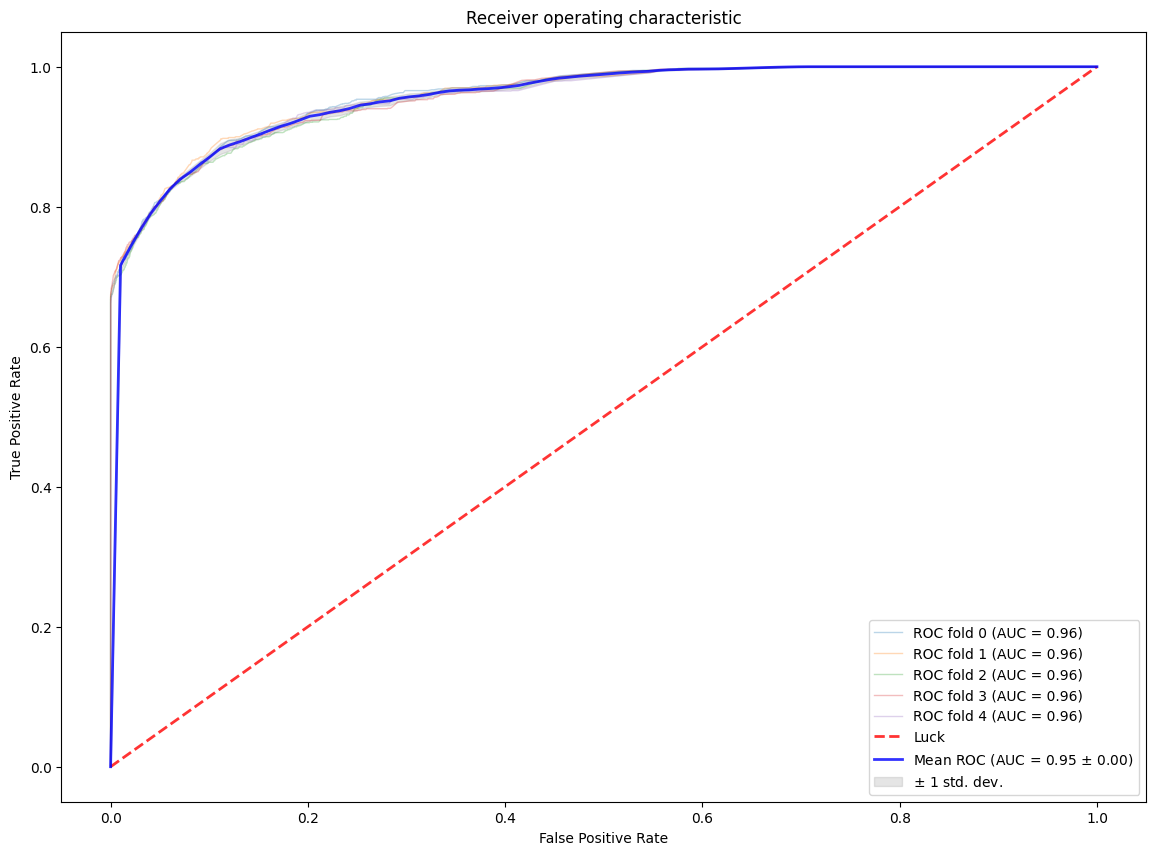

Accaracy list :  [0.968295244286643, 0.9680952142821423, 0.9691438287657531, 0.9712942588517703, 0.9686937387477496]
equal opportunity for tpr :  [0.0013933529846065218, 0.014478575621209133, 0.052148682233147614, 0.0018961129684147426, 0.004618809358157727]
equal opportunity for fpr :  [0.0, 0.0, 0.0, 0.0, 0.0]
odds difference list :  [0.0006966764923032609, 0.007239287810604567, 0.026074341116573807, 0.0009480564842073713, 0.0023094046790788636]
The mean accuracy is  0.969 ± 0.001
The mean equal opportunity for tpr: (close to 0) 0.015 ± 0.019
The mean equal opportunity for fpr: (close to 0) 0.000 ± 0.000
The mean odds difference: (close to 0) 0.007 ± 0.010
The mean parity difference: (close to 0) 0.059 ± 0.018
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [18]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [19]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

37391
54091


In [20]:
unprivileged_data_priv_target

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2,0,28.0,0,0,never,27.32,5.7,158,0
4,0,76.0,1,1,current,20.14,4.8,155,0
8,0,42.0,0,0,never,33.64,4.8,145,0
15,0,78.0,0,0,No Info,27.32,6.6,126,0
16,0,15.0,0,0,never,30.36,6.1,200,0
...,...,...,...,...,...,...,...,...,...
99967,0,25.0,0,0,No Info,27.32,5.8,145,0
99970,0,19.0,0,0,No Info,25.75,5.0,145,0
99972,0,39.0,0,0,No Info,27.32,6.1,100,0
99973,0,22.0,0,0,current,29.65,6.0,80,0


In [21]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-1.74) | Discrim. (-0.04): 100%|██████████| 200/200 [21:31<00:00,  6.46s/it]


# CTGAN On Unpriv Target Group

In [22]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

4039
4461
422


In [23]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (-1.78) | Discrim. (0.01): 100%|██████████| 200/200 [02:07<00:00,  1.57it/s]


In [24]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0.069321,0.321410,0.095349,25.19,6.6,140,0
1,1,54.0,0.069321,0.075312,0.040603,27.32,6.6,80,0
2,0,28.0,0.069321,0.075312,0.095349,27.32,5.7,158,0
3,1,36.0,0.069321,0.075312,0.102089,23.45,5.0,155,0
4,0,76.0,0.278958,0.321410,0.102089,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99977,1,80.0,0.069321,0.075312,0.040603,27.32,6.2,90,0
99978,1,2.0,0.069321,0.075312,0.040603,17.37,6.5,100,0
99979,0,66.0,0.069321,0.075312,0.170017,27.83,5.7,155,0
99980,1,24.0,0.069321,0.075312,0.095349,35.42,4.0,100,0


In [25]:
print(DATASET_NAME)

DIABETES_SEX


Optuna FairUS

In [26]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [27]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 568.1 kB/s eta 0:00:00


In [28]:
!pip install cmaes


In [29]:
import optuna


In [30]:
all_upsampled_acc = []
all_upsampled_op_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_op_diff = mean(upsampled_op_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_op_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_op_diff.append(upsampled_op_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [31]:
# Record the start time
start_time = time.time()

In [ ]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-02 14:55:48,817] A new study created in memory with name: no-name-a278503c-a29d-4b46-8e33-32f2020c28fb


conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 tpr:  0.6263982102908278 fn+fp 334
conf matrix:
  [[7503    0]
 [ 300  506]] 
accuracy:  0.96389457215068 precision:  1.0 recall:  0.6277915632754343 fpr:  0.0 tpr:  0.6277915632754343 fn+fp 300
conf matrix:
  [[18297     0]
 [  638  1062]] 
accuracy:  0.9680952142821423 precision:  1.0 recall:  0.6247058823529412 fpr:  0.0 tpr:  0.6247058823529412 fn+fp 638
conf matrix:
  [[10823     0]
 [  329   564]] 
accuracy:  0.9719187435984978 precision:  1.0 recall:  0.631578947368421 fpr:  0.0 tpr:  0.631578947368421 fn+fp 329
conf matrix:
  [[7474    0]
 [ 309  498]] 
accuracy:  0.9626856659823693 precision:  1.0 recall:  0.6171003717472119 fpr:  0.0 tpr:  0.6171003717472119 fn+fp 309
conf matrix:
  [[

[I 2024-04-02 14:55:59,585] Trial 0 finished with values: [0.01837939670009142, 0.9737063688971009] and parameters: {'lambda_0': 0.48228985232793664, 'lambda_1': 0.031655201410905276}. 


conf matrix:
  [[19907     0]
 [  580  1122]] 
accuracy:  0.9731593317599149 precision:  1.0 recall:  0.6592244418331374 fpr:  0.0 tpr:  0.6592244418331374 fn+fp 580
conf matrix:
  [[10783     0]
 [  324   574]] 
accuracy:  0.9722626487458266 precision:  1.0 recall:  0.6391982182628062 fpr:  0.0 tpr:  0.6391982182628062 fn+fp 324
conf matrix:
  [[9124    0]
 [ 256  548]] 
accuracy:  0.9742143432715552 precision:  1.0 recall:  0.681592039800995 fpr:  0.0 tpr:  0.681592039800995 fn+fp 256
lambda_0: 0.48228985232793664
lambda_1: 0.031655201410905276
---------------------------------------trail upsampled_acc is :  0.9737063688971009
---------------------------------------trail upsampled_op_diff is :  0.03675879340018284
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 14:56:15,198] Trial 1 finished with values: [0.012328652253171193, 0.9749969742711204] and parameters: {'lambda_0': 0.9279707927378351, 'lambda_1': 0.917107495665652}. 


conf matrix:
  [[21395     0]
 [  559  1219]] 
accuracy:  0.9758770983472145 precision:  1.0 recall:  0.6856017997750281 fpr:  0.0 tpr:  0.6856017997750281 fn+fp 559
conf matrix:
  [[10605     0]
 [  271   646]] 
accuracy:  0.9764797778163513 precision:  1.0 recall:  0.7044711014176663 fpr:  0.0 tpr:  0.7044711014176663 fn+fp 271
conf matrix:
  [[10790     0]
 [  288   573]] 
accuracy:  0.975281091751781 precision:  1.0 recall:  0.6655052264808362 fpr:  0.0 tpr:  0.6655052264808362 fn+fp 288
lambda_0: 0.9279707927378351
lambda_1: 0.917107495665652
---------------------------------------trail upsampled_acc is :  0.9749969742711204
---------------------------------------trail upsampled_op_diff is :  0.024638418765077042
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 14:56:33,026] Trial 2 finished with values: [0.007903644548254554, 0.9739624915658605] and parameters: {'lambda_0': 1.2184133544575937, 'lambda_1': 1.2695665004331431}. 


conf matrix:
  [[22365     0]
 [  567  1240]] 
accuracy:  0.9765431077279497 precision:  1.0 recall:  0.6862202545655783 fpr:  0.0 tpr:  0.6862202545655783 fn+fp 567
conf matrix:
  [[10796     0]
 [  294   605]] 
accuracy:  0.9748610517315092 precision:  1.0 recall:  0.6729699666295884 fpr:  0.0 tpr:  0.6729699666295884 fn+fp 294
conf matrix:
  [[11569     0]
 [  273   635]] 
accuracy:  0.9781197403221928 precision:  1.0 recall:  0.6993392070484582 fpr:  0.0 tpr:  0.6993392070484582 fn+fp 273
lambda_0: 1.2184133544575937
lambda_1: 1.2695665004331431
---------------------------------------trail upsampled_acc is :  0.9739624915658605
---------------------------------------trail upsampled_op_diff is :  0.01579017752908953
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 14:56:40,593] Trial 3 finished with values: [0.006126607353087665, 0.9756276356757183] and parameters: {'lambda_0': 1.566327534281448, 'lambda_1': 1.721681165873281}. 


conf matrix:
  [[23527     0]
 [  639  1207]] 
accuracy:  0.9748157490245537 precision:  1.0 recall:  0.6538461538461539 fpr:  0.0 tpr:  0.6538461538461539 fn+fp 639
conf matrix:
  [[10763     0]
 [  311   582]] 
accuracy:  0.973318462594372 precision:  1.0 recall:  0.6517357222844344 fpr:  0.0 tpr:  0.6517357222844344 fn+fp 311
conf matrix:
  [[12764     0]
 [  328   625]] 
accuracy:  0.9760880659036233 precision:  1.0 recall:  0.6558237145855194 fpr:  0.0 tpr:  0.6558237145855194 fn+fp 328
lambda_0: 1.566327534281448
lambda_1: 1.721681165873281
---------------------------------------trail upsampled_acc is :  0.9756276356757183
---------------------------------------trail upsampled_op_diff is :  0.01225321470617533
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 14:56:47,281] Trial 4 finished with values: [0.008565623741418681, 0.9713822262351792] and parameters: {'lambda_0': 0.2144083301539048, 'lambda_1': 1.5142663970919636}. 


conf matrix:
  [[19011     1]
 [  620  1208]] 
accuracy:  0.9702015355086372 precision:  0.9991728701406121 recall:  0.6608315098468271 fpr:  5.2598358931201344e-05 tpr:  0.6608315098468271 fn+fp 621
conf matrix:
  [[8190    1]
 [ 305  625]] 
accuracy:  0.9664510470343164 precision:  0.9984025559105432 recall:  0.6720430107526881 fpr:  0.00012208521548040532 tpr:  0.6720430107526881 fn+fp 306
conf matrix:
  [[10821     0]
 [  315   583]] 
accuracy:  0.9731205734277669 precision:  1.0 recall:  0.6492204899777283 fpr:  0.0 tpr:  0.6492204899777283 fn+fp 315
lambda_0: 0.2144083301539048
lambda_1: 1.5142663970919636
---------------------------------------trail upsampled_acc is :  0.9713822262351792
---------------------------------------trail upsampled_op_diff is :  0.01710683043974128
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 14:56:52,814] Trial 5 finished with values: [0.004003482760600942, 0.9685318198315451] and parameters: {'lambda_0': 0.0068216631915478665, 'lambda_1': 1.0707158876512204}. 


conf matrix:
  [[18319     0]
 [  669  1121]] 
accuracy:  0.9667313143368641 precision:  1.0 recall:  0.6262569832402235 fpr:  0.0 tpr:  0.6262569832402235 fn+fp 669
conf matrix:
  [[7400    0]
 [ 333  559]] 
accuracy:  0.9598408104196816 precision:  1.0 recall:  0.6266816143497758 fpr:  0.0 tpr:  0.6266816143497758 fn+fp 333
conf matrix:
  [[10919     0]
 [  336   562]] 
accuracy:  0.9715663874079715 precision:  1.0 recall:  0.6258351893095768 fpr:  0.0 tpr:  0.6258351893095768 fn+fp 336
lambda_0: 0.0068216631915478665
lambda_1: 1.0707158876512204
---------------------------------------trail upsampled_acc is :  0.9685318198315451
---------------------------------------trail upsampled_op_diff is :  0.007953957304928361
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 14:56:59,963] Trial 6 finished with values: [0.008667152237647779, 0.9721349332125877] and parameters: {'lambda_0': 0.5779384708632731, 'lambda_1': 1.8768331187756033}. 


conf matrix:
  [[20226     0]
 [  612  1247]] 
accuracy:  0.9722888838578221 precision:  1.0 recall:  0.6707907477138246 fpr:  0.0 tpr:  0.6707907477138246 fn+fp 612
conf matrix:
  [[10880     0]
 [  306   592]] 
accuracy:  0.9740193581253184 precision:  1.0 recall:  0.6592427616926503 fpr:  0.0 tpr:  0.6592427616926503 fn+fp 306
conf matrix:
  [[9346    0]
 [ 306  655]] 
accuracy:  0.970311438827981 precision:  1.0 recall:  0.6815816857440167 fpr:  0.0 tpr:  0.6815816857440167 fn+fp 306
lambda_0: 0.5779384708632731
lambda_1: 1.8768331187756033
---------------------------------------trail upsampled_acc is :  0.9721349332125877
---------------------------------------trail upsampled_op_diff is :  0.017249522520026116
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 14:57:06,488] Trial 7 finished with values: [0.007423898714668002, 0.9747385921162007] and parameters: {'lambda_0': 0.8436389077173965, 'lambda_1': 0.5111214390929617}. 


conf matrix:
  [[21113     1]
 [  616  1127]] 
accuracy:  0.973006081288008 precision:  0.999113475177305 recall:  0.6465863453815262 fpr:  4.736193994506015e-05 tpr:  0.6465863453815262 fn+fp 617
conf matrix:
  [[10960     0]
 [  310   574]] 
accuracy:  0.9738264099966227 precision:  1.0 recall:  0.6493212669683258 fpr:  0.0 tpr:  0.6493212669683258 fn+fp 310
conf matrix:
  [[10153     1]
 [  306   553]] 
accuracy:  0.9721238536275311 precision:  0.9981949458483754 recall:  0.6437718277066357 fpr:  9.848335631278314e-05 tpr:  0.6437718277066357 fn+fp 307
lambda_0: 0.8436389077173965
lambda_1: 0.5111214390929617
---------------------------------------trail upsampled_acc is :  0.9747385921162007
---------------------------------------trail upsampled_op_diff is :  0.01475031757868599
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 14:57:13,647] Trial 8 finished with values: [0.011507340823485313, 0.9729877693197423] and parameters: {'lambda_0': 0.7947087430339981, 'lambda_1': 0.06959557258212068}. 


conf matrix:
  [[20950     0]
 [  612  1094]] 
accuracy:  0.9729872881355932 precision:  1.0 recall:  0.6412661195779601 fpr:  0.0 tpr:  0.6412661195779601 fn+fp 612
conf matrix:
  [[10865     0]
 [  328   561]] 
accuracy:  0.9720946060915433 precision:  1.0 recall:  0.6310461192350956 fpr:  0.0 tpr:  0.6310461192350956 fn+fp 328
conf matrix:
  [[10085     0]
 [  284   533]] 
accuracy:  0.9739497339937626 precision:  1.0 recall:  0.6523867809057528 fpr:  0.0 tpr:  0.6523867809057528 fn+fp 284
lambda_0: 0.7947087430339981
lambda_1: 0.06959557258212068
---------------------------------------trail upsampled_acc is :  0.9729877693197423
---------------------------------------trail upsampled_op_diff is :  0.023014681646970625
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.

[I 2024-04-02 14:57:20,251] Trial 9 finished with values: [0.00732699106684509, 0.9737879844100403] and parameters: {'lambda_0': 0.9294567677299188, 'lambda_1': 0.9446048417535688}. 


conf matrix:
  [[21400     0]
 [  577  1203]] 
accuracy:  0.9751078515962036 precision:  1.0 recall:  0.6758426966292135 fpr:  0.0 tpr:  0.6758426966292135 fn+fp 577
conf matrix:
  [[10835     0]
 [  298   612]] 
accuracy:  0.9746275010642826 precision:  1.0 recall:  0.6725274725274726 fpr:  0.0 tpr:  0.6725274725274726 fn+fp 298
conf matrix:
  [[10565     0]
 [  279   591]] 
accuracy:  0.9756012243113249 precision:  1.0 recall:  0.6793103448275862 fpr:  0.0 tpr:  0.6793103448275862 fn+fp 279
lambda_0: 0.9294567677299188
lambda_1: 0.9446048417535688
---------------------------------------trail upsampled_acc is :  0.9737879844100403
---------------------------------------trail upsampled_op_diff is :  0.01465398213369018
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 14:57:27,734] Trial 10 finished with values: [0.004047305451044694, 0.9745472102078491] and parameters: {'lambda_0': 1.0291550607765905, 'lambda_1': 0.6285518483680743}. 


conf matrix:
  [[21732     1]
 [  582  1171]] 
accuracy:  0.9751767010133696 precision:  0.9991467576791809 recall:  0.667997718197376 fpr:  4.601297565913588e-05 tpr:  0.667997718197376 fn+fp 583
conf matrix:
  [[10902     0]
 [  281   584]] 
accuracy:  0.97611965666695 precision:  1.0 recall:  0.6751445086705202 fpr:  0.0 tpr:  0.6751445086705202 fn+fp 281
conf matrix:
  [[10830     1]
 [  301   587]] 
accuracy:  0.9742298830958273 precision:  0.9982993197278912 recall:  0.661036036036036 fpr:  9.232757824762257e-05 tpr:  0.661036036036036 fn+fp 302
lambda_0: 1.0291550607765905
lambda_1: 0.6285518483680743
---------------------------------------trail upsampled_acc is :  0.9745472102078491
---------------------------------------trail upsampled_op_diff is :  0.00802172855349954
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 

[I 2024-04-02 14:57:35,175] Trial 11 finished with values: [0.010470829592055864, 0.9749797373984154] and parameters: {'lambda_0': 1.1320024787066285, 'lambda_1': 1.8429875611111328}. 


conf matrix:
  [[22077     0]
 [  585  1270]] 
accuracy:  0.9755557412669229 precision:  1.0 recall:  0.6846361185983828 fpr:  0.0 tpr:  0.6846361185983828 fn+fp 585
conf matrix:
  [[10839     0]
 [  296   591]] 
accuracy:  0.9747569503667065 precision:  1.0 recall:  0.6662908680947013 fpr:  0.0 tpr:  0.6662908680947013 fn+fp 296
conf matrix:
  [[11238     0]
 [  289   679]] 
accuracy:  0.9763231197771588 precision:  1.0 recall:  0.7014462809917356 fpr:  0.0 tpr:  0.7014462809917356 fn+fp 289
lambda_0: 1.1320024787066285
lambda_1: 1.8429875611111328
---------------------------------------trail upsampled_acc is :  0.9749797373984154
---------------------------------------trail upsampled_op_diff is :  0.020888551959239797
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 14:57:41,686] Trial 12 finished with values: [0.011033872436154064, 0.9741600930088566] and parameters: {'lambda_0': 0.9307085119081882, 'lambda_1': 0.9073918308740601}. 


conf matrix:
  [[21404     0]
 [  635  1142]] 
accuracy:  0.9726068763211251 precision:  1.0 recall:  0.642656162070906 fpr:  0.0 tpr:  0.642656162070906 fn+fp 635
conf matrix:
  [[10775     0]
 [  320   548]] 
accuracy:  0.9725156746542987 precision:  1.0 recall:  0.631336405529954 fpr:  0.0 tpr:  0.631336405529954 fn+fp 320
conf matrix:
  [[10629     0]
 [  315   594]] 
accuracy:  0.9726989079563183 precision:  1.0 recall:  0.6534653465346535 fpr:  0.0 tpr:  0.6534653465346535 fn+fp 315
lambda_0: 0.9307085119081882
lambda_1: 0.9073918308740601
---------------------------------------trail upsampled_acc is :  0.9741600930088566
---------------------------------------trail upsampled_op_diff is :  0.022048988424779294
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 14:57:48,437] Trial 13 finished with values: [0.010132035321287447, 0.9734665833087883] and parameters: {'lambda_0': 0.5691187317946877, 'lambda_1': 0.44374700135534706}. 


conf matrix:
  [[20197     0]
 [  587  1150]] 
accuracy:  0.9732378955046959 precision:  1.0 recall:  0.6620610247553252 fpr:  0.0 tpr:  0.6620610247553252 fn+fp 587
conf matrix:
  [[10848     0]
 [  303   566]] 
accuracy:  0.9741401382606469 precision:  1.0 recall:  0.6513233601841196 fpr:  0.0 tpr:  0.6513233601841196 fn+fp 303
conf matrix:
  [[9349    0]
 [ 284  584]] 
accuracy:  0.9722031907604972 precision:  1.0 recall:  0.6728110599078341 fpr:  0.0 tpr:  0.6728110599078341 fn+fp 284
lambda_0: 0.5691187317946877
lambda_1: 0.44374700135534706
---------------------------------------trail upsampled_acc is :  0.9734665833087883
---------------------------------------trail upsampled_op_diff is :  0.020264070642574895
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 14:57:54,905] Trial 14 finished with values: [0.006759120011048027, 0.9741615519662338] and parameters: {'lambda_0': 0.9593850998934821, 'lambda_1': 0.8880450354207625}. 


conf matrix:
  [[21500     0]
 [  581  1194]] 
accuracy:  0.9750375939849624 precision:  1.0 recall:  0.6726760563380282 fpr:  0.0 tpr:  0.6726760563380282 fn+fp 581
conf matrix:
  [[10811     0]
 [  280   584]] 
accuracy:  0.976017130620985 precision:  1.0 recall:  0.6759259259259259 fpr:  0.0 tpr:  0.6759259259259259 fn+fp 280
conf matrix:
  [[10689     0]
 [  301   610]] 
accuracy:  0.9740517241379311 precision:  1.0 recall:  0.6695938529088913 fpr:  0.0 tpr:  0.6695938529088913 fn+fp 301
lambda_0: 0.9593850998934821
lambda_1: 0.8880450354207625
---------------------------------------trail upsampled_acc is :  0.9741615519662338
---------------------------------------trail upsampled_op_diff is :  0.013480557497366897
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 14:58:02,711] Trial 15 finished with values: [0.006196847604948019, 0.975084731751674] and parameters: {'lambda_0': 1.247608924034122, 'lambda_1': 0.36379790731182027}. 


conf matrix:
  [[22463     0]
 [  613  1118]] 
accuracy:  0.9746631396213937 precision:  1.0 recall:  0.6458694396302715 fpr:  0.0 tpr:  0.6458694396302715 fn+fp 613
conf matrix:
  [[10831     0]
 [  315   589]] 
accuracy:  0.9731572219855135 precision:  1.0 recall:  0.6515486725663717 fpr:  0.0 tpr:  0.6515486725663717 fn+fp 315
conf matrix:
  [[11632     0]
 [  298   529]] 
accuracy:  0.9760815474757204 precision:  1.0 recall:  0.6396614268440145 fpr:  0.0 tpr:  0.6396614268440145 fn+fp 298
lambda_0: 1.247608924034122
lambda_1: 0.36379790731182027
---------------------------------------trail upsampled_acc is :  0.975084731751674
---------------------------------------trail upsampled_op_diff is :  0.012393695209896038
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 14:58:08,536] Trial 16 finished with values: [0.00358798227717555, 0.9722674378772843] and parameters: {'lambda_0': 0.2916738548707498, 'lambda_1': 0.6144296957777107}. 


conf matrix:
  [[19270     0]
 [  556  1196]] 
accuracy:  0.9735515174579012 precision:  1.0 recall:  0.682648401826484 fpr:  0.0 tpr:  0.682648401826484 fn+fp 556
conf matrix:
  [[10768     0]
 [  288   601]] 
accuracy:  0.9752938148751823 precision:  1.0 recall:  0.6760404949381328 fpr:  0.0 tpr:  0.6760404949381328 fn+fp 288
conf matrix:
  [[8502    0]
 [ 268  595]] 
accuracy:  0.9713828083288841 precision:  1.0 recall:  0.6894553881807648 fpr:  0.0 tpr:  0.6894553881807648 fn+fp 268
lambda_0: 0.2916738548707498
lambda_1: 0.6144296957777107
---------------------------------------trail upsampled_acc is :  0.9722674378772843
---------------------------------------trail upsampled_op_diff is :  0.0071759645543511
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398210

[I 2024-04-02 14:58:17,051] Trial 17 finished with values: [0.008772928376283495, 0.974920551924938] and parameters: {'lambda_0': 1.100458209060213, 'lambda_1': 0.6271945855513512}. 


conf matrix:
  [[21971     0]
 [  616  1137]] 
accuracy:  0.9740347327600742 precision:  1.0 recall:  0.6486023958927553 fpr:  0.0 tpr:  0.6486023958927553 fn+fp 616
conf matrix:
  [[11105     0]
 [  327   577]] 
accuracy:  0.9727704221833625 precision:  1.0 recall:  0.6382743362831859 fpr:  0.0 tpr:  0.6382743362831859 fn+fp 327
conf matrix:
  [[10866     0]
 [  289   560]] 
accuracy:  0.9753307725138711 precision:  1.0 recall:  0.6595995288574794 fpr:  0.0 tpr:  0.6595995288574794 fn+fp 289
lambda_0: 1.100458209060213
lambda_1: 0.6271945855513512
---------------------------------------trail upsampled_acc is :  0.974920551924938
---------------------------------------trail upsampled_op_diff is :  0.01754585675256699
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 14:58:25,465] Trial 18 finished with values: [0.006005731627023308, 0.9757947676871054] and parameters: {'lambda_0': 1.2383942866289237, 'lambda_1': 0.8154308312373895}. 


conf matrix:
  [[22432     0]
 [  664  1105]] 
accuracy:  0.9725631172265609 precision:  1.0 recall:  0.6246466930469191 fpr:  0.0 tpr:  0.6246466930469191 fn+fp 664
conf matrix:
  [[10916     0]
 [  346   549]] 
accuracy:  0.9707052747438828 precision:  1.0 recall:  0.6134078212290502 fpr:  0.0 tpr:  0.6134078212290502 fn+fp 346
conf matrix:
  [[11516     0]
 [  318   556]] 
accuracy:  0.9743341404358353 precision:  1.0 recall:  0.6361556064073226 fpr:  0.0 tpr:  0.6361556064073226 fn+fp 318
lambda_0: 1.2383942866289237
lambda_1: 0.8154308312373895
---------------------------------------trail upsampled_acc is :  0.9757947676871054
---------------------------------------trail upsampled_op_diff is :  0.011994317947574263
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 14:58:32,234] Trial 19 finished with values: [0.00851146497691877, 0.9738333406777421] and parameters: {'lambda_0': 0.8069836228663732, 'lambda_1': 0.01839365841718843}. 


conf matrix:
  [[20991     0]
 [  625  1077]] 
accuracy:  0.9724584673687922 precision:  1.0 recall:  0.6327849588719154 fpr:  0.0 tpr:  0.6327849588719154 fn+fp 625
conf matrix:
  [[10846     0]
 [  317   580]] 
accuracy:  0.9730051945840075 precision:  1.0 recall:  0.6465997770345596 fpr:  0.0 tpr:  0.6465997770345596 fn+fp 317
conf matrix:
  [[10145     0]
 [  308   497]] 
accuracy:  0.9718721461187214 precision:  1.0 recall:  0.6173913043478261 fpr:  0.0 tpr:  0.6173913043478261 fn+fp 308
lambda_0: 0.8069836228663732
lambda_1: 0.01839365841718843
---------------------------------------trail upsampled_acc is :  0.9738333406777421
---------------------------------------trail upsampled_op_diff is :  0.01702292995383754
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 14:58:38,302] Trial 20 finished with values: [0.007903471960143705, 0.9694604518195507] and parameters: {'lambda_0': 0.007136365218597618, 'lambda_1': 0.23198949823595816}. 


conf matrix:
  [[18320     0]
 [  630  1089]] 
accuracy:  0.968561305454364 precision:  1.0 recall:  0.6335078534031413 fpr:  0.0 tpr:  0.6335078534031413 fn+fp 630
conf matrix:
  [[10798     0]
 [  325   588]] 
accuracy:  0.972248313551362 precision:  1.0 recall:  0.6440306681270537 fpr:  0.0 tpr:  0.6440306681270537 fn+fp 325
conf matrix:
  [[7522    0]
 [ 305  501]] 
accuracy:  0.9633765609990393 precision:  1.0 recall:  0.6215880893300249 fpr:  0.0 tpr:  0.6215880893300249 fn+fp 305
lambda_0: 0.007136365218597618
lambda_1: 0.23198949823595816
---------------------------------------trail upsampled_acc is :  0.9694604518195507
---------------------------------------trail upsampled_op_diff is :  0.01580694392028741
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 14:58:43,919] Trial 21 finished with values: [0.009680311086512128, 0.9711068888251672] and parameters: {'lambda_0': 0.1475328136167695, 'lambda_1': 0.7434909436425331}. 


conf matrix:
  [[18789     0]
 [  597  1165]] 
accuracy:  0.9709503187192837 precision:  1.0 recall:  0.6611804767309876 fpr:  0.0 tpr:  0.6611804767309876 fn+fp 597
conf matrix:
  [[10900     0]
 [  309   610]] 
accuracy:  0.9738556561468822 precision:  1.0 recall:  0.6637649619151251 fpr:  0.0 tpr:  0.6637649619151251 fn+fp 309
conf matrix:
  [[7889    0]
 [ 288  555]] 
accuracy:  0.9670178653229501 precision:  1.0 recall:  0.6583629893238434 fpr:  0.0 tpr:  0.6583629893238434 fn+fp 288
lambda_0: 0.1475328136167695
lambda_1: 0.7434909436425331
---------------------------------------trail upsampled_acc is :  0.9711068888251672
---------------------------------------trail upsampled_op_diff is :  0.019360622173024256
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 14:58:52,584] Trial 22 finished with values: [0.018645507785288142, 0.9779608382195636] and parameters: {'lambda_0': 1.789692323339256, 'lambda_1': 0.6232840628051497}. 


conf matrix:
  [[24272     1]
 [  575  1178]] 
accuracy:  0.9778682855605932 precision:  0.9991518235793045 recall:  0.6719908727895038 fpr:  4.119803897334487e-05 tpr:  0.6719908727895038 fn+fp 576
conf matrix:
  [[10817     0]
 [  265   629]] 
accuracy:  0.9773717018188028 precision:  1.0 recall:  0.703579418344519 fpr:  0.0 tpr:  0.703579418344519 fn+fp 265
conf matrix:
  [[13455     1]
 [  310   549]] 
accuracy:  0.9782745371987426 precision:  0.9981818181818182 recall:  0.6391152502910361 fpr:  7.431629013079666e-05 tpr:  0.6391152502910361 fn+fp 311
lambda_0: 1.789692323339256
lambda_1: 0.6232840628051497
---------------------------------------trail upsampled_acc is :  0.9779608382195636
---------------------------------------trail upsampled_op_diff is :  0.037276152312550125
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 14:58:58,635] Trial 23 finished with values: [0.00692799408931684, 0.9720052003515129] and parameters: {'lambda_0': 0.37666838579672807, 'lambda_1': 0.8412758199356496}. 


conf matrix:
  [[19554     0]
 [  616  1155]] 
accuracy:  0.9711137162954279 precision:  1.0 recall:  0.6521739130434783 fpr:  0.0 tpr:  0.6521739130434783 fn+fp 616
conf matrix:
  [[8699    0]
 [ 299  571]] 
accuracy:  0.9687532657539972 precision:  1.0 recall:  0.6563218390804598 fpr:  0.0 tpr:  0.6563218390804598 fn+fp 299
conf matrix:
  [[10855     0]
 [  317   584]] 
accuracy:  0.9730350459339911 precision:  1.0 recall:  0.6481687014428413 fpr:  0.0 tpr:  0.6481687014428413 fn+fp 317
lambda_0: 0.37666838579672807
lambda_1: 0.8412758199356496
---------------------------------------trail upsampled_acc is :  0.9720052003515129
---------------------------------------trail upsampled_op_diff is :  0.013809918402754584
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 14:59:07,093] Trial 24 finished with values: [0.010886958820721462, 0.9752583424192859] and parameters: {'lambda_0': 1.7168085575158847, 'lambda_1': 1.049119058885712}. 


conf matrix:
  [[24030     0]
 [  627  1161]] 
accuracy:  0.9757146177085754 precision:  1.0 recall:  0.6493288590604027 fpr:  0.0 tpr:  0.6493288590604027 fn+fp 627
conf matrix:
  [[10918     0]
 [  326   609]] 
accuracy:  0.972496414409854 precision:  1.0 recall:  0.651336898395722 fpr:  0.0 tpr:  0.651336898395722 fn+fp 326
conf matrix:
  [[13112     0]
 [  301   552]] 
accuracy:  0.9784461152882206 precision:  1.0 recall:  0.6471277842907386 fpr:  0.0 tpr:  0.6471277842907386 fn+fp 301
lambda_0: 1.7168085575158847
lambda_1: 1.049119058885712
---------------------------------------trail upsampled_acc is :  0.9752583424192859
---------------------------------------trail upsampled_op_diff is :  0.0216982837258487
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 14:59:15,488] Trial 25 finished with values: [0.013313908319235101, 0.9772152845285277] and parameters: {'lambda_0': 1.9790617715264602, 'lambda_1': 1.6563639072368828}. 


conf matrix:
  [[24905     1]
 [  604  1236]] 
accuracy:  0.9773797951095491 precision:  0.9991915925626516 recall:  0.6717391304347826 fpr:  4.0150967638320084e-05 tpr:  0.6717391304347826 fn+fp 605
conf matrix:
  [[13934     1]
 [  298   625]] 
accuracy:  0.9798761609907121 precision:  0.9984025559105432 recall:  0.6771397616468039 fpr:  7.176175098672408e-05 tpr:  0.6771397616468039 fn+fp 299
conf matrix:
  [[10971     0]
 [  306   611]] 
accuracy:  0.9742597577388964 precision:  1.0 recall:  0.6663031624863686 fpr:  0.0 tpr:  0.6663031624863686 fn+fp 306
lambda_0: 1.9790617715264602
lambda_1: 1.6563639072368828
---------------------------------------trail upsampled_acc is :  0.9772152845285277
---------------------------------------trail upsampled_op_diff is :  0.026599353945391525
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334 

[I 2024-04-02 14:59:21,530] Trial 26 finished with values: [0.004642224216429247, 0.9725467494417447] and parameters: {'lambda_0': 0.28432760085398867, 'lambda_1': 0.5042057838859825}. 


conf matrix:
  [[19246     0]
 [  553  1189]] 
accuracy:  0.9736516104440632 precision:  1.0 recall:  0.682548794489093 fpr:  0.0 tpr:  0.682548794489093 fn+fp 553
conf matrix:
  [[10912     0]
 [  284   613]] 
accuracy:  0.9759505461935811 precision:  1.0 recall:  0.6833890746934225 fpr:  0.0 tpr:  0.6833890746934225 fn+fp 284
conf matrix:
  [[8334    0]
 [ 269  576]] 
accuracy:  0.9706939753785816 precision:  1.0 recall:  0.6816568047337278 fpr:  0.0 tpr:  0.6816568047337278 fn+fp 269
lambda_0: 0.28432760085398867
lambda_1: 0.5042057838859825
---------------------------------------trail upsampled_acc is :  0.9725467494417447
---------------------------------------trail upsampled_op_diff is :  0.009284448432858495
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 14:59:29,930] Trial 27 finished with values: [0.013345363808512523, 0.9769408205709964] and parameters: {'lambda_0': 1.928677233996305, 'lambda_1': 0.08489693740662874}. 


conf matrix:
  [[24738     0]
 [  625  1082]] 
accuracy:  0.9763660427301948 precision:  1.0 recall:  0.6338605741066198 fpr:  0.0 tpr:  0.6338605741066198 fn+fp 625
conf matrix:
  [[13935     0]
 [  299   482]] 
accuracy:  0.9796819787985865 precision:  1.0 recall:  0.617157490396927 fpr:  0.0 tpr:  0.617157490396927 fn+fp 299
conf matrix:
  [[10803     0]
 [  326   600]] 
accuracy:  0.9722056441299344 precision:  1.0 recall:  0.6479481641468683 fpr:  0.0 tpr:  0.6479481641468683 fn+fp 326
lambda_0: 1.928677233996305
lambda_1: 0.08489693740662874
---------------------------------------trail upsampled_acc is :  0.9769408205709964
---------------------------------------trail upsampled_op_diff is :  0.026690727617025047
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 14:59:35,958] Trial 28 finished with values: [0.01085345623608538, 0.9723562987039855] and parameters: {'lambda_0': 0.3573681576265654, 'lambda_1': 0.7862719206210352}. 


conf matrix:
  [[19490     0]
 [  608  1158]] 
accuracy:  0.9713963116296576 precision:  1.0 recall:  0.6557191392978482 fpr:  0.0 tpr:  0.6557191392978482 fn+fp 608
conf matrix:
  [[10816     0]
 [  341   587]] 
accuracy:  0.9709638964577657 precision:  1.0 recall:  0.6325431034482759 fpr:  0.0 tpr:  0.6325431034482759 fn+fp 341
conf matrix:
  [[8674    0]
 [ 267  571]] 
accuracy:  0.9719301934398654 precision:  1.0 recall:  0.6813842482100239 fpr:  0.0 tpr:  0.6813842482100239 fn+fp 267
lambda_0: 0.3573681576265654
lambda_1: 0.7862719206210352
---------------------------------------trail upsampled_acc is :  0.9723562987039855
---------------------------------------trail upsampled_op_diff is :  0.02170691247217076
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 14:59:44,088] Trial 29 finished with values: [0.0085707779336068, 0.97217177647289] and parameters: {'lambda_0': 0.2702269995933848, 'lambda_1': 0.2658602329611992}. 


conf matrix:
  [[19198     0]
 [  568  1155]] 
accuracy:  0.9728502461641413 precision:  1.0 recall:  0.6703424260011608 fpr:  0.0 tpr:  0.6703424260011608 fn+fp 568
conf matrix:
  [[10880     0]
 [  290   606]] 
accuracy:  0.9753736413043478 precision:  1.0 recall:  0.6763392857142857 fpr:  0.0 tpr:  0.6763392857142857 fn+fp 290
conf matrix:
  [[8318    0]
 [ 278  549]] 
accuracy:  0.9696008747949699 precision:  1.0 recall:  0.6638452237001209 fpr:  0.0 tpr:  0.6638452237001209 fn+fp 278
lambda_0: 0.2702269995933848
lambda_1: 0.2658602329611992
---------------------------------------trail upsampled_acc is :  0.97217177647289
---------------------------------------trail upsampled_op_diff is :  0.0171415558672136
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398210

[I 2024-04-02 14:59:50,259] Trial 30 finished with values: [0.0049719264917296654, 0.9724768931811265] and parameters: {'lambda_0': 0.46544906731872904, 'lambda_1': 1.3171907864149224}. 


conf matrix:
  [[19850     0]
 [  600  1211]] 
accuracy:  0.972300447809427 precision:  1.0 recall:  0.6686913307564881 fpr:  0.0 tpr:  0.6686913307564881 fn+fp 600
conf matrix:
  [[10886     0]
 [  287   572]] 
accuracy:  0.9755640698169434 precision:  1.0 recall:  0.6658905704307334 fpr:  0.0 tpr:  0.6658905704307334 fn+fp 287
conf matrix:
  [[8964    0]
 [ 313  639]] 
accuracy:  0.968434852763211 precision:  1.0 recall:  0.6712184873949579 fpr:  0.0 tpr:  0.6712184873949579 fn+fp 313
lambda_0: 0.46544906731872904
lambda_1: 1.3171907864149224
---------------------------------------trail upsampled_acc is :  0.9724768931811265
---------------------------------------trail upsampled_op_diff is :  0.009833574949260538
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 14:59:56,943] Trial 31 finished with values: [0.0034945501581905456, 0.9722359854687329] and parameters: {'lambda_0': 0.40558701926459423, 'lambda_1': 0.6036433520121056}. 


conf matrix:
  [[19651     0]
 [  582  1168]] 
accuracy:  0.9728050091117237 precision:  1.0 recall:  0.6674285714285715 fpr:  0.0 tpr:  0.6674285714285715 fn+fp 582
conf matrix:
  [[10888     0]
 [  306   609]] 
accuracy:  0.9740743878674913 precision:  1.0 recall:  0.6655737704918033 fpr:  0.0 tpr:  0.6655737704918033 fn+fp 306
conf matrix:
  [[8763    0]
 [ 276  559]] 
accuracy:  0.9712440091685768 precision:  1.0 recall:  0.6694610778443114 fpr:  0.0 tpr:  0.6694610778443114 fn+fp 276
lambda_0: 0.40558701926459423
lambda_1: 0.6036433520121056
---------------------------------------trail upsampled_acc is :  0.9722359854687329
---------------------------------------trail upsampled_op_diff is :  0.006989100316381091
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:00:02,936] Trial 32 finished with values: [0.0076866417447880205, 0.9731802385765187] and parameters: {'lambda_0': 0.5727169985674831, 'lambda_1': 0.6189272612647998}. 


conf matrix:
  [[20208     1]
 [  583  1169]] 
accuracy:  0.9734074040344247 precision:  0.9991452991452991 recall:  0.6672374429223744 fpr:  4.948290365678658e-05 tpr:  0.6672374429223744 fn+fp 584
conf matrix:
  [[10820     0]
 [  294   598]] 
accuracy:  0.9748975409836066 precision:  1.0 recall:  0.6704035874439462 fpr:  0.0 tpr:  0.6704035874439462 fn+fp 294
conf matrix:
  [[9388    1]
 [ 289  571]] 
accuracy:  0.9717045565421016 precision:  0.9982517482517482 recall:  0.663953488372093 fpr:  0.00010650761529449355 tpr:  0.663953488372093 fn+fp 290
lambda_0: 0.5727169985674831
lambda_1: 0.6189272612647998
---------------------------------------trail upsampled_acc is :  0.9731802385765187
---------------------------------------trail upsampled_op_diff is :  0.015330824661957742
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]

[I 2024-04-02 15:00:11,215] Trial 33 finished with values: [0.005829011720025467, 0.9764503892992613] and parameters: {'lambda_0': 1.4915103398443277, 'lambda_1': 0.7943642469000776}. 


conf matrix:
  [[23278     0]
 [  664  1103]] 
accuracy:  0.9734877221002196 precision:  1.0 recall:  0.624221844934918 fpr:  0.0 tpr:  0.624221844934918 fn+fp 664
conf matrix:
  [[12446     0]
 [  334   563]] 
accuracy:  0.9749681480926329 precision:  1.0 recall:  0.6276477146042363 fpr:  0.0 tpr:  0.6276477146042363 fn+fp 334
conf matrix:
  [[10832     0]
 [  330   540]] 
accuracy:  0.9717996923602803 precision:  1.0 recall:  0.6206896551724138 fpr:  0.0 tpr:  0.6206896551724138 fn+fp 330
lambda_0: 1.4915103398443277
lambda_1: 0.7943642469000776
---------------------------------------trail upsampled_acc is :  0.9764503892992613
---------------------------------------trail upsampled_op_diff is :  0.011593635707856143
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:00:20,093] Trial 34 finished with values: [0.012589430917027383, 0.9754364840457556] and parameters: {'lambda_0': 1.933283163572849, 'lambda_1': 1.453841798518186}. 


conf matrix:
  [[24753     0]
 [  649  1174]] 
accuracy:  0.9755794701986755 precision:  1.0 recall:  0.643993417443774 fpr:  0.0 tpr:  0.643993417443774 fn+fp 649
conf matrix:
  [[10878     0]
 [  315   607]] 
accuracy:  0.9733050847457627 precision:  1.0 recall:  0.658351409978308 fpr:  0.0 tpr:  0.658351409978308 fn+fp 315
conf matrix:
  [[13875     0]
 [  334   567]] 
accuracy:  0.9773957769355712 precision:  1.0 recall:  0.6293007769145395 fpr:  0.0 tpr:  0.6293007769145395 fn+fp 334
lambda_0: 1.933283163572849
lambda_1: 1.453841798518186
---------------------------------------trail upsampled_acc is :  0.9754364840457556
---------------------------------------trail upsampled_op_diff is :  0.025164548515511864
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:00:27,426] Trial 35 finished with values: [0.0097494120198184, 0.9752284076256569] and parameters: {'lambda_0': 1.4140199320240805, 'lambda_1': 0.9890310435307806}. 


conf matrix:
  [[23019     0]
 [  583  1200]] 
accuracy:  0.9764938311426498 precision:  1.0 recall:  0.6730229949523275 fpr:  0.0 tpr:  0.6730229949523275 fn+fp 583
conf matrix:
  [[10856     0]
 [  286   570]] 
accuracy:  0.9755806010928961 precision:  1.0 recall:  0.6658878504672897 fpr:  0.0 tpr:  0.6658878504672897 fn+fp 286
conf matrix:
  [[12163     0]
 [  297   630]] 
accuracy:  0.9773109243697479 precision:  1.0 recall:  0.6796116504854369 fpr:  0.0 tpr:  0.6796116504854369 fn+fp 297
lambda_0: 1.4140199320240805
lambda_1: 0.9890310435307806
---------------------------------------trail upsampled_acc is :  0.9752284076256569
---------------------------------------trail upsampled_op_diff is :  0.019466069372096672
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:00:34,085] Trial 36 finished with values: [0.008949096815019625, 0.969844206426485] and parameters: {'lambda_0': 0.11426683669449011, 'lambda_1': 1.9198982994981724}. 


conf matrix:
  [[18676     2]
 [  627  1235]] 
accuracy:  0.9693768257059396 precision:  0.9983831851253031 recall:  0.6632653061224489 fpr:  0.00010707784559374665 tpr:  0.6632653061224489 fn+fp 629
conf matrix:
  [[10849     0]
 [  305   583]] 
accuracy:  0.974013802504899 precision:  1.0 recall:  0.6565315315315315 fpr:  0.0 tpr:  0.6565315315315315 fn+fp 305
conf matrix:
  [[7827    2]
 [ 322  652]] 
accuracy:  0.9631943655571964 precision:  0.9969418960244648 recall:  0.6694045174537988 fpr:  0.00025546046749265553 tpr:  0.6694045174537988 fn+fp 324
lambda_0: 0.11426683669449011
lambda_1: 1.9198982994981724
---------------------------------------trail upsampled_acc is :  0.969844206426485
---------------------------------------trail upsampled_op_diff is :  0.017821434185411357
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:00:40,619] Trial 37 finished with values: [0.0031878013075341965, 0.9731324870795905] and parameters: {'lambda_0': 0.5461575075723742, 'lambda_1': 0.41628404122244816}. 


conf matrix:
  [[20120     0]
 [  592  1143]] 
accuracy:  0.9729123770304278 precision:  1.0 recall:  0.6587896253602306 fpr:  0.0 tpr:  0.6587896253602306 fn+fp 592
conf matrix:
  [[10862     0]
 [  291   584]] 
accuracy:  0.9752066115702479 precision:  1.0 recall:  0.6674285714285715 fpr:  0.0 tpr:  0.6674285714285715 fn+fp 291
conf matrix:
  [[9258    0]
 [ 301  559]] 
accuracy:  0.970251037754497 precision:  1.0 recall:  0.65 fpr:  0.0 tpr:  0.65 fn+fp 301
lambda_0: 0.5461575075723742
lambda_1: 0.41628404122244816
---------------------------------------trail upsampled_acc is :  0.9731324870795905
---------------------------------------trail upsampled_op_diff is :  0.006354182458701252
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 tpr:  

[I 2024-04-02 15:00:47,844] Trial 38 finished with values: [0.00985008444818615, 0.9739001898178045] and parameters: {'lambda_0': 0.5643944482965771, 'lambda_1': 0.318678832180066}. 


conf matrix:
  [[20181     0]
 [  556  1171]] 
accuracy:  0.9746211429614753 precision:  1.0 recall:  0.6780544296467863 fpr:  0.0 tpr:  0.6780544296467863 fn+fp 556
conf matrix:
  [[10760     0]
 [  277   607]] 
accuracy:  0.9762109240810718 precision:  1.0 recall:  0.6866515837104072 fpr:  0.0 tpr:  0.6866515837104072 fn+fp 277
conf matrix:
  [[9421    0]
 [ 279  564]] 
accuracy:  0.9728176149649259 precision:  1.0 recall:  0.6690391459074733 fpr:  0.0 tpr:  0.6690391459074733 fn+fp 279
lambda_0: 0.5643944482965771
lambda_1: 0.318678832180066
---------------------------------------trail upsampled_acc is :  0.9739001898178045
---------------------------------------trail upsampled_op_diff is :  0.019678679694696145
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:01:01,723] Trial 39 finished with values: [0.009826800789320944, 0.976576713499639] and parameters: {'lambda_0': 1.4615971168688278, 'lambda_1': 0.03910090684189749}. 


conf matrix:
  [[23178     0]
 [  580  1123]] 
accuracy:  0.9766890398295889 precision:  1.0 recall:  0.6594245449207281 fpr:  0.0 tpr:  0.6594245449207281 fn+fp 580
conf matrix:
  [[11017     0]
 [  296   613]] 
accuracy:  0.9751802783833641 precision:  1.0 recall:  0.6743674367436744 fpr:  0.0 tpr:  0.6743674367436744 fn+fp 296
conf matrix:
  [[12161     0]
 [  284   510]] 
accuracy:  0.9780779621767657 precision:  1.0 recall:  0.6423173803526449 fpr:  0.0 tpr:  0.6423173803526449 fn+fp 284
lambda_0: 1.4615971168688278
lambda_1: 0.03910090684189749
---------------------------------------trail upsampled_acc is :  0.976576713499639
---------------------------------------trail upsampled_op_diff is :  0.019653601578641888
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:01:08,191] Trial 40 finished with values: [0.010201630015433793, 0.9737204128255978] and parameters: {'lambda_0': 0.6600167783182075, 'lambda_1': 0.35038000410869474}. 


conf matrix:
  [[20500     0]
 [  593  1137]] 
accuracy:  0.9733243364822313 precision:  1.0 recall:  0.6572254335260116 fpr:  0.0 tpr:  0.6572254335260116 fn+fp 593
conf matrix:
  [[9615    0]
 [ 264  557]] 
accuracy:  0.9747029513223457 precision:  1.0 recall:  0.6784409257003654 fpr:  0.0 tpr:  0.6784409257003654 fn+fp 264
conf matrix:
  [[10885     0]
 [  329   580]] 
accuracy:  0.9721044598948618 precision:  1.0 recall:  0.6380638063806381 fpr:  0.0 tpr:  0.6380638063806381 fn+fp 329
lambda_0: 0.6600167783182075
lambda_1: 0.35038000410869474
---------------------------------------trail upsampled_acc is :  0.9737204128255978
---------------------------------------trail upsampled_op_diff is :  0.020403260030867586
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:01:16,930] Trial 41 finished with values: [0.009755708080595149, 0.9769503199153415] and parameters: {'lambda_0': 1.9336368666306418, 'lambda_1': 0.42717232374577596}. 


conf matrix:
  [[24754     0]
 [  612  1124]] 
accuracy:  0.9768969422423556 precision:  1.0 recall:  0.6474654377880185 fpr:  0.0 tpr:  0.6474654377880185 fn+fp 612
conf matrix:
  [[10824     0]
 [  298   571]] 
accuracy:  0.9745146668947233 precision:  1.0 recall:  0.6570771001150748 fpr:  0.0 tpr:  0.6570771001150748 fn+fp 298
conf matrix:
  [[13930     0]
 [  314   553]] 
accuracy:  0.9787794823274988 precision:  1.0 recall:  0.6378316032295271 fpr:  0.0 tpr:  0.6378316032295271 fn+fp 314
lambda_0: 1.9336368666306418
lambda_1: 0.42717232374577596
---------------------------------------trail upsampled_acc is :  0.9769503199153415
---------------------------------------trail upsampled_op_diff is :  0.019511416161190297
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.

[I 2024-04-02 15:01:22,972] Trial 42 finished with values: [0.005974020365300292, 0.973075281659081] and parameters: {'lambda_0': 0.4657413181941562, 'lambda_1': 0.055955276542759835}. 


conf matrix:
  [[19851     0]
 [  580  1125]] 
accuracy:  0.9730933382816849 precision:  1.0 recall:  0.6598240469208211 fpr:  0.0 tpr:  0.6598240469208211 fn+fp 580
conf matrix:
  [[10787     0]
 [  305   587]] 
accuracy:  0.9738847504067129 precision:  1.0 recall:  0.6580717488789237 fpr:  0.0 tpr:  0.6580717488789237 fn+fp 305
conf matrix:
  [[9064    0]
 [ 275  538]] 
accuracy:  0.9721575377138807 precision:  1.0 recall:  0.6617466174661747 fpr:  0.0 tpr:  0.6617466174661747 fn+fp 275
lambda_0: 0.4657413181941562
lambda_1: 0.055955276542759835
---------------------------------------trail upsampled_acc is :  0.973075281659081
---------------------------------------trail upsampled_op_diff is :  0.011948040730600584
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:01:30,625] Trial 43 finished with values: [0.002266191039221503, 0.9735220179594487] and parameters: {'lambda_0': 1.3010130063962637, 'lambda_1': 1.4704119405363696}. 


conf matrix:
  [[22640     1]
 [  657  1167]] 
accuracy:  0.97310443490701 precision:  0.9991438356164384 recall:  0.6398026315789473 fpr:  4.4167660439026546e-05 tpr:  0.6398026315789473 fn+fp 658
conf matrix:
  [[11818     1]
 [  327   576]] 
accuracy:  0.9742178902688257 precision:  0.9982668977469671 recall:  0.6378737541528239 fpr:  8.460952703274389e-05 tpr:  0.6378737541528239 fn+fp 328
conf matrix:
  [[10822     0]
 [  330   591]] 
accuracy:  0.9718981520906071 precision:  1.0 recall:  0.6416938110749185 fpr:  0.0 tpr:  0.6416938110749185 fn+fp 330
lambda_0: 1.3010130063962637
lambda_1: 1.4704119405363696
---------------------------------------trail upsampled_acc is :  0.9735220179594487
---------------------------------------trail upsampled_op_diff is :  0.004481647584126569
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:01:38,668] Trial 44 finished with values: [0.00965971200900468, 0.9735372879980524] and parameters: {'lambda_0': 1.3553586755856353, 'lambda_1': 1.4569194869870683}. 


conf matrix:
  [[22822     1]
 [  620  1203]] 
accuracy:  0.9748032135032054 precision:  0.9991694352159468 recall:  0.65990126165661 fpr:  4.381544932743285e-05 tpr:  0.65990126165661 fn+fp 621
conf matrix:
  [[10838     0]
 [  319   570]] 
accuracy:  0.9727978170034962 precision:  1.0 recall:  0.641169853768279 fpr:  0.0 tpr:  0.641169853768279 fn+fp 319
conf matrix:
  [[11984     1]
 [  301   633]] 
accuracy:  0.9766235776762907 precision:  0.998422712933754 recall:  0.6777301927194861 fpr:  8.343763037129746e-05 tpr:  0.6777301927194861 fn+fp 302
lambda_0: 1.3553586755856353
lambda_1: 1.4569194869870683
---------------------------------------trail upsampled_acc is :  0.9735372879980524
---------------------------------------trail upsampled_op_diff is :  0.0193027364919351
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
a

[I 2024-04-02 15:01:45,497] Trial 45 finished with values: [0.009335712663362255, 0.9751173044804423] and parameters: {'lambda_0': 1.136878776172014, 'lambda_1': 1.4086625075532866}. 


conf matrix:
  [[22093     0]
 [  647  1172]] 
accuracy:  0.972942455670793 precision:  1.0 recall:  0.6443100604727873 fpr:  0.0 tpr:  0.6443100604727873 fn+fp 647
conf matrix:
  [[10852     0]
 [  323   551]] 
accuracy:  0.9724543748933993 precision:  1.0 recall:  0.6304347826086957 fpr:  0.0 tpr:  0.6304347826086957 fn+fp 323
conf matrix:
  [[11241     0]
 [  324   621]] 
accuracy:  0.9734121122599705 precision:  1.0 recall:  0.6571428571428571 fpr:  0.0 tpr:  0.6571428571428571 fn+fp 324
lambda_0: 1.136878776172014
lambda_1: 1.4086625075532866
---------------------------------------trail upsampled_acc is :  0.9751173044804423
---------------------------------------trail upsampled_op_diff is :  0.018600526558437247
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:01:53,722] Trial 46 finished with values: [0.012397683492835241, 0.9755954075043586] and parameters: {'lambda_0': 1.5907192915830475, 'lambda_1': 1.8130636234415096}. 


conf matrix:
  [[23609     0]
 [  590  1263]] 
accuracy:  0.9768282145942974 precision:  1.0 recall:  0.6815974096060442 fpr:  0.0 tpr:  0.6815974096060442 fn+fp 590
conf matrix:
  [[10919     0]
 [  295   612]] 
accuracy:  0.9750549636394386 precision:  1.0 recall:  0.6747519294377067 fpr:  0.0 tpr:  0.6747519294377067 fn+fp 295
conf matrix:
  [[12690     0]
 [  295   651]] 
accuracy:  0.9783660897623937 precision:  1.0 recall:  0.6881606765327696 fpr:  0.0 tpr:  0.6881606765327696 fn+fp 295
lambda_0: 1.5907192915830475
lambda_1: 1.8130636234415096
---------------------------------------trail upsampled_acc is :  0.9755954075043586
---------------------------------------trail upsampled_op_diff is :  0.02477965359786407
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:02:00,682] Trial 47 finished with values: [0.010254691472297522, 0.9751041854292413] and parameters: {'lambda_0': 1.0592534523096864, 'lambda_1': 1.4755982388798012}. 


conf matrix:
  [[21834     0]
 [  605  1219]] 
accuracy:  0.9744272550511455 precision:  1.0 recall:  0.6683114035087719 fpr:  0.0 tpr:  0.6683114035087719 fn+fp 605
conf matrix:
  [[10931     0]
 [  301   634]] 
accuracy:  0.9746334063711445 precision:  1.0 recall:  0.6780748663101605 fpr:  0.0 tpr:  0.6780748663101605 fn+fp 301
conf matrix:
  [[10903     0]
 [  304   585]] 
accuracy:  0.9742198100407056 precision:  1.0 recall:  0.6580427446569179 fpr:  0.0 tpr:  0.6580427446569179 fn+fp 304
lambda_0: 1.0592534523096864
lambda_1: 1.4755982388798012
---------------------------------------trail upsampled_acc is :  0.9751041854292413
---------------------------------------trail upsampled_op_diff is :  0.020473037366859126
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:02:08,745] Trial 48 finished with values: [0.008972868721998418, 0.9756931129459778] and parameters: {'lambda_0': 1.524118063202124, 'lambda_1': 1.5687567592151035}. 


conf matrix:
  [[23385     1]
 [  656  1177]] 
accuracy:  0.9739482136484396 precision:  0.9991511035653651 recall:  0.6421167484997272 fpr:  4.276062601556487e-05 tpr:  0.6421167484997272 fn+fp 657
conf matrix:
  [[10724     0]
 [  315   532]] 
accuracy:  0.9727767695099818 precision:  1.0 recall:  0.628099173553719 fpr:  0.0 tpr:  0.628099173553719 fn+fp 315
conf matrix:
  [[12661     1]
 [  341   645]] 
accuracy:  0.9749413833528722 precision:  0.9984520123839009 recall:  0.654158215010142 fpr:  7.8976465013426e-05 tpr:  0.654158215010142 fn+fp 342
lambda_0: 1.524118063202124
lambda_1: 1.5687567592151035
---------------------------------------trail upsampled_acc is :  0.9756931129459778
---------------------------------------trail upsampled_op_diff is :  0.017913956218614645
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 

[I 2024-04-02 15:02:16,899] Trial 49 finished with values: [0.008737121255722046, 0.9747247573989578] and parameters: {'lambda_0': 1.2541068974310854, 'lambda_1': 1.6496546332611206}. 


conf matrix:
  [[22483     2]
 [  573  1266]] 
accuracy:  0.9763607959217234 precision:  0.998422712933754 recall:  0.6884176182707994 fpr:  8.8948187680676e-05 tpr:  0.6884176182707994 fn+fp 575
conf matrix:
  [[10935     0]
 [  282   588]] 
accuracy:  0.9761118170266836 precision:  1.0 recall:  0.6758620689655173 fpr:  0.0 tpr:  0.6758620689655173 fn+fp 282
conf matrix:
  [[11548     2]
 [  291   678]] 
accuracy:  0.9765955747264159 precision:  0.9970588235294118 recall:  0.6996904024767802 fpr:  0.00017316017316017316 tpr:  0.6996904024767802 fn+fp 293
lambda_0: 1.2541068974310854
lambda_1: 1.6496546332611206
---------------------------------------trail upsampled_acc is :  0.9747247573989578
---------------------------------------trail upsampled_op_diff is :  0.017422523761733033
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:02:25,140] Trial 50 finished with values: [0.012736172875664002, 0.9776233703164108] and parameters: {'lambda_0': 1.9773486444021047, 'lambda_1': 1.9973191469532503}. 


conf matrix:
  [[24900     0]
 [  578  1291]] 
accuracy:  0.9784078598378722 precision:  1.0 recall:  0.6907437132156233 fpr:  0.0 tpr:  0.6907437132156233 fn+fp 578
conf matrix:
  [[11004     0]
 [  303   584]] 
accuracy:  0.9745185434362122 precision:  1.0 recall:  0.6583990980834273 fpr:  0.0 tpr:  0.6583990980834273 fn+fp 303
conf matrix:
  [[13896     0]
 [  275   707]] 
accuracy:  0.9815163328404355 precision:  1.0 recall:  0.719959266802444 fpr:  0.0 tpr:  0.719959266802444 fn+fp 275
lambda_0: 1.9773486444021047
lambda_1: 1.9973191469532503
---------------------------------------trail upsampled_acc is :  0.9776233703164108
---------------------------------------trail upsampled_op_diff is :  0.025415710528292855
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:02:33,175] Trial 51 finished with values: [0.004557653668169464, 0.9749100288040639] and parameters: {'lambda_0': 1.3380823813129161, 'lambda_1': 1.212506140574442}. 


conf matrix:
  [[22763     2]
 [  618  1184]] 
accuracy:  0.9747628933121667 precision:  0.9983136593591906 recall:  0.6570477247502775 fpr:  8.785416209092906e-05 tpr:  0.6570477247502775 fn+fp 620
conf matrix:
  [[11861     2]
 [  307   596]] 
accuracy:  0.9757950806830644 precision:  0.9966555183946488 recall:  0.6600221483942414 fpr:  0.00016859141869678834 tpr:  0.6600221483942414 fn+fp 309
conf matrix:
  [[10902     0]
 [  311   588]] 
accuracy:  0.9736463011609185 precision:  1.0 recall:  0.6540600667408232 fpr:  0.0 tpr:  0.6540600667408232 fn+fp 311
lambda_0: 1.3380823813129161
lambda_1: 1.212506140574442
---------------------------------------trail upsampled_acc is :  0.9749100288040639
---------------------------------------trail upsampled_op_diff is :  0.00908158905259957
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:02:40,686] Trial 52 finished with values: [0.009083847323034059, 0.9736550958063342] and parameters: {'lambda_0': 0.8909051906352173, 'lambda_1': 1.8915735709304937}. 


conf matrix:
  [[21272     0]
 [  632  1227]] 
accuracy:  0.9726773593878345 precision:  1.0 recall:  0.6600322754168908 fpr:  0.0 tpr:  0.6600322754168908 fn+fp 632
conf matrix:
  [[10692     0]
 [  324   597]] 
accuracy:  0.9721002324980625 precision:  1.0 recall:  0.6482084690553745 fpr:  0.0 tpr:  0.6482084690553745 fn+fp 324
conf matrix:
  [[10580     0]
 [  308   630]] 
accuracy:  0.9732592463969439 precision:  1.0 recall:  0.6716417910447762 fpr:  0.0 tpr:  0.6716417910447762 fn+fp 308
lambda_0: 0.8909051906352173
lambda_1: 1.8915735709304937
---------------------------------------trail upsampled_acc is :  0.9736550958063342
---------------------------------------trail upsampled_op_diff is :  0.018110002629781064
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:02:47,820] Trial 53 finished with values: [0.007090636059501889, 0.9753920166148776] and parameters: {'lambda_0': 1.43415400644431, 'lambda_1': 1.4733454796451513}. 


conf matrix:
  [[23086     0]
 [  560  1264]] 
accuracy:  0.9775190686471297 precision:  1.0 recall:  0.6929824561403509 fpr:  0.0 tpr:  0.6929824561403509 fn+fp 560
conf matrix:
  [[10852     0]
 [  272   630]] 
accuracy:  0.9768589416368896 precision:  1.0 recall:  0.6984478935698448 fpr:  0.0 tpr:  0.6984478935698448 fn+fp 272
conf matrix:
  [[12234     0]
 [  288   634]] 
accuracy:  0.978108847674065 precision:  1.0 recall:  0.6876355748373102 fpr:  0.0 tpr:  0.6876355748373102 fn+fp 288
lambda_0: 1.43415400644431
lambda_1: 1.4733454796451513
---------------------------------------trail upsampled_acc is :  0.9753920166148776
---------------------------------------trail upsampled_op_diff is :  0.014148528113221093
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:02:55,237] Trial 54 finished with values: [0.009295019329379707, 0.9742355392702788] and parameters: {'lambda_0': 0.9340429805810706, 'lambda_1': 1.3021348132513368}. 


conf matrix:
  [[21416     0]
 [  623  1186]] 
accuracy:  0.9731754574811625 precision:  1.0 recall:  0.6556108347153123 fpr:  0.0 tpr:  0.6556108347153123 fn+fp 623
conf matrix:
  [[10919     0]
 [  320   569]] 
accuracy:  0.9728997289972899 precision:  1.0 recall:  0.6400449943757031 fpr:  0.0 tpr:  0.6400449943757031 fn+fp 320
conf matrix:
  [[10497     0]
 [  303   617]] 
accuracy:  0.9734606288867478 precision:  1.0 recall:  0.6706521739130434 fpr:  0.0 tpr:  0.6706521739130434 fn+fp 303
lambda_0: 0.9340429805810706
lambda_1: 1.3021348132513368
---------------------------------------trail upsampled_acc is :  0.9742355392702788
---------------------------------------trail upsampled_op_diff is :  0.018571236364879562
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:03:02,458] Trial 55 finished with values: [0.008929107450304306, 0.9738524490540048] and parameters: {'lambda_0': 1.3538660005410017, 'lambda_1': 1.9538192427927605}. 


conf matrix:
  [[22818     0]
 [  686  1179]] 
accuracy:  0.9722075922699834 precision:  1.0 recall:  0.632171581769437 fpr:  0.0 tpr:  0.632171581769437 fn+fp 686
conf matrix:
  [[10920     0]
 [  312   515]] 
accuracy:  0.9734400272409977 precision:  1.0 recall:  0.6227327690447401 fpr:  0.0 tpr:  0.6227327690447401 fn+fp 312
conf matrix:
  [[11898     0]
 [  374   664]] 
accuracy:  0.9710884353741497 precision:  1.0 recall:  0.6396917148362236 fpr:  0.0 tpr:  0.6396917148362236 fn+fp 374
lambda_0: 1.3538660005410017
lambda_1: 1.9538192427927605
---------------------------------------trail upsampled_acc is :  0.9738524490540048
---------------------------------------trail upsampled_op_diff is :  0.017741886581227106
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:03:10,924] Trial 56 finished with values: [0.009964103007317881, 0.9778827977315689] and parameters: {'lambda_0': 1.9180189375164813, 'lambda_1': 0.5643350516880138}. 


conf matrix:
  [[24701     1]
 [  559  1189]] 
accuracy:  0.9788279773156899 precision:  0.9991596638655462 recall:  0.6802059496567505 fpr:  4.048255202007934e-05 tpr:  0.6802059496567505 fn+fp 560
conf matrix:
  [[10959     0]
 [  284   597]] 
accuracy:  0.9760135135135135 precision:  1.0 recall:  0.677639046538025 fpr:  0.0 tpr:  0.677639046538025 fn+fp 284
conf matrix:
  [[13742     1]
 [  275   592]] 
accuracy:  0.9811088295687885 precision:  0.9983136593591906 recall:  0.6828143021914648 fpr:  7.276431637924761e-05 tpr:  0.6828143021914648 fn+fp 276
lambda_0: 1.9180189375164813
lambda_1: 0.5643350516880138
---------------------------------------trail upsampled_acc is :  0.9778827977315689
---------------------------------------trail upsampled_op_diff is :  0.01991365315135991
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:03:18,905] Trial 57 finished with values: [0.009134499390504439, 0.9757827625067467] and parameters: {'lambda_0': 1.4455339760049388, 'lambda_1': 1.1862826232508716}. 


conf matrix:
  [[23123     1]
 [  592  1208]] 
accuracy:  0.9762076713208153 precision:  0.9991728701406121 recall:  0.6711111111111111 fpr:  4.324511330219685e-05 tpr:  0.6711111111111111 fn+fp 593
conf matrix:
  [[10737     0]
 [  317   588]] 
accuracy:  0.9727710015461261 precision:  1.0 recall:  0.6497237569060773 fpr:  0.0 tpr:  0.6497237569060773 fn+fp 317
conf matrix:
  [[12386     1]
 [  275   620]] 
accuracy:  0.9792199969884053 precision:  0.998389694041868 recall:  0.6927374301675978 fpr:  8.07297973682086e-05 tpr:  0.6927374301675978 fn+fp 276
lambda_0: 1.4455339760049388
lambda_1: 1.1862826232508716
---------------------------------------trail upsampled_acc is :  0.9757827625067467
---------------------------------------trail upsampled_op_diff is :  0.018220437678859124
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:03:26,464] Trial 58 finished with values: [0.010200988549953294, 0.9784834325318926] and parameters: {'lambda_0': 1.993256889169566, 'lambda_1': 0.8276221626779556}. 


conf matrix:
  [[24953     0]
 [  598  1172]] 
accuracy:  0.9776222729483965 precision:  1.0 recall:  0.6621468926553672 fpr:  0.0 tpr:  0.6621468926553672 fn+fp 598
conf matrix:
  [[11007     0]
 [  289   607]] 
accuracy:  0.9757204066201798 precision:  1.0 recall:  0.6774553571428571 fpr:  0.0 tpr:  0.6774553571428571 fn+fp 289
conf matrix:
  [[13946     0]
 [  309   565]] 
accuracy:  0.9791497975708502 precision:  1.0 recall:  0.6464530892448512 fpr:  0.0 tpr:  0.6464530892448512 fn+fp 309
lambda_0: 1.993256889169566
lambda_1: 0.8276221626779556
---------------------------------------trail upsampled_acc is :  0.9784834325318926
---------------------------------------trail upsampled_op_diff is :  0.020387861777724357
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:03:34,373] Trial 59 finished with values: [0.008388396358454899, 0.9754759467758444] and parameters: {'lambda_0': 1.2920826190973773, 'lambda_1': 1.3413019661898622}. 


conf matrix:
  [[22611     0]
 [  628  1186]] 
accuracy:  0.9742886386898669 precision:  1.0 recall:  0.6538037486218302 fpr:  0.0 tpr:  0.6538037486218302 fn+fp 628
conf matrix:
  [[10887     0]
 [  322   570]] 
accuracy:  0.9726632141947533 precision:  1.0 recall:  0.6390134529147982 fpr:  0.0 tpr:  0.6390134529147982 fn+fp 322
conf matrix:
  [[11724     0]
 [  306   616]] 
accuracy:  0.9758026253360746 precision:  1.0 recall:  0.6681127982646421 fpr:  0.0 tpr:  0.6681127982646421 fn+fp 306
lambda_0: 1.2920826190973773
lambda_1: 1.3413019661898622
---------------------------------------trail upsampled_acc is :  0.9754759467758444
---------------------------------------trail upsampled_op_diff is :  0.01674309231193425
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:03:41,585] Trial 60 finished with values: [0.013334532944831367, 0.9746733668341708] and parameters: {'lambda_0': 1.1240982116661804, 'lambda_1': 1.530985304161879}. 


conf matrix:
  [[22049     1]
 [  589  1241]] 
accuracy:  0.9752931323283082 precision:  0.999194847020934 recall:  0.6781420765027323 fpr:  4.5351473922902495e-05 tpr:  0.6781420765027323 fn+fp 590
conf matrix:
  [[10879     0]
 [  297   616]] 
accuracy:  0.9748134328358209 precision:  1.0 recall:  0.6746987951807228 fpr:  0.0 tpr:  0.6746987951807228 fn+fp 297
conf matrix:
  [[11170     1]
 [  292   625]] 
accuracy:  0.9757610853739246 precision:  0.9984025559105432 recall:  0.6815703380588877 fpr:  8.951750067138126e-05 tpr:  0.6815703380588877 fn+fp 293
lambda_0: 1.1240982116661804
lambda_1: 1.530985304161879
---------------------------------------trail upsampled_acc is :  0.9746733668341708
---------------------------------------trail upsampled_op_diff is :  0.026615475079835173
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:03:49,059] Trial 61 finished with values: [0.01835967511526702, 0.9752052081644342] and parameters: {'lambda_0': 1.3736386653626318, 'lambda_1': 1.454026805327624}. 


conf matrix:
  [[22883     1]
 [  607  1215]] 
accuracy:  0.9753905933781267 precision:  0.9991776315789473 recall:  0.6668496158068057 fpr:  4.369865408145429e-05 tpr:  0.6668496158068057 fn+fp 608
conf matrix:
  [[10810     0]
 [  311   567]] 
accuracy:  0.9733915126625599 precision:  1.0 recall:  0.6457858769931663 fpr:  0.0 tpr:  0.6457858769931663 fn+fp 311
conf matrix:
  [[12073     1]
 [  296   648]] 
accuracy:  0.9771854355507759 precision:  0.9984591679506933 recall:  0.6864406779661016 fpr:  8.282259400364419e-05 tpr:  0.6864406779661016 fn+fp 297
lambda_0: 1.3736386653626318
lambda_1: 1.454026805327624
---------------------------------------trail upsampled_acc is :  0.9752052081644342
---------------------------------------trail upsampled_op_diff is :  0.036652693876702426
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:03:56,678] Trial 62 finished with values: [0.012308964065486372, 0.9750390052325565] and parameters: {'lambda_0': 1.235842075511902, 'lambda_1': 1.2541799129892657}. 


conf matrix:
  [[22424     0]
 [  594  1211]] 
accuracy:  0.9754839242230385 precision:  1.0 recall:  0.6709141274238227 fpr:  0.0 tpr:  0.6709141274238227 fn+fp 594
conf matrix:
  [[10887     0]
 [  263   605]] 
accuracy:  0.9776265418970651 precision:  1.0 recall:  0.6970046082949308 fpr:  0.0 tpr:  0.6970046082949308 fn+fp 263
conf matrix:
  [[11537     0]
 [  331   606]] 
accuracy:  0.9734648067981402 precision:  1.0 recall:  0.6467449306296692 fpr:  0.0 tpr:  0.6467449306296692 fn+fp 331
lambda_0: 1.235842075511902
lambda_1: 1.2541799129892657
---------------------------------------trail upsampled_acc is :  0.9750390052325565
---------------------------------------trail upsampled_op_diff is :  0.02456637694278181
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:04:04,262] Trial 63 finished with values: [0.011507195414636323, 0.9757193480497692] and parameters: {'lambda_0': 1.6839096486939356, 'lambda_1': 1.2285280873554822}. 


conf matrix:
  [[23920     0]
 [  608  1196]] 
accuracy:  0.9763644845280671 precision:  1.0 recall:  0.6629711751662971 fpr:  0.0 tpr:  0.6629711751662971 fn+fp 608
conf matrix:
  [[10939     0]
 [  319   584]] 
accuracy:  0.9730619827731802 precision:  1.0 recall:  0.646733111849391 fpr:  0.0 tpr:  0.646733111849391 fn+fp 319
conf matrix:
  [[12981     0]
 [  289   612]] 
accuracy:  0.9791816741103587 precision:  1.0 recall:  0.6792452830188679 fpr:  0.0 tpr:  0.6792452830188679 fn+fp 289
lambda_0: 1.6839096486939356
lambda_1: 1.2285280873554822
---------------------------------------trail upsampled_acc is :  0.9757193480497692
---------------------------------------trail upsampled_op_diff is :  0.022983928049220337
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:04:12,935] Trial 64 finished with values: [0.0047223719708377535, 0.9774715578417752] and parameters: {'lambda_0': 1.9654569093723047, 'lambda_1': 0.8542192474439048}. 


conf matrix:
  [[24861     0]
 [  592  1180]] 
accuracy:  0.9777719370705515 precision:  1.0 recall:  0.6659142212189616 fpr:  0.0 tpr:  0.6659142212189616 fn+fp 592
conf matrix:
  [[10956     0]
 [  307   591]] 
accuracy:  0.9741015690906023 precision:  1.0 recall:  0.6581291759465479 fpr:  0.0 tpr:  0.6581291759465479 fn+fp 307
conf matrix:
  [[13905     0]
 [  285   589]] 
accuracy:  0.9807158806414507 precision:  1.0 recall:  0.6739130434782609 fpr:  0.0 tpr:  0.6739130434782609 fn+fp 285
lambda_0: 1.9654569093723047
lambda_1: 0.8542192474439048
---------------------------------------trail upsampled_acc is :  0.9774715578417752
---------------------------------------trail upsampled_op_diff is :  0.009416176594153725
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:04:21,527] Trial 65 finished with values: [0.0072191544058043625, 0.9773753616110005] and parameters: {'lambda_0': 1.9648898602253175, 'lambda_1': 0.6877917495236932}. 


conf matrix:
  [[24859     0]
 [  627  1131]] 
accuracy:  0.9764436262538979 precision:  1.0 recall:  0.643344709897611 fpr:  0.0 tpr:  0.643344709897611 fn+fp 627
conf matrix:
  [[10863     0]
 [  319   585]] 
accuracy:  0.9728902863941531 precision:  1.0 recall:  0.6471238938053098 fpr:  0.0 tpr:  0.6471238938053098 fn+fp 319
conf matrix:
  [[13996     0]
 [  308   546]] 
accuracy:  0.9792592592592593 precision:  1.0 recall:  0.639344262295082 fpr:  0.0 tpr:  0.639344262295082 fn+fp 308
lambda_0: 1.9648898602253175
lambda_1: 0.6877917495236932
---------------------------------------trail upsampled_acc is :  0.9773753616110005
---------------------------------------trail upsampled_op_diff is :  0.014438308811608725
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:04:27,945] Trial 66 finished with values: [0.0067793567855542435, 0.973106456605907] and parameters: {'lambda_0': 0.7249514163858697, 'lambda_1': 1.6372479313811663}. 


conf matrix:
  [[20716     1]
 [  587  1251]] 
accuracy:  0.9739303923741964 precision:  0.9992012779552716 recall:  0.6806311207834603 fpr:  4.826953709513926e-05 tpr:  0.6806311207834603 fn+fp 588
conf matrix:
  [[10844     0]
 [  279   610]] 
accuracy:  0.9762209153669138 precision:  1.0 recall:  0.6861642294713161 fpr:  0.0 tpr:  0.6861642294713161 fn+fp 279
conf matrix:
  [[9872    1]
 [ 308  641]] 
accuracy:  0.9714470523008686 precision:  0.9984423676012462 recall:  0.6754478398314014 fpr:  0.00010128633647320976 tpr:  0.6754478398314014 fn+fp 309
lambda_0: 0.7249514163858697
lambda_1: 1.6372479313811663
---------------------------------------trail upsampled_acc is :  0.973106456605907
---------------------------------------trail upsampled_op_diff is :  0.013477939622621116
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:04:36,449] Trial 67 finished with values: [0.007808994204003006, 0.9776109117803872] and parameters: {'lambda_0': 1.8623518708924875, 'lambda_1': 0.8670217963106467}. 


conf matrix:
  [[24516     0]
 [  625  1148]] 
accuracy:  0.9762257978622237 precision:  1.0 recall:  0.6474901297236323 fpr:  0.0 tpr:  0.6474901297236323 fn+fp 625
conf matrix:
  [[10841     0]
 [  306   585]] 
accuracy:  0.9739174906239345 precision:  1.0 recall:  0.6565656565656566 fpr:  0.0 tpr:  0.6565656565656566 fn+fp 306
conf matrix:
  [[13675     0]
 [  319   563]] 
accuracy:  0.9780861441231022 precision:  1.0 recall:  0.6383219954648526 fpr:  0.0 tpr:  0.6383219954648526 fn+fp 319
lambda_0: 1.8623518708924875
lambda_1: 0.8670217963106467
---------------------------------------trail upsampled_acc is :  0.9776109117803872
---------------------------------------trail upsampled_op_diff is :  0.015617988408006012
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:04:44,138] Trial 68 finished with values: [0.008692798250252454, 0.975695379982566] and parameters: {'lambda_0': 1.5303563478631317, 'lambda_1': 1.5470307517802167}. 


conf matrix:
  [[23407     0]
 [  619  1212]] 
accuracy:  0.9754734923528013 precision:  1.0 recall:  0.6619333697433096 fpr:  0.0 tpr:  0.6619333697433096 fn+fp 619
conf matrix:
  [[12554     0]
 [  317   627]] 
accuracy:  0.9765150392650763 precision:  1.0 recall:  0.6641949152542372 fpr:  0.0 tpr:  0.6641949152542372 fn+fp 317
conf matrix:
  [[10853     0]
 [  302   585]] 
accuracy:  0.9742759795570698 precision:  1.0 recall:  0.6595264937993236 fpr:  0.0 tpr:  0.6595264937993236 fn+fp 302
lambda_0: 1.5303563478631317
lambda_1: 1.5470307517802167
---------------------------------------trail upsampled_acc is :  0.975695379982566
---------------------------------------trail upsampled_op_diff is :  0.01736976118775748
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:04:51,433] Trial 69 finished with values: [0.014359888284680985, 0.9738338981818421] and parameters: {'lambda_0': 1.0574909990822026, 'lambda_1': 1.6095855697382273}. 


conf matrix:
  [[21827     1]
 [  630  1206]] 
accuracy:  0.9733350236646383 precision:  0.9991714995857498 recall:  0.6568627450980392 fpr:  4.581271761040865e-05 tpr:  0.6568627450980392 fn+fp 631
conf matrix:
  [[10799     0]
 [  322   575]] 
accuracy:  0.972469220246238 precision:  1.0 recall:  0.6410256410256411 fpr:  0.0 tpr:  0.6410256410256411 fn+fp 322
conf matrix:
  [[11028     1]
 [  308   631]] 
accuracy:  0.9741811497326203 precision:  0.9984177215189873 recall:  0.6719914802981896 fpr:  9.067005168192946e-05 tpr:  0.6719914802981896 fn+fp 309
lambda_0: 1.0574909990822026
lambda_1: 1.6095855697382273
---------------------------------------trail upsampled_acc is :  0.9738338981818421
---------------------------------------trail upsampled_op_diff is :  0.028664891364611766
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:04:59,217] Trial 70 finished with values: [0.0087141689610848, 0.9740706455697795] and parameters: {'lambda_0': 1.2045597895955924, 'lambda_1': 1.1827474299043774}. 


conf matrix:
  [[22319     0]
 [  631  1169]] 
accuracy:  0.9738380529872714 precision:  1.0 recall:  0.6494444444444445 fpr:  0.0 tpr:  0.6494444444444445 fn+fp 631
conf matrix:
  [[10716     0]
 [  309   547]] 
accuracy:  0.9732976149325959 precision:  1.0 recall:  0.639018691588785 fpr:  0.0 tpr:  0.639018691588785 fn+fp 309
conf matrix:
  [[11603     0]
 [  322   622]] 
accuracy:  0.9743364947796286 precision:  1.0 recall:  0.6588983050847458 fpr:  0.0 tpr:  0.6588983050847458 fn+fp 322
lambda_0: 1.2045597895955924
lambda_1: 1.1827474299043774
---------------------------------------trail upsampled_acc is :  0.9740706455697795
---------------------------------------trail upsampled_op_diff is :  0.0174283379221696
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:05:06,373] Trial 71 finished with values: [0.009284010333061003, 0.9753437067621517] and parameters: {'lambda_0': 1.4163884060845524, 'lambda_1': 1.5986903889538133}. 


conf matrix:
  [[23027     0]
 [  592  1242]] 
accuracy:  0.9761876030730864 precision:  1.0 recall:  0.6772082878953108 fpr:  0.0 tpr:  0.6772082878953108 fn+fp 592
conf matrix:
  [[10732     0]
 [  297   627]] 
accuracy:  0.9745195607412491 precision:  1.0 recall:  0.6785714285714286 fpr:  0.0 tpr:  0.6785714285714286 fn+fp 297
conf matrix:
  [[12295     0]
 [  295   615]] 
accuracy:  0.9776599772813328 precision:  1.0 recall:  0.6758241758241759 fpr:  0.0 tpr:  0.6758241758241759 fn+fp 295
lambda_0: 1.4163884060845524
lambda_1: 1.5986903889538133
---------------------------------------trail upsampled_acc is :  0.9753437067621517
---------------------------------------trail upsampled_op_diff is :  0.01855141764437205
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:05:14,232] Trial 72 finished with values: [0.0104867824090766, 0.9747404168277243] and parameters: {'lambda_0': 1.2485072679257192, 'lambda_1': 1.6742440712538995}. 


conf matrix:
  [[22465     1]
 [  648  1193]] 
accuracy:  0.973299872464722 precision:  0.9991624790619765 recall:  0.6480173818576861 fpr:  4.451170657883023e-05 tpr:  0.6480173818576861 fn+fp 649
conf matrix:
  [[10856     0]
 [  340   561]] 
accuracy:  0.9710810580930509 precision:  1.0 recall:  0.6226415094339622 fpr:  0.0 tpr:  0.6226415094339622 fn+fp 340
conf matrix:
  [[11609     1]
 [  308   632]] 
accuracy:  0.9753784860557769 precision:  0.9984202211690363 recall:  0.6723404255319149 fpr:  8.613264427217915e-05 tpr:  0.6723404255319149 fn+fp 309
lambda_0: 1.2485072679257192
lambda_1: 1.6742440712538995
---------------------------------------trail upsampled_acc is :  0.9747404168277243
---------------------------------------trail upsampled_op_diff is :  0.020921813863267347
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:05:20,753] Trial 73 finished with values: [0.006608841561560879, 0.9738137598462674] and parameters: {'lambda_0': 0.7312470870682535, 'lambda_1': 1.276356500689111}. 


conf matrix:
  [[20738     0]
 [  604  1204]] 
accuracy:  0.9732103255566398 precision:  1.0 recall:  0.665929203539823 fpr:  0.0 tpr:  0.665929203539823 fn+fp 604
conf matrix:
  [[10723     0]
 [  292   586]] 
accuracy:  0.9748297560555125 precision:  1.0 recall:  0.6674259681093394 fpr:  0.0 tpr:  0.6674259681093394 fn+fp 292
conf matrix:
  [[10015     0]
 [  312   618]] 
accuracy:  0.9714938328003655 precision:  1.0 recall:  0.6645161290322581 fpr:  0.0 tpr:  0.6645161290322581 fn+fp 312
lambda_0: 0.7312470870682535
lambda_1: 1.276356500689111
---------------------------------------trail upsampled_acc is :  0.9738137598462674
---------------------------------------trail upsampled_op_diff is :  0.013197328960695542
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:05:27,349] Trial 74 finished with values: [0.007122770628339118, 0.9722272451630333] and parameters: {'lambda_0': 0.28674270638210286, 'lambda_1': 1.3022448433906733}. 


conf matrix:
  [[19254     0]
 [  559  1250]] 
accuracy:  0.9734605706689455 precision:  1.0 recall:  0.6909894969596462 fpr:  0.0 tpr:  0.6909894969596462 fn+fp 559
conf matrix:
  [[10870     0]
 [  264   601]] 
accuracy:  0.9775031955688113 precision:  1.0 recall:  0.6947976878612717 fpr:  0.0 tpr:  0.6947976878612717 fn+fp 264
conf matrix:
  [[8384    0]
 [ 295  649]] 
accuracy:  0.9683747855917667 precision:  1.0 recall:  0.6875 fpr:  0.0 tpr:  0.6875 fn+fp 295
lambda_0: 0.28674270638210286
lambda_1: 1.3022448433906733
---------------------------------------trail upsampled_acc is :  0.9722272451630333
---------------------------------------trail upsampled_op_diff is :  0.014197918267239262
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 t

[I 2024-04-02 15:05:35,844] Trial 75 finished with values: [0.010631003114350532, 0.9763748704762636] and parameters: {'lambda_0': 1.7875112984028014, 'lambda_1': 1.0721025367127106}. 


conf matrix:
  [[24266     0]
 [  612  1179]] 
accuracy:  0.9765130291284492 precision:  1.0 recall:  0.6582914572864321 fpr:  0.0 tpr:  0.6582914572864321 fn+fp 612
conf matrix:
  [[10908     0]
 [  318   551]] 
accuracy:  0.9729982168633777 precision:  1.0 recall:  0.6340621403912543 fpr:  0.0 tpr:  0.6340621403912543 fn+fp 318
conf matrix:
  [[13358     0]
 [  294   628]] 
accuracy:  0.9794117647058823 precision:  1.0 recall:  0.6811279826464208 fpr:  0.0 tpr:  0.6811279826464208 fn+fp 294
lambda_0: 1.7875112984028014
lambda_1: 1.0721025367127106
---------------------------------------trail upsampled_acc is :  0.9763748704762636
---------------------------------------trail upsampled_op_diff is :  0.02123237875208577
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:05:43,137] Trial 76 finished with values: [0.010507536269282603, 0.9755958282111274] and parameters: {'lambda_0': 1.549365722827864, 'lambda_1': 0.5426807807613354}. 


conf matrix:
  [[23471     0]
 [  643  1103]] 
accuracy:  0.97450132846889 precision:  1.0 recall:  0.631729667812142 fpr:  0.0 tpr:  0.631729667812142 fn+fp 643
conf matrix:
  [[10886     0]
 [  338   539]] 
accuracy:  0.9712658335458642 precision:  1.0 recall:  0.6145952109464082 fpr:  0.0 tpr:  0.6145952109464082 fn+fp 338
conf matrix:
  [[12585     0]
 [  305   564]] 
accuracy:  0.9773301620335959 precision:  1.0 recall:  0.6490218642117376 fpr:  0.0 tpr:  0.6490218642117376 fn+fp 305
lambda_0: 1.549365722827864
lambda_1: 0.5426807807613354
---------------------------------------trail upsampled_acc is :  0.9755958282111274
---------------------------------------trail upsampled_op_diff is :  0.021015072538565206
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:05:51,025] Trial 77 finished with values: [0.00679447314698464, 0.9740427444730497] and parameters: {'lambda_0': 1.3076969265666665, 'lambda_1': 1.2699900164422742}. 


conf matrix:
  [[22662     2]
 [  649  1158]] 
accuracy:  0.973397082260635 precision:  0.9982758620689656 recall:  0.6408411732152739 fpr:  8.824567596187787e-05 tpr:  0.6408411732152739 fn+fp 651
conf matrix:
  [[10760     0]
 [  332   568]] 
accuracy:  0.9715265866209263 precision:  1.0 recall:  0.6311111111111111 fpr:  0.0 tpr:  0.6311111111111111 fn+fp 332
conf matrix:
  [[11902     2]
 [  317   590]] 
accuracy:  0.9750995238466943 precision:  0.9966216216216216 recall:  0.6504961411245865 fpr:  0.00016801075268817206 tpr:  0.6504961411245865 fn+fp 319
lambda_0: 1.3076969265666665
lambda_1: 1.2699900164422742
---------------------------------------trail upsampled_acc is :  0.9740427444730497
---------------------------------------trail upsampled_op_diff is :  0.013555344143431647
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:05:57,824] Trial 78 finished with values: [0.00786550529536587, 0.9757791777188329] and parameters: {'lambda_0': 1.231110635664046, 'lambda_1': 0.23536265360884556}. 


conf matrix:
  [[22408     0]
 [  534  1186]] 
accuracy:  0.9778680371352785 precision:  1.0 recall:  0.6895348837209302 fpr:  0.0 tpr:  0.6895348837209302 fn+fp 534
conf matrix:
  [[10783     0]
 [  279   624]] 
accuracy:  0.9761252781105596 precision:  1.0 recall:  0.6910299003322259 fpr:  0.0 tpr:  0.6910299003322259 fn+fp 279
conf matrix:
  [[11625     0]
 [  255   562]] 
accuracy:  0.9795049027487542 precision:  1.0 recall:  0.6878824969400245 fpr:  0.0 tpr:  0.6878824969400245 fn+fp 255
lambda_0: 1.231110635664046
lambda_1: 0.23536265360884556
---------------------------------------trail upsampled_acc is :  0.9757791777188329
---------------------------------------trail upsampled_op_diff is :  0.01573101059073174
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:06:06,291] Trial 79 finished with values: [0.006713139424797647, 0.9771823324887371] and parameters: {'lambda_0': 1.9108258464004038, 'lambda_1': 0.8884502762394626}. 


conf matrix:
  [[24678     0]
 [  670  1105]] 
accuracy:  0.9746720598797868 precision:  1.0 recall:  0.6225352112676056 fpr:  0.0 tpr:  0.6225352112676056 fn+fp 670
conf matrix:
  [[10876     0]
 [  328   550]] 
accuracy:  0.9720946060915433 precision:  1.0 recall:  0.6264236902050114 fpr:  0.0 tpr:  0.6264236902050114 fn+fp 328
conf matrix:
  [[13802     0]
 [  342   555]] 
accuracy:  0.9767331110959929 precision:  1.0 recall:  0.6187290969899666 fpr:  0.0 tpr:  0.6187290969899666 fn+fp 342
lambda_0: 1.9108258464004038
lambda_1: 0.8884502762394626
---------------------------------------trail upsampled_acc is :  0.9771823324887371
---------------------------------------trail upsampled_op_diff is :  0.013411905870795438
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:06:13,837] Trial 80 finished with values: [0.004993054412093001, 0.9754466286780408] and parameters: {'lambda_0': 1.0156872418604395, 'lambda_1': 0.6435169288657439}. 


conf matrix:
  [[21688     0]
 [  549  1205]] 
accuracy:  0.9765804965446634 precision:  1.0 recall:  0.6870011402508552 fpr:  0.0 tpr:  0.6870011402508552 fn+fp 549
conf matrix:
  [[10878     0]
 [  286   612]] 
accuracy:  0.9757133152173914 precision:  1.0 recall:  0.6815144766146993 fpr:  0.0 tpr:  0.6815144766146993 fn+fp 286
conf matrix:
  [[10810     0]
 [  263   593]] 
accuracy:  0.977455854620264 precision:  1.0 recall:  0.6927570093457944 fpr:  0.0 tpr:  0.6927570093457944 fn+fp 263
lambda_0: 1.0156872418604395
lambda_1: 0.6435169288657439
---------------------------------------trail upsampled_acc is :  0.9754466286780408
---------------------------------------trail upsampled_op_diff is :  0.009986108824186001
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:06:19,754] Trial 81 finished with values: [0.011228868985755836, 0.9720605428626021] and parameters: {'lambda_0': 0.4071678855820282, 'lambda_1': 1.8319187690235794}. 


conf matrix:
  [[19656     0]
 [  609  1245]] 
accuracy:  0.9716875871687587 precision:  1.0 recall:  0.6715210355987055 fpr:  0.0 tpr:  0.6715210355987055 fn+fp 609
conf matrix:
  [[10791     0]
 [  286   606]] 
accuracy:  0.9755199863048875 precision:  1.0 recall:  0.679372197309417 fpr:  0.0 tpr:  0.679372197309417 fn+fp 286
conf matrix:
  [[8865    0]
 [ 323  639]] 
accuracy:  0.9671313727485499 precision:  1.0 recall:  0.6642411642411642 fpr:  0.0 tpr:  0.6642411642411642 fn+fp 323
lambda_0: 0.4071678855820282
lambda_1: 1.8319187690235794
---------------------------------------trail upsampled_acc is :  0.9720605428626021
---------------------------------------trail upsampled_op_diff is :  0.02236709308234397
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639821

[I 2024-04-02 15:06:27,346] Trial 82 finished with values: [0.009108421720728089, 0.9738320943891715] and parameters: {'lambda_0': 1.164198912081505, 'lambda_1': 1.6250275959984408}. 


conf matrix:
  [[22184     0]
 [  652  1185]] 
accuracy:  0.9728570833853711 precision:  1.0 recall:  0.6450734893848666 fpr:  0.0 tpr:  0.6450734893848666 fn+fp 652
conf matrix:
  [[10857     0]
 [  333   580]] 
accuracy:  0.9717077315208157 precision:  1.0 recall:  0.6352683461117196 fpr:  0.0 tpr:  0.6352683461117196 fn+fp 333
conf matrix:
  [[11327     0]
 [  319   605]] 
accuracy:  0.973961309280875 precision:  1.0 recall:  0.6547619047619048 fpr:  0.0 tpr:  0.6547619047619048 fn+fp 319
lambda_0: 1.164198912081505
lambda_1: 1.6250275959984408
---------------------------------------trail upsampled_acc is :  0.9738320943891715
---------------------------------------trail upsampled_op_diff is :  0.018181682774919473
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:06:32,911] Trial 83 finished with values: [0.005329938989636147, 0.9703180747978852] and parameters: {'lambda_0': 0.12612693665232966, 'lambda_1': 1.1054978955097092}. 


conf matrix:
  [[18717     0]
 [  612  1181]] 
accuracy:  0.9701608971233545 precision:  1.0 recall:  0.6586726157278304 fpr:  0.0 tpr:  0.6586726157278304 fn+fp 612
conf matrix:
  [[10728     0]
 [  298   586]] 
accuracy:  0.9743368928694454 precision:  1.0 recall:  0.6628959276018099 fpr:  0.0 tpr:  0.6628959276018099 fn+fp 298
conf matrix:
  [[7989    0]
 [ 314  595]] 
accuracy:  0.9647111710496741 precision:  1.0 recall:  0.6545654565456546 fpr:  0.0 tpr:  0.6545654565456546 fn+fp 314
lambda_0: 0.12612693665232966
lambda_1: 1.1054978955097092
---------------------------------------trail upsampled_acc is :  0.9703180747978852
---------------------------------------trail upsampled_op_diff is :  0.010583802287413024
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:06:40,876] Trial 84 finished with values: [0.007218365131836989, 0.9733516332804678] and parameters: {'lambda_0': 1.0935382807005984, 'lambda_1': 1.0671140327275355}. 


conf matrix:
  [[21948     0]
 [  662  1128]] 
accuracy:  0.9721122251242733 precision:  1.0 recall:  0.6301675977653631 fpr:  0.0 tpr:  0.6301675977653631 fn+fp 662
conf matrix:
  [[10863     0]
 [  342   581]] 
accuracy:  0.9709825216358391 precision:  1.0 recall:  0.6294691224268689 fpr:  0.0 tpr:  0.6294691224268689 fn+fp 342
conf matrix:
  [[11085     0]
 [  320   547]] 
accuracy:  0.9732262382864793 precision:  1.0 recall:  0.6309111880046137 fpr:  0.0 tpr:  0.6309111880046137 fn+fp 320
lambda_0: 1.0935382807005984
lambda_1: 1.0671140327275355
---------------------------------------trail upsampled_acc is :  0.9733516332804678
---------------------------------------trail upsampled_op_diff is :  0.014418860356597497
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:06:48,956] Trial 85 finished with values: [0.006606165266374846, 0.9756477065728725] and parameters: {'lambda_0': 1.5967298074925882, 'lambda_1': 1.3488270698151936}. 


conf matrix:
  [[23629     0]
 [  670  1144]] 
accuracy:  0.9736666273631254 precision:  1.0 recall:  0.6306504961411246 fpr:  0.0 tpr:  0.6306504961411246 fn+fp 670
conf matrix:
  [[10785     0]
 [  324   553]] 
accuracy:  0.9722174584119362 precision:  1.0 recall:  0.6305587229190421 fpr:  0.0 tpr:  0.6305587229190421 fn+fp 324
conf matrix:
  [[12844     0]
 [  346   591]] 
accuracy:  0.9748929685799289 precision:  1.0 recall:  0.6307363927427961 fpr:  0.0 tpr:  0.6307363927427961 fn+fp 346
lambda_0: 1.5967298074925882
lambda_1: 1.3488270698151936
---------------------------------------trail upsampled_acc is :  0.9756477065728725
---------------------------------------trail upsampled_op_diff is :  0.01318110736515934
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:06:56,818] Trial 86 finished with values: [0.008149796838513003, 0.9744180733001949] and parameters: {'lambda_0': 1.197344854962388, 'lambda_1': 1.5529044855173162}. 


conf matrix:
  [[22295     0]
 [  599  1232]] 
accuracy:  0.9751720135952914 precision:  1.0 recall:  0.6728563626433642 fpr:  0.0 tpr:  0.6728563626433642 fn+fp 599
conf matrix:
  [[10948     0]
 [  298   580]] 
accuracy:  0.9748012853035684 precision:  1.0 recall:  0.6605922551252847 fpr:  0.0 tpr:  0.6605922551252847 fn+fp 298
conf matrix:
  [[11347     0]
 [  301   652]] 
accuracy:  0.9755284552845529 precision:  1.0 recall:  0.6841552990556139 fpr:  0.0 tpr:  0.6841552990556139 fn+fp 301
lambda_0: 1.197344854962388
lambda_1: 1.5529044855173162
---------------------------------------trail upsampled_acc is :  0.9744180733001949
---------------------------------------trail upsampled_op_diff is :  0.016247486218472405
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:07:05,526] Trial 87 finished with values: [0.00805099376855174, 0.9774621496027582] and parameters: {'lambda_0': 1.9759439204084734, 'lambda_1': 1.0440747776864607}. 


conf matrix:
  [[24896     0]
 [  625  1163]] 
accuracy:  0.9765777244790886 precision:  1.0 recall:  0.6504474272930649 fpr:  0.0 tpr:  0.6504474272930649 fn+fp 625
conf matrix:
  [[10811     0]
 [  316   607]] 
accuracy:  0.9730697119481848 precision:  1.0 recall:  0.6576381365113759 fpr:  0.0 tpr:  0.6576381365113759 fn+fp 316
conf matrix:
  [[14085     0]
 [  309   556]] 
accuracy:  0.9793311036789297 precision:  1.0 recall:  0.6427745664739885 fpr:  0.0 tpr:  0.6427745664739885 fn+fp 309
lambda_0: 1.9759439204084734
lambda_1: 1.0440747776864607
---------------------------------------trail upsampled_acc is :  0.9774621496027582
---------------------------------------trail upsampled_op_diff is :  0.016059118145848837
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:07:12,865] Trial 88 finished with values: [0.007976976886363384, 0.9753140338227645] and parameters: {'lambda_0': 1.4876076312237272, 'lambda_1': 1.6879999435848665}. 


conf matrix:
  [[23264     1]
 [  629  1213]] 
accuracy:  0.9749073963436492 precision:  0.999176276771005 recall:  0.6585233441910966 fpr:  4.298302170642596e-05 tpr:  0.6585233441910966 fn+fp 630
conf matrix:
  [[10825     0]
 [  289   568]] 
accuracy:  0.975261085430577 precision:  1.0 recall:  0.662777129521587 fpr:  0.0 tpr:  0.662777129521587 fn+fp 289
conf matrix:
  [[12439     1]
 [  340   645]] 
accuracy:  0.9745996275605214 precision:  0.9984520123839009 recall:  0.6548223350253807 fpr:  8.038585209003216e-05 tpr:  0.6548223350253807 fn+fp 341
lambda_0: 1.4876076312237272
lambda_1: 1.6879999435848665
---------------------------------------trail upsampled_acc is :  0.9753140338227645
---------------------------------------trail upsampled_op_diff is :  0.015921682270324956
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:07:20,416] Trial 89 finished with values: [0.003918356387423649, 0.9742512011471514] and parameters: {'lambda_0': 1.0639313965775972, 'lambda_1': 0.010408786025276617}. 


conf matrix:
  [[21849     0]
 [  575  1126]] 
accuracy:  0.975583864118896 precision:  1.0 recall:  0.6619635508524397 fpr:  0.0 tpr:  0.6619635508524397 fn+fp 575
conf matrix:
  [[10840     0]
 [  303   594]] 
accuracy:  0.9741842037999489 precision:  1.0 recall:  0.6622073578595318 fpr:  0.0 tpr:  0.6622073578595318 fn+fp 303
conf matrix:
  [[11009     0]
 [  272   532]] 
accuracy:  0.9769745195970541 precision:  1.0 recall:  0.6616915422885572 fpr:  0.0 tpr:  0.6616915422885572 fn+fp 272
lambda_0: 1.0639313965775972
lambda_1: 0.010408786025276617
---------------------------------------trail upsampled_acc is :  0.9742512011471514
---------------------------------------trail upsampled_op_diff is :  0.007836712774847298
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.

[I 2024-04-02 15:07:28,166] Trial 90 finished with values: [0.008143231156133317, 0.9739714438092679] and parameters: {'lambda_0': 1.2546589394782839, 'lambda_1': 1.2991917479077657}. 


conf matrix:
  [[22486     0]
 [  622  1188]] 
accuracy:  0.974399078037537 precision:  1.0 recall:  0.656353591160221 fpr:  0.0 tpr:  0.656353591160221 fn+fp 622
conf matrix:
  [[10955     0]
 [  309   579]] 
accuracy:  0.9739086380140167 precision:  1.0 recall:  0.652027027027027 fpr:  0.0 tpr:  0.652027027027027 fn+fp 309
conf matrix:
  [[11531     0]
 [  313   609]] 
accuracy:  0.9748654942584116 precision:  1.0 recall:  0.6605206073752712 fpr:  0.0 tpr:  0.6605206073752712 fn+fp 313
lambda_0: 1.2546589394782839
lambda_1: 1.2991917479077657
---------------------------------------trail upsampled_acc is :  0.9739714438092679
---------------------------------------trail upsampled_op_diff is :  0.01625232219272508
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:07:36,034] Trial 91 finished with values: [0.009769628779739163, 0.9773462263920528] and parameters: {'lambda_0': 1.9382538321911975, 'lambda_1': 0.7103987823338025}. 


conf matrix:
  [[24769     1]
 [  611  1148]] 
accuracy:  0.9769309058011987 precision:  0.999129677980853 recall:  0.6526435474701535 fpr:  4.037141703673799e-05 tpr:  0.6526435474701535 fn+fp 612
conf matrix:
  [[10916     0]
 [  308   577]] 
accuracy:  0.973900516905347 precision:  1.0 recall:  0.6519774011299435 fpr:  0.0 tpr:  0.6519774011299435 fn+fp 308
conf matrix:
  [[13853     1]
 [  303   571]] 
accuracy:  0.9793590439978272 precision:  0.9982517482517482 recall:  0.6533180778032036 fpr:  7.218131947451999e-05 tpr:  0.6533180778032036 fn+fp 304
lambda_0: 1.9382538321911975
lambda_1: 0.7103987823338025
---------------------------------------trail upsampled_acc is :  0.9773462263920528
---------------------------------------trail upsampled_op_diff is :  0.019496194658497612
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:07:44,153] Trial 92 finished with values: [0.006691374527366356, 0.9756369918743553] and parameters: {'lambda_0': 1.4322503999604177, 'lambda_1': 1.4036462702297188}. 


conf matrix:
  [[23080     0]
 [  577  1241]] 
accuracy:  0.9768254478271348 precision:  1.0 recall:  0.6826182618261826 fpr:  0.0 tpr:  0.6826182618261826 fn+fp 577
conf matrix:
  [[10725     0]
 [  299   616]] 
accuracy:  0.9743127147766323 precision:  1.0 recall:  0.673224043715847 fpr:  0.0 tpr:  0.673224043715847 fn+fp 299
conf matrix:
  [[12355     0]
 [  278   625]] 
accuracy:  0.9790315281339569 precision:  1.0 recall:  0.6921373200442967 fpr:  0.0 tpr:  0.6921373200442967 fn+fp 278
lambda_0: 1.4322503999604177
lambda_1: 1.4036462702297188
---------------------------------------trail upsampled_acc is :  0.9756369918743553
---------------------------------------trail upsampled_op_diff is :  0.013382749054732712
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:07:50,851] Trial 93 finished with values: [0.003675802598860393, 0.9729339801729593] and parameters: {'lambda_0': 1.0643795606184223, 'lambda_1': 1.822071026343075}. 


conf matrix:
  [[21851     0]
 [  565  1289]] 
accuracy:  0.9761653659565492 precision:  1.0 recall:  0.6952535059331176 fpr:  0.0 tpr:  0.6952535059331176 fn+fp 565
conf matrix:
  [[10834     0]
 [  288   644]] 
accuracy:  0.9755226925038246 precision:  1.0 recall:  0.6909871244635193 fpr:  0.0 tpr:  0.6909871244635193 fn+fp 288
conf matrix:
  [[11017     0]
 [  277   645]] 
accuracy:  0.9767987268615462 precision:  1.0 recall:  0.6995661605206074 fpr:  0.0 tpr:  0.6995661605206074 fn+fp 277
lambda_0: 1.0643795606184223
lambda_1: 1.822071026343075
---------------------------------------trail upsampled_acc is :  0.9729339801729593
---------------------------------------trail upsampled_op_diff is :  0.007315632357142632
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:07:58,335] Trial 94 finished with values: [0.005907935571252699, 0.9743998976811112] and parameters: {'lambda_0': 1.03064821536518, 'lambda_1': 1.3753115588608764}. 


conf matrix:
  [[21738     0]
 [  601  1215]] 
accuracy:  0.9744841640485692 precision:  1.0 recall:  0.6690528634361234 fpr:  0.0 tpr:  0.6690528634361234 fn+fp 601
conf matrix:
  [[10900     0]
 [  296   583]] 
accuracy:  0.9748705323032516 precision:  1.0 recall:  0.6632536973833902 fpr:  0.0 tpr:  0.6632536973833902 fn+fp 296
conf matrix:
  [[10838     0]
 [  305   632]] 
accuracy:  0.9740976645435244 precision:  1.0 recall:  0.6744930629669157 fpr:  0.0 tpr:  0.6744930629669157 fn+fp 305
lambda_0: 1.03064821536518
lambda_1: 1.3753115588608764
---------------------------------------trail upsampled_acc is :  0.9743998976811112
---------------------------------------trail upsampled_op_diff is :  0.011797478646643711
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:08:05,237] Trial 95 finished with values: [0.0037344723602540154, 0.9727929225783913] and parameters: {'lambda_0': 0.7338395055807577, 'lambda_1': 0.8164693594009254}. 


conf matrix:
  [[20747     0]
 [  626  1143]] 
accuracy:  0.9721975484100196 precision:  1.0 recall:  0.646127755794234 fpr:  0.0 tpr:  0.646127755794234 fn+fp 626
conf matrix:
  [[9976    0]
 [ 310  572]] 
accuracy:  0.9714496223982317 precision:  1.0 recall:  0.6485260770975056 fpr:  0.0 tpr:  0.6485260770975056 fn+fp 310
conf matrix:
  [[10771     0]
 [  316   571]] 
accuracy:  0.9728941499399554 precision:  1.0 recall:  0.6437429537767756 fpr:  0.0 tpr:  0.6437429537767756 fn+fp 316
lambda_0: 0.7338395055807577
lambda_1: 0.8164693594009254
---------------------------------------trail upsampled_acc is :  0.9727929225783913
---------------------------------------trail upsampled_op_diff is :  0.007468944720508031
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:08:11,022] Trial 96 finished with values: [0.009252191619869305, 0.969867288789313] and parameters: {'lambda_0': 0.14984469042336324, 'lambda_1': 1.6427916323778369}. 


conf matrix:
  [[18796     0]
 [  618  1221]] 
accuracy:  0.9700508844196754 precision:  1.0 recall:  0.6639477977161501 fpr:  0.0 tpr:  0.6639477977161501 fn+fp 618
conf matrix:
  [[7938    0]
 [ 308  603]] 
accuracy:  0.9651938072098543 precision:  1.0 recall:  0.6619099890230515 fpr:  0.0 tpr:  0.6619099890230515 fn+fp 308
conf matrix:
  [[10858     0]
 [  310   618]] 
accuracy:  0.9736976073307314 precision:  1.0 recall:  0.665948275862069 fpr:  0.0 tpr:  0.665948275862069 fn+fp 310
lambda_0: 0.14984469042336324
lambda_1: 1.6427916323778369
---------------------------------------trail upsampled_acc is :  0.969867288789313
---------------------------------------trail upsampled_op_diff is :  0.018405110019733682
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:08:18,895] Trial 97 finished with values: [0.004457649040127917, 0.9748666899262994] and parameters: {'lambda_0': 1.3518009898319425, 'lambda_1': 1.4836329434841886}. 


conf matrix:
  [[22811     0]
 [  580  1245]] 
accuracy:  0.9764572170806949 precision:  1.0 recall:  0.6821917808219178 fpr:  0.0 tpr:  0.6821917808219178 fn+fp 580
conf matrix:
  [[10896     0]
 [  297   625]] 
accuracy:  0.9748688441360637 precision:  1.0 recall:  0.6778741865509761 fpr:  0.0 tpr:  0.6778741865509761 fn+fp 297
conf matrix:
  [[11915     0]
 [  283   620]] 
accuracy:  0.977921672647839 precision:  1.0 recall:  0.6866002214839424 fpr:  0.0 tpr:  0.6866002214839424 fn+fp 283
lambda_0: 1.3518009898319425
lambda_1: 1.4836329434841886
---------------------------------------trail upsampled_acc is :  0.9748666899262994
---------------------------------------trail upsampled_op_diff is :  0.008865435203167826
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:08:26,325] Trial 98 finished with values: [0.006834298651164877, 0.9757445934148855] and parameters: {'lambda_0': 1.4782346657903833, 'lambda_1': 1.575911565076982}. 


conf matrix:
  [[23232     1]
 [  616  1217]] 
accuracy:  0.975384983643182 precision:  0.9991789819376026 recall:  0.6639388979814512 fpr:  4.3042224422158136e-05 tpr:  0.6639388979814512 fn+fp 617
conf matrix:
  [[12367     1]
 [  312   627]] 
accuracy:  0.9764785451266251 precision:  0.9984076433121019 recall:  0.6677316293929713 fpr:  8.085381630012937e-05 tpr:  0.6677316293929713 fn+fp 313
conf matrix:
  [[10865     0]
 [  304   590]] 
accuracy:  0.9741474615188367 precision:  1.0 recall:  0.6599552572706935 fpr:  0.0 tpr:  0.6599552572706935 fn+fp 304
lambda_0: 1.4782346657903833
lambda_1: 1.575911565076982
---------------------------------------trail upsampled_acc is :  0.9757445934148855
---------------------------------------trail upsampled_op_diff is :  0.0135877852979579
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:08:34,230] Trial 99 finished with values: [0.007610974296747608, 0.9741699232913177] and parameters: {'lambda_0': 1.214465796981886, 'lambda_1': 1.432970333948785}. 


conf matrix:
  [[22352     0]
 [  683  1138]] 
accuracy:  0.9717453357051256 precision:  1.0 recall:  0.6249313563975838 fpr:  0.0 tpr:  0.6249313563975838 fn+fp 683
conf matrix:
  [[11507     0]
 [  338   549]] 
accuracy:  0.9727287397127642 precision:  1.0 recall:  0.6189402480270575 fpr:  0.0 tpr:  0.6189402480270575 fn+fp 338
conf matrix:
  [[10845     0]
 [  345   589]] 
accuracy:  0.9707105866372358 precision:  1.0 recall:  0.6306209850107066 fpr:  0.0 tpr:  0.6306209850107066 fn+fp 345
lambda_0: 1.214465796981886
lambda_1: 1.432970333948785
---------------------------------------trail upsampled_acc is :  0.9741699232913177
---------------------------------------trail upsampled_op_diff is :  0.015170007891345727
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:08:41,737] Trial 100 finished with values: [0.005949070844728977, 0.97530113295108] and parameters: {'lambda_0': 1.4567322811635084, 'lambda_1': 1.1249156550698451}. 


conf matrix:
  [[23161     0]
 [  639  1156]] 
accuracy:  0.9743949350857509 precision:  1.0 recall:  0.6440111420612813 fpr:  0.0 tpr:  0.6440111420612813 fn+fp 639
conf matrix:
  [[12257     0]
 [  322   582]] 
accuracy:  0.9755337740293291 precision:  1.0 recall:  0.6438053097345132 fpr:  0.0 tpr:  0.6438053097345132 fn+fp 322
conf matrix:
  [[10904     0]
 [  317   574]] 
accuracy:  0.973124205171683 precision:  1.0 recall:  0.6442199775533108 fpr:  0.0 tpr:  0.6442199775533108 fn+fp 317
lambda_0: 1.4567322811635084
lambda_1: 1.1249156550698451
---------------------------------------trail upsampled_acc is :  0.97530113295108
---------------------------------------trail upsampled_op_diff is :  0.011898141689457954
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:08:48,951] Trial 101 finished with values: [0.009440261268660521, 0.9746352621701777] and parameters: {'lambda_0': 1.0248263698011377, 'lambda_1': 0.0844465937177723}. 


conf matrix:
  [[21719     0]
 [  570  1137]] 
accuracy:  0.9756680611286604 precision:  1.0 recall:  0.6660808435852372 fpr:  0.0 tpr:  0.6660808435852372 fn+fp 570
conf matrix:
  [[10874     0]
 [  288   621]] 
accuracy:  0.9755580072986506 precision:  1.0 recall:  0.6831683168316832 fpr:  0.0 tpr:  0.6831683168316832 fn+fp 288
conf matrix:
  [[10845     0]
 [  282   516]] 
accuracy:  0.9757794382891007 precision:  1.0 recall:  0.6466165413533834 fpr:  0.0 tpr:  0.6466165413533834 fn+fp 282
lambda_0: 1.0248263698011377
lambda_1: 0.0844465937177723
---------------------------------------trail upsampled_acc is :  0.9746352621701777
---------------------------------------trail upsampled_op_diff is :  0.018880522537321042
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:08:56,876] Trial 102 finished with values: [0.007561808360286535, 0.974996572100933] and parameters: {'lambda_0': 1.3971400850200197, 'lambda_1': 1.5853935942684378}. 


conf matrix:
  [[22961     1]
 [  644  1190]] 
accuracy:  0.9739877399580578 precision:  0.9991603694374476 recall:  0.648854961832061 fpr:  4.355021339604564e-05 tpr:  0.648854961832061 fn+fp 645
conf matrix:
  [[10832     0]
 [  328   572]] 
accuracy:  0.9720422775315377 precision:  1.0 recall:  0.6355555555555555 fpr:  0.0 tpr:  0.6355555555555555 fn+fp 328
conf matrix:
  [[12129     1]
 [  316   618]] 
accuracy:  0.9757348438456828 precision:  0.9983844911147012 recall:  0.6616702355460385 fpr:  8.244023083264634e-05 tpr:  0.6616702355460385 fn+fp 317
lambda_0: 1.3971400850200197
lambda_1: 1.5853935942684378
---------------------------------------trail upsampled_acc is :  0.974996572100933
---------------------------------------trail upsampled_op_diff is :  0.01509060111470073
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:09:03,640] Trial 103 finished with values: [0.008123525961514645, 0.9748627110945951] and parameters: {'lambda_0': 1.2294652660809557, 'lambda_1': 1.3779858500358726}. 


conf matrix:
  [[22401     1]
 [  579  1238]] 
accuracy:  0.9760518601098311 precision:  0.9991928974979822 recall:  0.6813428728673638 fpr:  4.463887152932774e-05 tpr:  0.6813428728673638 fn+fp 580
conf matrix:
  [[11669     1]
 [  284   634]] 
accuracy:  0.9773593898951383 precision:  0.9984251968503937 recall:  0.690631808278867 fpr:  8.568980291345329e-05 tpr:  0.690631808278867 fn+fp 285
conf matrix:
  [[10732     0]
 [  295   604]] 
accuracy:  0.9746367466253977 precision:  1.0 recall:  0.6718576195773082 fpr:  0.0 tpr:  0.6718576195773082 fn+fp 295
lambda_0: 1.2294652660809557
lambda_1: 1.3779858500358726
---------------------------------------trail upsampled_acc is :  0.9748627110945951
---------------------------------------trail upsampled_op_diff is :  0.016212721492748328
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:09:09,947] Trial 104 finished with values: [0.00963103113028049, 0.9701846497651437] and parameters: {'lambda_0': 0.03146584968634647, 'lambda_1': 0.6645513808867938}. 


conf matrix:
  [[18401     0]
 [  580  1176]] 
accuracy:  0.9712258768665972 precision:  1.0 recall:  0.6697038724373576 fpr:  0.0 tpr:  0.6697038724373576 fn+fp 580
conf matrix:
  [[10900     0]
 [  296   621]] 
accuracy:  0.974951341287975 precision:  1.0 recall:  0.6772082878953108 fpr:  0.0 tpr:  0.6772082878953108 fn+fp 296
conf matrix:
  [[7501    0]
 [ 284  555]] 
accuracy:  0.965947242206235 precision:  1.0 recall:  0.6615017878426699 fpr:  0.0 tpr:  0.6615017878426699 fn+fp 284
lambda_0: 0.03146584968634647
lambda_1: 0.6645513808867938
---------------------------------------trail upsampled_acc is :  0.9701846497651437
---------------------------------------trail upsampled_op_diff is :  0.019235880823200067
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:09:16,316] Trial 105 finished with values: [0.007555019590914649, 0.9734793733447052] and parameters: {'lambda_0': 0.6571857788445922, 'lambda_1': 1.0157998961771997}. 


conf matrix:
  [[20490     1]
 [  619  1167]] 
accuracy:  0.9721686043901782 precision:  0.9991438356164384 recall:  0.6534154535274356 fpr:  4.880191303499097e-05 tpr:  0.6534154535274356 fn+fp 620
conf matrix:
  [[10730     0]
 [  308   580]] 
accuracy:  0.9734894129798588 precision:  1.0 recall:  0.6531531531531531 fpr:  0.0 tpr:  0.6531531531531531 fn+fp 308
conf matrix:
  [[9760    1]
 [ 311  587]] 
accuracy:  0.9707289614410357 precision:  0.9982993197278912 recall:  0.6536748329621381 fpr:  0.00010244851961889151 tpr:  0.6536748329621381 fn+fp 312
lambda_0: 0.6571857788445922
lambda_1: 1.0157998961771997
---------------------------------------trail upsampled_acc is :  0.9734793733447052
---------------------------------------trail upsampled_op_diff is :  0.015027567773080674
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:09:24,638] Trial 106 finished with values: [0.010408614078138456, 0.9758367756159143] and parameters: {'lambda_0': 1.7039251780314304, 'lambda_1': 1.4277041610097803}. 


conf matrix:
  [[23986     1]
 [  579  1241]] 
accuracy:  0.9775254775836013 precision:  0.999194847020934 recall:  0.6818681318681319 fpr:  4.168924834285238e-05 tpr:  0.6818681318681319 fn+fp 580
conf matrix:
  [[10946     0]
 [  294   608]] 
accuracy:  0.975185685347738 precision:  1.0 recall:  0.6740576496674058 fpr:  0.0 tpr:  0.6740576496674058 fn+fp 294
conf matrix:
  [[13040     1]
 [  285   633]] 
accuracy:  0.9795114263199369 precision:  0.998422712933754 recall:  0.6895424836601307 fpr:  7.668123610152595e-05 tpr:  0.6895424836601307 fn+fp 286
lambda_0: 1.7039251780314304
lambda_1: 1.4277041610097803
---------------------------------------trail upsampled_acc is :  0.9758367756159143
---------------------------------------trail upsampled_op_diff is :  0.02078677246545213
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:09:32,881] Trial 107 finished with values: [0.01580106762209664, 0.9772652265226522] and parameters: {'lambda_0': 1.991575079948838, 'lambda_1': 0.18883963563671857}. 


conf matrix:
  [[24947     1]
 [  612  1104]] 
accuracy:  0.977010201020102 precision:  0.9990950226244344 recall:  0.6433566433566433 fpr:  4.008337341670675e-05 tpr:  0.6433566433566433 fn+fp 613
conf matrix:
  [[11021     0]
 [  302   570]] 
accuracy:  0.9746069116286892 precision:  1.0 recall:  0.6536697247706422 fpr:  0.0 tpr:  0.6536697247706422 fn+fp 302
conf matrix:
  [[13926     1]
 [  310   534]] 
accuracy:  0.9789452305192607 precision:  0.9981308411214953 recall:  0.6327014218009479 fpr:  7.180297264306742e-05 tpr:  0.6327014218009479 fn+fp 311
lambda_0: 1.991575079948838
lambda_1: 0.18883963563671857
---------------------------------------trail upsampled_acc is :  0.9772652265226522
---------------------------------------trail upsampled_op_diff is :  0.03158777464966467
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:09:40,289] Trial 108 finished with values: [0.009763781327289828, 0.9747873871600129] and parameters: {'lambda_0': 1.5603332492348414, 'lambda_1': 1.9958888760574411}. 


conf matrix:
  [[23506     1]
 [  643  1226]] 
accuracy:  0.9746216897856242 precision:  0.9991850040749797 recall:  0.6559657570893526 fpr:  4.254051984515251e-05 tpr:  0.6559657570893526 fn+fp 644
conf matrix:
  [[10857     0]
 [  321   579]] 
accuracy:  0.9726971166113805 precision:  1.0 recall:  0.6433333333333333 fpr:  0.0 tpr:  0.6433333333333333 fn+fp 321
conf matrix:
  [[12649     1]
 [  322   647]] 
accuracy:  0.9762831338571114 precision:  0.9984567901234568 recall:  0.6676986584107327 fpr:  7.905138339920949e-05 tpr:  0.6676986584107327 fn+fp 323
lambda_0: 1.5603332492348414
lambda_1: 1.9958888760574411
---------------------------------------trail upsampled_acc is :  0.9747873871600129
---------------------------------------trail upsampled_op_diff is :  0.019511752377899816
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:09:48,350] Trial 109 finished with values: [0.008616468334082894, 0.9763050153874867] and parameters: {'lambda_0': 1.3417144461303905, 'lambda_1': 0.6035175507074338}. 


conf matrix:
  [[22777     0]
 [  619  1132]] 
accuracy:  0.9747635355512068 precision:  1.0 recall:  0.6464877213021131 fpr:  0.0 tpr:  0.6464877213021131 fn+fp 619
conf matrix:
  [[12012     0]
 [  321   577]] 
accuracy:  0.975135553834237 precision:  1.0 recall:  0.6425389755011136 fpr:  0.0 tpr:  0.6425389755011136 fn+fp 321
conf matrix:
  [[10765     0]
 [  298   555]] 
accuracy:  0.9743501463246687 precision:  1.0 recall:  0.6506447831184057 fpr:  0.0 tpr:  0.6506447831184057 fn+fp 298
lambda_0: 1.3417144461303905
lambda_1: 0.6035175507074338
---------------------------------------trail upsampled_acc is :  0.9763050153874867
---------------------------------------trail upsampled_op_diff is :  0.017232936668165787
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:09:54,877] Trial 110 finished with values: [0.00578096986027822, 0.9732872537744136] and parameters: {'lambda_0': 0.783732184816773, 'lambda_1': 1.4727895741557793}. 


conf matrix:
  [[20914     0]
 [  585  1239]] 
accuracy:  0.9742721435482452 precision:  1.0 recall:  0.6792763157894737 fpr:  0.0 tpr:  0.6792763157894737 fn+fp 585
conf matrix:
  [[10092     0]
 [  295   658]] 
accuracy:  0.9732910819375283 precision:  1.0 recall:  0.6904512067156349 fpr:  0.0 tpr:  0.6904512067156349 fn+fp 295
conf matrix:
  [[10822     0]
 [  290   581]] 
accuracy:  0.9751988369109724 precision:  1.0 recall:  0.6670493685419059 fpr:  0.0 tpr:  0.6670493685419059 fn+fp 290
lambda_0: 0.783732184816773
lambda_1: 1.4727895741557793
---------------------------------------trail upsampled_acc is :  0.9732872537744136
---------------------------------------trail upsampled_op_diff is :  0.011443259198591238
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:10:02,224] Trial 111 finished with values: [0.009025675387750598, 0.9749344725161829] and parameters: {'lambda_0': 0.920981944419206, 'lambda_1': 0.6061297295723622}. 


conf matrix:
  [[21372     0]
 [  607  1144]] 
accuracy:  0.9737490810016002 precision:  1.0 recall:  0.6533409480296973 fpr:  0.0 tpr:  0.6533409480296973 fn+fp 607
conf matrix:
  [[10731     0]
 [  326   575]] 
accuracy:  0.9719738651994498 precision:  1.0 recall:  0.6381798002219756 fpr:  0.0 tpr:  0.6381798002219756 fn+fp 326
conf matrix:
  [[10641     0]
 [  281   569]] 
accuracy:  0.97554607954051 precision:  1.0 recall:  0.6694117647058824 fpr:  0.0 tpr:  0.6694117647058824 fn+fp 281
lambda_0: 0.920981944419206
lambda_1: 0.6061297295723622
---------------------------------------trail upsampled_acc is :  0.9749344725161829
---------------------------------------trail upsampled_op_diff is :  0.018051350775501195
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:10:10,200] Trial 112 finished with values: [0.007294707353201946, 0.9756240013301904] and parameters: {'lambda_0': 1.4931375905766084, 'lambda_1': 0.0029212643214560075}. 


conf matrix:
  [[23283     0]
 [  597  1103]] 
accuracy:  0.9761037505503742 precision:  1.0 recall:  0.6488235294117647 fpr:  0.0 tpr:  0.6488235294117647 fn+fp 597
conf matrix:
  [[10895     0]
 [  310   596]] 
accuracy:  0.9737310397423947 precision:  1.0 recall:  0.6578366445916115 fpr:  0.0 tpr:  0.6578366445916115 fn+fp 310
conf matrix:
  [[12388     0]
 [  287   507]] 
accuracy:  0.9782278865119102 precision:  1.0 recall:  0.6385390428211587 fpr:  0.0 tpr:  0.6385390428211587 fn+fp 287
lambda_0: 1.4931375905766084
lambda_1: 0.0029212643214560075
---------------------------------------trail upsampled_acc is :  0.9756240013301904
---------------------------------------trail upsampled_op_diff is :  0.014589414706403892
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  

[I 2024-04-02 15:10:17,401] Trial 113 finished with values: [0.009300014407453731, 0.9755483059205211] and parameters: {'lambda_0': 1.1544183045175467, 'lambda_1': 1.4451954242984704}. 


conf matrix:
  [[22151     1]
 [  588  1233]] 
accuracy:  0.975430692862804 precision:  0.9991896272285251 recall:  0.6771004942339374 fpr:  4.5142650776453595e-05 tpr:  0.6771004942339374 fn+fp 589
conf matrix:
  [[11290     1]
 [  305   616]] 
accuracy:  0.9749426793318048 precision:  0.9983792544570502 recall:  0.6688382193268186 fpr:  8.85661146045523e-05 tpr:  0.6688382193268186 fn+fp 306
conf matrix:
  [[10861     0]
 [  283   617]] 
accuracy:  0.9759374202873905 precision:  1.0 recall:  0.6855555555555556 fpr:  0.0 tpr:  0.6855555555555556 fn+fp 283
lambda_0: 1.1544183045175467
lambda_1: 1.4451954242984704
---------------------------------------trail upsampled_acc is :  0.9755483059205211
---------------------------------------trail upsampled_op_diff is :  0.018564720800044964
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:10:25,593] Trial 114 finished with values: [0.009169191527016266, 0.9751765052795449] and parameters: {'lambda_0': 1.1647000354979984, 'lambda_1': 1.9361734998098254}. 


conf matrix:
  [[22185     1]
 [  606  1257]] 
accuracy:  0.9747598652750634 precision:  0.9992050874403816 recall:  0.6747181964573269 fpr:  4.507346975570179e-05 tpr:  0.6747181964573269 fn+fp 607
conf matrix:
  [[10745     0]
 [  327   595]] 
accuracy:  0.9719722293648753 precision:  1.0 recall:  0.6453362255965293 fpr:  0.0 tpr:  0.6453362255965293 fn+fp 327
conf matrix:
  [[11440     1]
 [  279   662]] 
accuracy:  0.9773865288321757 precision:  0.9984917043740573 recall:  0.7035069075451648 fpr:  8.7404947120007e-05 tpr:  0.7035069075451648 fn+fp 280
lambda_0: 1.1647000354979984
lambda_1: 1.9361734998098254
---------------------------------------trail upsampled_acc is :  0.9751765052795449
---------------------------------------trail upsampled_op_diff is :  0.01828567681323252
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:10:31,151] Trial 115 finished with values: [0.010633443243410336, 0.9685993938490585] and parameters: {'lambda_0': 0.004514196671087545, 'lambda_1': 1.3716128059581232}. 


conf matrix:
  [[18311     0]
 [  681  1135]] 
accuracy:  0.9661648531822924 precision:  1.0 recall:  0.625 fpr:  0.0 tpr:  0.625 fn+fp 681
conf matrix:
  [[10854     0]
 [  332   574]] 
accuracy:  0.9717687074829932 precision:  1.0 recall:  0.6335540838852097 fpr:  0.0 tpr:  0.6335540838852097 fn+fp 332
conf matrix:
  [[7457    0]
 [ 349  561]] 
accuracy:  0.9582885144018166 precision:  1.0 recall:  0.6164835164835165 fpr:  0.0 tpr:  0.6164835164835165 fn+fp 349
lambda_0: 0.004514196671087545
lambda_1: 1.3716128059581232
---------------------------------------trail upsampled_acc is :  0.9685993938490585
---------------------------------------trail upsampled_op_diff is :  0.021240194908013786
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 tp

[I 2024-04-02 15:10:39,316] Trial 116 finished with values: [0.009828503381288522, 0.974943070133972] and parameters: {'lambda_0': 1.418560415128065, 'lambda_1': 1.3424672582905521}. 


conf matrix:
  [[23033     1]
 [  617  1196]] 
accuracy:  0.9751277820259991 precision:  0.9991645781119465 recall:  0.6596800882515168 fpr:  4.341408352869671e-05 tpr:  0.6596800882515168 fn+fp 618
conf matrix:
  [[10833     0]
 [  309   581]] 
accuracy:  0.9736415593278172 precision:  1.0 recall:  0.6528089887640449 fpr:  0.0 tpr:  0.6528089887640449 fn+fp 309
conf matrix:
  [[12200     1]
 [  308   615]] 
accuracy:  0.9764553489789698 precision:  0.9983766233766234 recall:  0.6663055254604551 fpr:  8.196049504139005e-05 tpr:  0.6663055254604551 fn+fp 309
lambda_0: 1.418560415128065
lambda_1: 1.3424672582905521
---------------------------------------trail upsampled_acc is :  0.974943070133972
---------------------------------------trail upsampled_op_diff is :  0.019591482449087594
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:10:47,001] Trial 117 finished with values: [0.011479407183646017, 0.9745957239747944] and parameters: {'lambda_0': 1.1971156559984895, 'lambda_1': 1.6031233214601417}. 


conf matrix:
  [[22294     0]
 [  625  1210]] 
accuracy:  0.9740975589539558 precision:  1.0 recall:  0.659400544959128 fpr:  0.0 tpr:  0.659400544959128 fn+fp 625
conf matrix:
  [[10721     0]
 [  306   578]] 
accuracy:  0.9736320551486428 precision:  1.0 recall:  0.6538461538461539 fpr:  0.0 tpr:  0.6538461538461539 fn+fp 306
conf matrix:
  [[11573     0]
 [  319   632]] 
accuracy:  0.9745289045033536 precision:  1.0 recall:  0.6645636172450052 fpr:  0.0 tpr:  0.6645636172450052 fn+fp 319
lambda_0: 1.1971156559984895
lambda_1: 1.6031233214601417
---------------------------------------trail upsampled_acc is :  0.9745957239747944
---------------------------------------trail upsampled_op_diff is :  0.022889061660375697
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:10:52,956] Trial 118 finished with values: [0.009846229012350338, 0.9707345586702705] and parameters: {'lambda_0': 0.0355861777945472, 'lambda_1': 0.2921798575257495}. 


conf matrix:
  [[18415     0]
 [  603  1121]] 
accuracy:  0.9700580962311932 precision:  1.0 recall:  0.6502320185614849 fpr:  0.0 tpr:  0.6502320185614849 fn+fp 603
conf matrix:
  [[7591    0]
 [ 296  544]] 
accuracy:  0.9648914719487606 precision:  1.0 recall:  0.6476190476190476 fpr:  0.0 tpr:  0.6476190476190476 fn+fp 296
conf matrix:
  [[10824     0]
 [  307   577]] 
accuracy:  0.9737786129142467 precision:  1.0 recall:  0.6527149321266968 fpr:  0.0 tpr:  0.6527149321266968 fn+fp 307
lambda_0: 0.0355861777945472
lambda_1: 0.2921798575257495
---------------------------------------trail upsampled_acc is :  0.9707345586702705
---------------------------------------trail upsampled_op_diff is :  0.019692458024700675
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:10:59,531] Trial 119 finished with values: [0.003951494091108998, 0.9734155459651386] and parameters: {'lambda_0': 0.5473600236685137, 'lambda_1': 0.0055557201296903}. 


conf matrix:
  [[20124     0]
 [  623  1077]] 
accuracy:  0.9714534457478006 precision:  1.0 recall:  0.6335294117647059 fpr:  0.0 tpr:  0.6335294117647059 fn+fp 623
conf matrix:
  [[9260    0]
 [ 296  511]] 
accuracy:  0.9705970000993345 precision:  1.0 recall:  0.6332094175960347 fpr:  0.0 tpr:  0.6332094175960347 fn+fp 296
conf matrix:
  [[10864     0]
 [  327   566]] 
accuracy:  0.9721867823424343 precision:  1.0 recall:  0.6338185890257558 fpr:  0.0 tpr:  0.6338185890257558 fn+fp 327
lambda_0: 0.5473600236685137
lambda_1: 0.0055557201296903
---------------------------------------trail upsampled_acc is :  0.9734155459651386
---------------------------------------trail upsampled_op_diff is :  0.007902988182217996
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:11:07,466] Trial 120 finished with values: [0.007399663361326347, 0.9755851270820108] and parameters: {'lambda_0': 1.3885466902112236, 'lambda_1': 1.6334986487897947}. 


conf matrix:
  [[22934     0]
 [  648  1189]] 
accuracy:  0.9738403778612087 precision:  1.0 recall:  0.6472509526401742 fpr:  0.0 tpr:  0.6472509526401742 fn+fp 648
conf matrix:
  [[10834     0]
 [  309   528]] 
accuracy:  0.9735241196127152 precision:  1.0 recall:  0.6308243727598566 fpr:  0.0 tpr:  0.6308243727598566 fn+fp 309
conf matrix:
  [[12100     0]
 [  339   661]] 
accuracy:  0.9741221374045802 precision:  1.0 recall:  0.661 fpr:  0.0 tpr:  0.661 fn+fp 339
lambda_0: 1.3885466902112236
lambda_1: 1.6334986487897947
---------------------------------------trail upsampled_acc is :  0.9755851270820108
---------------------------------------trail upsampled_op_diff is :  0.014799326722652694
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 

[I 2024-04-02 15:11:15,474] Trial 121 finished with values: [0.006684804695970781, 0.9748773373580527] and parameters: {'lambda_0': 1.2651355908884077, 'lambda_1': 0.8890486585850362}. 


conf matrix:
  [[22521     0]
 [  648  1127]] 
accuracy:  0.9733289430358907 precision:  1.0 recall:  0.6349295774647887 fpr:  0.0 tpr:  0.6349295774647887 fn+fp 648
conf matrix:
  [[11702     0]
 [  298   554]] 
accuracy:  0.9762625458021348 precision:  1.0 recall:  0.6502347417840375 fpr:  0.0 tpr:  0.6502347417840375 fn+fp 298
conf matrix:
  [[10819     0]
 [  350   573]] 
accuracy:  0.9701924714699369 precision:  1.0 recall:  0.6208017334777898 fpr:  0.0 tpr:  0.6208017334777898 fn+fp 350
lambda_0: 1.2651355908884077
lambda_1: 0.8890486585850362
---------------------------------------trail upsampled_acc is :  0.9748773373580527
---------------------------------------trail upsampled_op_diff is :  0.013369609391941562
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:11:23,394] Trial 122 finished with values: [0.0176705050491986, 0.976898802410649] and parameters: {'lambda_0': 1.8718197016086866, 'lambda_1': 1.9668777873263128}. 


conf matrix:
  [[24548     0]
 [  579  1287]] 
accuracy:  0.9780798061633982 precision:  1.0 recall:  0.6897106109324759 fpr:  0.0 tpr:  0.6897106109324759 fn+fp 579
conf matrix:
  [[13605     0]
 [  277   662]] 
accuracy:  0.9809543454345434 precision:  1.0 recall:  0.7050053248136315 fpr:  0.0 tpr:  0.7050053248136315 fn+fp 277
conf matrix:
  [[10943     0]
 [  302   625]] 
accuracy:  0.9745577085088458 precision:  1.0 recall:  0.674217907227616 fpr:  0.0 tpr:  0.674217907227616 fn+fp 302
lambda_0: 1.8718197016086866
lambda_1: 1.9668777873263128
---------------------------------------trail upsampled_acc is :  0.976898802410649
---------------------------------------trail upsampled_op_diff is :  0.03532646887402611
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:11:31,291] Trial 123 finished with values: [0.015238831778614133, 0.9745640749073944] and parameters: {'lambda_0': 1.3085899860956147, 'lambda_1': 1.3077080578372016}. 


conf matrix:
  [[22667     0]
 [  630  1180]] 
accuracy:  0.9742615516607427 precision:  1.0 recall:  0.6519337016574586 fpr:  0.0 tpr:  0.6519337016574586 fn+fp 630
conf matrix:
  [[10788     0]
 [  323   560]] 
accuracy:  0.9723245651615114 precision:  1.0 recall:  0.6342015855039638 fpr:  0.0 tpr:  0.6342015855039638 fn+fp 323
conf matrix:
  [[11879     0]
 [  307   620]] 
accuracy:  0.9760268624082461 precision:  1.0 recall:  0.668824163969795 fpr:  0.0 tpr:  0.668824163969795 fn+fp 307
lambda_0: 1.3085899860956147
lambda_1: 1.3077080578372016
---------------------------------------trail upsampled_acc is :  0.9745640749073944
---------------------------------------trail upsampled_op_diff is :  0.03044403315534496
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:11:38,871] Trial 124 finished with values: [0.008974323658754158, 0.9746403108056184] and parameters: {'lambda_0': 0.9976625120667035, 'lambda_1': 1.1220194238741872}. 


conf matrix:
  [[21628     0]
 [  638  1157]] 
accuracy:  0.9727618153097383 precision:  1.0 recall:  0.6445682451253482 fpr:  0.0 tpr:  0.6445682451253482 fn+fp 638
conf matrix:
  [[10744     0]
 [  329   593]] 
accuracy:  0.9717983884793416 precision:  1.0 recall:  0.6431670281995662 fpr:  0.0 tpr:  0.6431670281995662 fn+fp 329
conf matrix:
  [[10884     0]
 [  309   564]] 
accuracy:  0.9737177851492728 precision:  1.0 recall:  0.6460481099656358 fpr:  0.0 tpr:  0.6460481099656358 fn+fp 309
lambda_0: 0.9976625120667035
lambda_1: 1.1220194238741872
---------------------------------------trail upsampled_acc is :  0.9746403108056184
---------------------------------------trail upsampled_op_diff is :  0.017948647317508316
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:11:46,417] Trial 125 finished with values: [0.007724913451073738, 0.9777850124658441] and parameters: {'lambda_0': 1.7137505079756563, 'lambda_1': 0.547619782165915}. 


conf matrix:
  [[24020     0]
 [  576  1170]] 
accuracy:  0.9776449584724055 precision:  1.0 recall:  0.6701030927835051 fpr:  0.0 tpr:  0.6701030927835051 fn+fp 576
conf matrix:
  [[10798     0]
 [  295   606]] 
accuracy:  0.9747841695871442 precision:  1.0 recall:  0.6725860155382908 fpr:  0.0 tpr:  0.6725860155382908 fn+fp 295
conf matrix:
  [[13222     0]
 [  281   564]] 
accuracy:  0.980024170043364 precision:  1.0 recall:  0.6674556213017752 fpr:  0.0 tpr:  0.6674556213017752 fn+fp 281
lambda_0: 1.7137505079756563
lambda_1: 0.547619782165915
---------------------------------------trail upsampled_acc is :  0.9777850124658441
---------------------------------------trail upsampled_op_diff is :  0.01543473142324341
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:11:54,800] Trial 126 finished with values: [0.0073254273408650955, 0.9766874096185444] and parameters: {'lambda_0': 1.570783404329745, 'lambda_1': 0.8781044735355792}. 


conf matrix:
  [[23542     0]
 [  614  1160]] 
accuracy:  0.9757465634381419 precision:  1.0 recall:  0.6538895152198422 fpr:  0.0 tpr:  0.6538895152198422 fn+fp 614
conf matrix:
  [[10784     0]
 [  310   565]] 
accuracy:  0.9734110987220174 precision:  1.0 recall:  0.6457142857142857 fpr:  0.0 tpr:  0.6457142857142857 fn+fp 310
conf matrix:
  [[12758     0]
 [  304   595]] 
accuracy:  0.977740352932562 precision:  1.0 recall:  0.6618464961067854 fpr:  0.0 tpr:  0.6618464961067854 fn+fp 304
lambda_0: 1.570783404329745
lambda_1: 0.8781044735355792
---------------------------------------trail upsampled_acc is :  0.9766874096185444
---------------------------------------trail upsampled_op_diff is :  0.014619525130158583
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:12:01,019] Trial 127 finished with values: [0.009448429564375376, 0.9726794349602412] and parameters: {'lambda_0': 0.6092934574412537, 'lambda_1': 1.8623632394544045}. 


conf matrix:
  [[20331     0]
 [  578  1279]] 
accuracy:  0.9739498828195421 precision:  1.0 recall:  0.6887452880990845 fpr:  0.0 tpr:  0.6887452880990845 fn+fp 578
conf matrix:
  [[9522    0]
 [ 307  681]] 
accuracy:  0.9707897240723121 precision:  1.0 recall:  0.6892712550607287 fpr:  0.0 tpr:  0.6892712550607287 fn+fp 307
conf matrix:
  [[10809     0]
 [  271   598]] 
accuracy:  0.9767939715704744 precision:  1.0 recall:  0.6881472957422324 fpr:  0.0 tpr:  0.6881472957422324 fn+fp 271
lambda_0: 0.6092934574412537
lambda_1: 1.8623632394544045
---------------------------------------trail upsampled_acc is :  0.9726794349602412
---------------------------------------trail upsampled_op_diff is :  0.018875786533660666
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:12:08,919] Trial 128 finished with values: [0.01137096097200831, 0.9750533051677559] and parameters: {'lambda_0': 1.3877212575816167, 'lambda_1': 1.4897006631279999}. 


conf matrix:
  [[22931     0]
 [  659  1166]] 
accuracy:  0.9733801906608499 precision:  1.0 recall:  0.6389041095890411 fpr:  0.0 tpr:  0.6389041095890411 fn+fp 659
conf matrix:
  [[12133     0]
 [  333   631]] 
accuracy:  0.9745743299992364 precision:  1.0 recall:  0.6545643153526971 fpr:  0.0 tpr:  0.6545643153526971 fn+fp 333
conf matrix:
  [[10798     0]
 [  326   535]] 
accuracy:  0.9720387683334762 precision:  1.0 recall:  0.6213704994192799 fpr:  0.0 tpr:  0.6213704994192799 fn+fp 326
lambda_0: 1.3877212575816167
lambda_1: 1.4897006631279999
---------------------------------------trail upsampled_acc is :  0.9750533051677559
---------------------------------------trail upsampled_op_diff is :  0.02267572654776755
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:12:17,383] Trial 129 finished with values: [0.007707986572048275, 0.9758830882300265] and parameters: {'lambda_0': 1.6827287740401298, 'lambda_1': 1.5779028207060228}. 


conf matrix:
  [[23916     0]
 [  671  1162]] 
accuracy:  0.9739407355625461 precision:  1.0 recall:  0.6339334424440808 fpr:  0.0 tpr:  0.6339334424440808 fn+fp 671
conf matrix:
  [[10849     0]
 [  331   557]] 
accuracy:  0.971798585669251 precision:  1.0 recall:  0.6272522522522522 fpr:  0.0 tpr:  0.6272522522522522 fn+fp 331
conf matrix:
  [[13067     0]
 [  340   605]] 
accuracy:  0.9757350842135313 precision:  1.0 recall:  0.6402116402116402 fpr:  0.0 tpr:  0.6402116402116402 fn+fp 340
lambda_0: 1.6827287740401298
lambda_1: 1.5779028207060228
---------------------------------------trail upsampled_acc is :  0.9758830882300265
---------------------------------------trail upsampled_op_diff is :  0.01541597314409655
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:12:24,193] Trial 130 finished with values: [0.005530779910243936, 0.9737555044357665] and parameters: {'lambda_0': 1.047792868602623, 'lambda_1': 1.6070382570546486}. 


conf matrix:
  [[21796     0]
 [  590  1245]] 
accuracy:  0.9750327959036859 precision:  1.0 recall:  0.6784741144414169 fpr:  0.0 tpr:  0.6784741144414169 fn+fp 590
conf matrix:
  [[10893     0]
 [  297   616]] 
accuracy:  0.9748433000169405 precision:  1.0 recall:  0.6746987951807228 fpr:  0.0 tpr:  0.6746987951807228 fn+fp 297
conf matrix:
  [[10903     0]
 [  293   629]] 
accuracy:  0.9752219873150105 precision:  1.0 recall:  0.6822125813449024 fpr:  0.0 tpr:  0.6822125813449024 fn+fp 293
lambda_0: 1.047792868602623
lambda_1: 1.6070382570546486
---------------------------------------trail upsampled_acc is :  0.9737555044357665
---------------------------------------trail upsampled_op_diff is :  0.011025225911867654
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:12:32,316] Trial 131 finished with values: [0.010219244849113952, 0.9756973600747846] and parameters: {'lambda_0': 1.574280656982303, 'lambda_1': 0.3182597559690872}. 


conf matrix:
  [[23554     0]
 [  568  1159]] 
accuracy:  0.9775325343143072 precision:  1.0 recall:  0.6711059640995947 fpr:  0.0 tpr:  0.6711059640995947 fn+fp 568
conf matrix:
  [[10754     0]
 [  302   601]] 
accuracy:  0.9740928197649481 precision:  1.0 recall:  0.6655592469545958 fpr:  0.0 tpr:  0.6655592469545958 fn+fp 302
conf matrix:
  [[12800     0]
 [  266   558]] 
accuracy:  0.9804756312389901 precision:  1.0 recall:  0.6771844660194175 fpr:  0.0 tpr:  0.6771844660194175 fn+fp 266
lambda_0: 1.574280656982303
lambda_1: 0.3182597559690872
---------------------------------------trail upsampled_acc is :  0.9756973600747846
---------------------------------------trail upsampled_op_diff is :  0.020438489698227903
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:12:37,768] Trial 132 finished with values: [0.011941893135686676, 0.9683980144673886] and parameters: {'lambda_0': 0.0025121425343919146, 'lambda_1': 1.9572397140866165}. 


conf matrix:
  [[18304     0]
 [  597  1268]] 
accuracy:  0.9704001189944965 precision:  1.0 recall:  0.6798927613941019 fpr:  0.0 tpr:  0.6798927613941019 fn+fp 597
conf matrix:
  [[7496    0]
 [ 309  668]] 
accuracy:  0.963531216806326 precision:  1.0 recall:  0.6837256908904811 fpr:  0.0 tpr:  0.6837256908904811 fn+fp 309
conf matrix:
  [[10808     0]
 [  288   600]] 
accuracy:  0.9753761969904241 precision:  1.0 recall:  0.6756756756756757 fpr:  0.0 tpr:  0.6756756756756757 fn+fp 288
lambda_0: 0.0025121425343919146
lambda_1: 1.9572397140866165
---------------------------------------trail upsampled_acc is :  0.9683980144673886
---------------------------------------trail upsampled_op_diff is :  0.02388378627137335
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:12:45,293] Trial 133 finished with values: [0.012903553859795303, 0.9747717449985963] and parameters: {'lambda_0': 0.8772160222124913, 'lambda_1': 0.3817255038802274}. 


conf matrix:
  [[21226     0]
 [  603  1129]] 
accuracy:  0.9737346458750762 precision:  1.0 recall:  0.6518475750577367 fpr:  0.0 tpr:  0.6518475750577367 fn+fp 603
conf matrix:
  [[10827     0]
 [  318   581]] 
accuracy:  0.9728807777588265 precision:  1.0 recall:  0.646273637374861 fpr:  0.0 tpr:  0.646273637374861 fn+fp 318
conf matrix:
  [[10399     0]
 [  285   548]] 
accuracy:  0.9746260683760684 precision:  1.0 recall:  0.6578631452581032 fpr:  0.0 tpr:  0.6578631452581032 fn+fp 285
lambda_0: 0.8772160222124913
lambda_1: 0.3817255038802274
---------------------------------------trail upsampled_acc is :  0.9747717449985963
---------------------------------------trail upsampled_op_diff is :  0.025807107719590605
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:12:53,500] Trial 134 finished with values: [0.007094235885735944, 0.9752459888128412] and parameters: {'lambda_0': 1.3899987270449123, 'lambda_1': 1.385805621234634}. 


conf matrix:
  [[22936     2]
 [  674  1143]] 
accuracy:  0.9726923853766916 precision:  0.9982532751091703 recall:  0.6290588882773803 fpr:  8.719155985700585e-05 tpr:  0.6290588882773803 fn+fp 676
conf matrix:
  [[10806     0]
 [  324   551]] 
accuracy:  0.9722626487458266 precision:  1.0 recall:  0.6297142857142857 fpr:  0.0 tpr:  0.6297142857142857 fn+fp 324
conf matrix:
  [[12130     2]
 [  350   592]] 
accuracy:  0.9730763347101117 precision:  0.9966329966329966 recall:  0.6284501061571125 fpr:  0.00016485328058028355 tpr:  0.6284501061571125 fn+fp 352
lambda_0: 1.3899987270449123
lambda_1: 1.385805621234634
---------------------------------------trail upsampled_acc is :  0.9752459888128412
---------------------------------------trail upsampled_op_diff is :  0.014139032077147663
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:13:00,201] Trial 135 finished with values: [0.010423132983211592, 0.9730613044087245] and parameters: {'lambda_0': 0.9766404156942085, 'lambda_1': 1.34562286547181}. 


conf matrix:
  [[21558     0]
 [  621  1192]] 
accuracy:  0.9734286081040606 precision:  1.0 recall:  0.6574738003309432 fpr:  0.0 tpr:  0.6574738003309432 fn+fp 621
conf matrix:
  [[10901     0]
 [  301   610]] 
accuracy:  0.9745174398916356 precision:  1.0 recall:  0.6695938529088913 fpr:  0.0 tpr:  0.6695938529088913 fn+fp 301
conf matrix:
  [[10657     0]
 [  320   582]] 
accuracy:  0.9723159442858379 precision:  1.0 recall:  0.6452328159645233 fpr:  0.0 tpr:  0.6452328159645233 fn+fp 320
lambda_0: 0.9766404156942085
lambda_1: 1.34562286547181
---------------------------------------trail upsampled_acc is :  0.9730613044087245
---------------------------------------trail upsampled_op_diff is :  0.020846265966423184
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:13:08,025] Trial 136 finished with values: [0.014445326010110915, 0.9750592782428015] and parameters: {'lambda_0': 1.3421351922749227, 'lambda_1': 1.7476475597880583}. 


conf matrix:
  [[22778     1]
 [  609  1238]] 
accuracy:  0.9752294323073175 precision:  0.9991928974979822 recall:  0.6702761234434218 fpr:  4.3900083410158476e-05 tpr:  0.6702761234434218 fn+fp 610
conf matrix:
  [[10889     0]
 [  275   615]] 
accuracy:  0.9766533661601154 precision:  1.0 recall:  0.6910112359550562 fpr:  0.0 tpr:  0.6910112359550562 fn+fp 275
conf matrix:
  [[11889     1]
 [  334   623]] 
accuracy:  0.973923873277808 precision:  0.9983974358974359 recall:  0.6509926854754441 fpr:  8.410428931875525e-05 tpr:  0.6509926854754441 fn+fp 335
lambda_0: 1.3421351922749227
lambda_1: 1.7476475597880583
---------------------------------------trail upsampled_acc is :  0.9750592782428015
---------------------------------------trail upsampled_op_diff is :  0.028807072715795124
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:13:14,097] Trial 137 finished with values: [0.004177877747661928, 0.9717561373902334] and parameters: {'lambda_0': 0.4206191448111949, 'lambda_1': 1.4886743701477898}. 


conf matrix:
  [[19701     0]
 [  606  1219]] 
accuracy:  0.9718479977701384 precision:  1.0 recall:  0.667945205479452 fpr:  0.0 tpr:  0.667945205479452 fn+fp 606
conf matrix:
  [[8780    0]
 [ 299  615]] 
accuracy:  0.9691561790798432 precision:  1.0 recall:  0.6728665207877462 fpr:  0.0 tpr:  0.6728665207877462 fn+fp 299
conf matrix:
  [[10921     0]
 [  307   604]] 
accuracy:  0.974053414469236 precision:  1.0 recall:  0.6630076838638859 fpr:  0.0 tpr:  0.6630076838638859 fn+fp 307
lambda_0: 0.4206191448111949
lambda_1: 1.4886743701477898
---------------------------------------trail upsampled_acc is :  0.9717561373902334
---------------------------------------trail upsampled_op_diff is :  0.008265756620309794
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639821

[I 2024-04-02 15:13:22,263] Trial 138 finished with values: [0.007663944468909428, 0.9746868259719492] and parameters: {'lambda_0': 1.4113691820519192, 'lambda_1': 1.1745815830802386}. 


conf matrix:
  [[23009     1]
 [  565  1234]] 
accuracy:  0.977185698738361 precision:  0.9991902834008097 recall:  0.6859366314619233 fpr:  4.34593654932638e-05 tpr:  0.6859366314619233 fn+fp 566
conf matrix:
  [[10885     0]
 [  297   616]] 
accuracy:  0.9748262417358874 precision:  1.0 recall:  0.6746987951807228 fpr:  0.0 tpr:  0.6746987951807228 fn+fp 297
conf matrix:
  [[12124     1]
 [  268   618]] 
accuracy:  0.9793251863807547 precision:  0.9983844911147012 recall:  0.6975169300225733 fpr:  8.247422680412371e-05 tpr:  0.6975169300225733 fn+fp 269
lambda_0: 1.4113691820519192
lambda_1: 1.1745815830802386
---------------------------------------trail upsampled_acc is :  0.9746868259719492
---------------------------------------trail upsampled_op_diff is :  0.015295054223176984
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:13:29,616] Trial 139 finished with values: [0.009723245539482875, 0.9744296088928533] and parameters: {'lambda_0': 1.217848579808575, 'lambda_1': 1.3319589851589624}. 


conf matrix:
  [[22364     0]
 [  635  1177]] 
accuracy:  0.973734281932495 precision:  1.0 recall:  0.6495584988962473 fpr:  0.0 tpr:  0.6495584988962473 fn+fp 635
conf matrix:
  [[10887     0]
 [  317   546]] 
accuracy:  0.9730212765957447 precision:  1.0 recall:  0.6326767091541136 fpr:  0.0 tpr:  0.6326767091541136 fn+fp 317
conf matrix:
  [[11477     0]
 [  318   631]] 
accuracy:  0.9744084983099952 precision:  1.0 recall:  0.6649104320337197 fpr:  0.0 tpr:  0.6649104320337197 fn+fp 318
lambda_0: 1.217848579808575
lambda_1: 1.3319589851589624
---------------------------------------trail upsampled_acc is :  0.9744296088928533
---------------------------------------trail upsampled_op_diff is :  0.019429334005962407
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:13:37,010] Trial 140 finished with values: [0.0043347699629694095, 0.9744610976344367] and parameters: {'lambda_0': 1.1276498325171596, 'lambda_1': 1.6395275337920048}. 


conf matrix:
  [[22062     0]
 [  634  1204]] 
accuracy:  0.9734728033472804 precision:  1.0 recall:  0.6550598476605005 fpr:  0.0 tpr:  0.6550598476605005 fn+fp 634
conf matrix:
  [[10770     0]
 [  304   562]] 
accuracy:  0.9738741835682365 precision:  1.0 recall:  0.648960739030023 fpr:  0.0 tpr:  0.648960739030023 fn+fp 304
conf matrix:
  [[11292     0]
 [  330   642]] 
accuracy:  0.973091976516634 precision:  1.0 recall:  0.6604938271604939 fpr:  0.0 tpr:  0.6604938271604939 fn+fp 330
lambda_0: 1.1276498325171596
lambda_1: 1.6395275337920048
---------------------------------------trail upsampled_acc is :  0.9744610976344367
---------------------------------------trail upsampled_op_diff is :  0.008669539925938819
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:13:44,997] Trial 141 finished with values: [0.0066681894589737814, 0.9730230642504119] and parameters: {'lambda_0': 1.2438504876898477, 'lambda_1': 1.5325127916847856}. 


conf matrix:
  [[22449     1]
 [  657  1173]] 
accuracy:  0.9728995057660627 precision:  0.9991482112436116 recall:  0.6409836065573771 fpr:  4.4543429844097995e-05 tpr:  0.6409836065573771 fn+fp 658
conf matrix:
  [[10825     0]
 [  336   566]] 
accuracy:  0.9713481708876951 precision:  1.0 recall:  0.6274944567627494 fpr:  0.0 tpr:  0.6274944567627494 fn+fp 336
conf matrix:
  [[11624     1]
 [  321   607]] 
accuracy:  0.9743487612522903 precision:  0.9983552631578947 recall:  0.6540948275862069 fpr:  8.602150537634408e-05 tpr:  0.6540948275862069 fn+fp 322
lambda_0: 1.2438504876898477
lambda_1: 1.5325127916847856
---------------------------------------trail upsampled_acc is :  0.9730230642504119
---------------------------------------trail upsampled_op_diff is :  0.01328475713279038
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:13:52,501] Trial 142 finished with values: [0.008506819759817956, 0.976046378681411] and parameters: {'lambda_0': 1.5245861372107647, 'lambda_1': 1.506633707467711}. 


conf matrix:
  [[23387     1]
 [  563  1264]] 
accuracy:  0.9776323616894705 precision:  0.9992094861660079 recall:  0.6918445539135194 fpr:  4.275696938600992e-05 tpr:  0.6918445539135194 fn+fp 564
conf matrix:
  [[10827     0]
 [  267   614]] 
accuracy:  0.9771950802869832 precision:  1.0 recall:  0.6969353007945517 fpr:  0.0 tpr:  0.6969353007945517 fn+fp 267
conf matrix:
  [[12560     1]
 [  296   650]] 
accuracy:  0.9780114014955208 precision:  0.9984639016897081 recall:  0.6871035940803383 fpr:  7.961149590000795e-05 tpr:  0.6871035940803383 fn+fp 297
lambda_0: 1.5245861372107647
lambda_1: 1.506633707467711
---------------------------------------trail upsampled_acc is :  0.976046378681411
---------------------------------------trail upsampled_op_diff is :  0.016965857012340234
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:14:00,476] Trial 143 finished with values: [0.012005313141657202, 0.9746370273152325] and parameters: {'lambda_0': 1.2727696429178341, 'lambda_1': 1.5949878388788568}. 


conf matrix:
  [[22546     1]
 [  619  1216]] 
accuracy:  0.9745714051349356 precision:  0.9991783073130649 recall:  0.6626702997275205 fpr:  4.435179846542777e-05 tpr:  0.6626702997275205 fn+fp 620
conf matrix:
  [[10842     0]
 [  325   593]] 
accuracy:  0.9723639455782312 precision:  1.0 recall:  0.6459694989106753 fpr:  0.0 tpr:  0.6459694989106753 fn+fp 325
conf matrix:
  [[11704     1]
 [  294   623]] 
accuracy:  0.9766281096498178 precision:  0.9983974358974359 recall:  0.6793893129770993 fpr:  8.543357539513029e-05 tpr:  0.6793893129770993 fn+fp 295
lambda_0: 1.2727696429178341
lambda_1: 1.5949878388788568
---------------------------------------trail upsampled_acc is :  0.9746370273152325
---------------------------------------trail upsampled_op_diff is :  0.023993539568235377
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:14:08,204] Trial 144 finished with values: [0.008629357314777876, 0.9736114236377454] and parameters: {'lambda_0': 0.8700244107929355, 'lambda_1': 1.995804562864958}. 


conf matrix:
  [[21201     1]
 [  645  1223]] 
accuracy:  0.9719982661465106 precision:  0.9991830065359477 recall:  0.6547109207708779 fpr:  4.7165361758324685e-05 tpr:  0.6547109207708779 fn+fp 646
conf matrix:
  [[10902     0]
 [  311   565]] 
accuracy:  0.9735948378332484 precision:  1.0 recall:  0.6449771689497716 fpr:  0.0 tpr:  0.6449771689497716 fn+fp 311
conf matrix:
  [[10299     1]
 [  334   658]] 
accuracy:  0.970332979100248 precision:  0.9984825493171472 recall:  0.6633064516129032 fpr:  9.70873786407767e-05 tpr:  0.6633064516129032 fn+fp 335
lambda_0: 0.8700244107929355
lambda_1: 1.995804562864958
---------------------------------------trail upsampled_acc is :  0.9736114236377454
---------------------------------------trail upsampled_op_diff is :  0.01718187066891652
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:14:14,642] Trial 145 finished with values: [0.006457740253599531, 0.9727011900207264] and parameters: {'lambda_0': 0.5214857201577303, 'lambda_1': 0.9455559788578541}. 


conf matrix:
  [[20038     0]
 [  593  1186]] 
accuracy:  0.9728193610487235 precision:  1.0 recall:  0.6666666666666666 fpr:  0.0 tpr:  0.6666666666666666 fn+fp 593
conf matrix:
  [[10890     0]
 [  305   580]] 
accuracy:  0.9740976645435244 precision:  1.0 recall:  0.655367231638418 fpr:  0.0 tpr:  0.655367231638418 fn+fp 305
conf matrix:
  [[9148    0]
 [ 288  606]] 
accuracy:  0.9713204540928102 precision:  1.0 recall:  0.6778523489932886 fpr:  0.0 tpr:  0.6778523489932886 fn+fp 288
lambda_0: 0.5214857201577303
lambda_1: 0.9455559788578541
---------------------------------------trail upsampled_acc is :  0.9727011900207264
---------------------------------------trail upsampled_op_diff is :  0.012915480507199062
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:14:23,400] Trial 146 finished with values: [0.003539464093438649, 0.9774584305168912] and parameters: {'lambda_0': 1.9438055185865115, 'lambda_1': 1.108561100570281}. 


conf matrix:
  [[24788     0]
 [  593  1201]] 
accuracy:  0.9776916710556015 precision:  1.0 recall:  0.669453734671126 fpr:  0.0 tpr:  0.669453734671126 fn+fp 593
conf matrix:
  [[13778     0]
 [  296   612]] 
accuracy:  0.9798447501021381 precision:  1.0 recall:  0.6740088105726872 fpr:  0.0 tpr:  0.6740088105726872 fn+fp 296
conf matrix:
  [[11010     0]
 [  297   589]] 
accuracy:  0.9750336247478144 precision:  1.0 recall:  0.664785553047404 fpr:  0.0 tpr:  0.664785553047404 fn+fp 297
lambda_0: 1.9438055185865115
lambda_1: 1.108561100570281
---------------------------------------trail upsampled_acc is :  0.9774584305168912
---------------------------------------trail upsampled_op_diff is :  0.007078928186877298
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:14:31,149] Trial 147 finished with values: [0.01069416138430147, 0.9769297747491955] and parameters: {'lambda_0': 1.8895141909477893, 'lambda_1': 1.2782774483656645}. 


conf matrix:
  [[24607     0]
 [  606  1202]] 
accuracy:  0.9770584894946054 precision:  1.0 recall:  0.6648230088495575 fpr:  0.0 tpr:  0.6648230088495575 fn+fp 606
conf matrix:
  [[10809     0]
 [  302   582]] 
accuracy:  0.9741725818865988 precision:  1.0 recall:  0.6583710407239819 fpr:  0.0 tpr:  0.6583710407239819 fn+fp 302
conf matrix:
  [[13798     0]
 [  304   620]] 
accuracy:  0.9793506317076485 precision:  1.0 recall:  0.670995670995671 fpr:  0.0 tpr:  0.670995670995671 fn+fp 304
lambda_0: 1.8895141909477893
lambda_1: 1.2782774483656645
---------------------------------------trail upsampled_acc is :  0.9769297747491955
---------------------------------------trail upsampled_op_diff is :  0.02138832276860294
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:14:39,784] Trial 148 finished with values: [0.00869750720974911, 0.9780656433281166] and parameters: {'lambda_0': 1.9864857807791474, 'lambda_1': 0.5752834881603337}. 


conf matrix:
  [[24931     0]
 [  570  1178]] 
accuracy:  0.9786348813673675 precision:  1.0 recall:  0.6739130434782609 fpr:  0.0 tpr:  0.6739130434782609 fn+fp 570
conf matrix:
  [[10933     0]
 [  303   590]] 
accuracy:  0.9743784880771182 precision:  1.0 recall:  0.6606942889137738 fpr:  0.0 tpr:  0.6606942889137738 fn+fp 303
conf matrix:
  [[13998     0]
 [  267   588]] 
accuracy:  0.9820238335689759 precision:  1.0 recall:  0.6877192982456141 fpr:  0.0 tpr:  0.6877192982456141 fn+fp 267
lambda_0: 1.9864857807791474
lambda_1: 0.5752834881603337
---------------------------------------trail upsampled_acc is :  0.9780656433281166
---------------------------------------trail upsampled_op_diff is :  0.01739501441949822
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:14:48,020] Trial 149 finished with values: [0.00486543456454658, 0.976138456976353] and parameters: {'lambda_0': 1.7734133687440412, 'lambda_1': 0.8538908908960282}. 


conf matrix:
  [[24219     0]
 [  636  1136]] 
accuracy:  0.975529991150783 precision:  1.0 recall:  0.6410835214446953 fpr:  0.0 tpr:  0.6410835214446953 fn+fp 636
conf matrix:
  [[10843     0]
 [  331   586]] 
accuracy:  0.9718537414965986 precision:  1.0 recall:  0.6390403489640131 fpr:  0.0 tpr:  0.6390403489640131 fn+fp 331
conf matrix:
  [[13376     0]
 [  305   550]] 
accuracy:  0.97856791511489 precision:  1.0 recall:  0.6432748538011696 fpr:  0.0 tpr:  0.6432748538011696 fn+fp 305
lambda_0: 1.7734133687440412
lambda_1: 0.8538908908960282
---------------------------------------trail upsampled_acc is :  0.976138456976353
---------------------------------------trail upsampled_op_diff is :  0.0097010392847805
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:14:55,817] Trial 150 finished with values: [0.003835899214968264, 0.9781631523814999] and parameters: {'lambda_0': 1.9521523711637503, 'lambda_1': 1.0676663279402234}. 


conf matrix:
  [[24816     0]
 [  568  1222]] 
accuracy:  0.9786514320078178 precision:  1.0 recall:  0.6826815642458101 fpr:  0.0 tpr:  0.6826815642458101 fn+fp 568
conf matrix:
  [[10918     0]
 [  282   601]] 
accuracy:  0.9761037200237268 precision:  1.0 recall:  0.6806342015855039 fpr:  0.0 tpr:  0.6806342015855039 fn+fp 282
conf matrix:
  [[13898     0]
 [  286   621]] 
accuracy:  0.9806822019587977 precision:  1.0 recall:  0.6846747519294377 fpr:  0.0 tpr:  0.6846747519294377 fn+fp 286
lambda_0: 1.9521523711637503
lambda_1: 1.0676663279402234
---------------------------------------trail upsampled_acc is :  0.9781631523814999
---------------------------------------trail upsampled_op_diff is :  0.00764325934853709
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:15:02,427] Trial 151 finished with values: [0.00919145768146078, 0.9729003922895194] and parameters: {'lambda_0': 0.3557828196672479, 'lambda_1': 0.48575643701712745}. 


conf matrix:
  [[19484     0]
 [  561  1180]] 
accuracy:  0.9735689045936395 precision:  1.0 recall:  0.6777713957495692 fpr:  0.0 tpr:  0.6777713957495692 fn+fp 561
conf matrix:
  [[10803     0]
 [  289   603]] 
accuracy:  0.9752885848653271 precision:  1.0 recall:  0.6760089686098655 fpr:  0.0 tpr:  0.6760089686098655 fn+fp 289
conf matrix:
  [[8681    0]
 [ 272  577]] 
accuracy:  0.9714585519412382 precision:  1.0 recall:  0.6796230859835101 fpr:  0.0 tpr:  0.6796230859835101 fn+fp 272
lambda_0: 0.3557828196672479
lambda_1: 0.48575643701712745
---------------------------------------trail upsampled_acc is :  0.9729003922895194
---------------------------------------trail upsampled_op_diff is :  0.01838291536292156
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:15:09,855] Trial 152 finished with values: [0.012356376229458213, 0.9762286336801602] and parameters: {'lambda_0': 1.5230949994615914, 'lambda_1': 1.3649259529311621}. 


conf matrix:
  [[23381     2]
 [  613  1202]] 
accuracy:  0.9755933010556394 precision:  0.9983388704318937 recall:  0.6622589531680441 fpr:  8.553222426549202e-05 tpr:  0.6622589531680441 fn+fp 615
conf matrix:
  [[10905     0]
 [  298   608]] 
accuracy:  0.9747692828718991 precision:  1.0 recall:  0.6710816777041942 fpr:  0.0 tpr:  0.6710816777041942 fn+fp 298
conf matrix:
  [[12476     2]
 [  315   594]] 
accuracy:  0.9763203107492343 precision:  0.9966442953020134 recall:  0.6534653465346535 fpr:  0.00016028209648982208 tpr:  0.6534653465346535 fn+fp 317
lambda_0: 1.5230949994615914
lambda_1: 1.3649259529311621
---------------------------------------trail upsampled_acc is :  0.9762286336801602
---------------------------------------trail upsampled_op_diff is :  0.02466477247273948
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:15:17,179] Trial 153 finished with values: [0.00947013514129595, 0.9735084362191662] and parameters: {'lambda_0': 1.1484912927094837, 'lambda_1': 1.4530288439255277}. 


conf matrix:
  [[22132     0]
 [  648  1174]] 
accuracy:  0.9729481506220256 precision:  1.0 recall:  0.6443468715697036 fpr:  0.0 tpr:  0.6443468715697036 fn+fp 648
conf matrix:
  [[10825     0]
 [  317   549]] 
accuracy:  0.9728851253100675 precision:  1.0 recall:  0.6339491916859122 fpr:  0.0 tpr:  0.6339491916859122 fn+fp 317
conf matrix:
  [[11307     0]
 [  331   625]] 
accuracy:  0.9730082361575471 precision:  1.0 recall:  0.6537656903765691 fpr:  0.0 tpr:  0.6537656903765691 fn+fp 331
lambda_0: 1.1484912927094837
lambda_1: 1.4530288439255277
---------------------------------------trail upsampled_acc is :  0.9735084362191662
---------------------------------------trail upsampled_op_diff is :  0.018887128840641275
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:15:24,704] Trial 154 finished with values: [0.008589211631758652, 0.9744622311155577] and parameters: {'lambda_0': 1.1639642454103616, 'lambda_1': 1.2333566656476316}. 


conf matrix:
  [[22184     0]
 [  654  1150]] 
accuracy:  0.972736368184092 precision:  1.0 recall:  0.6374722838137472 fpr:  0.0 tpr:  0.6374722838137472 fn+fp 654
conf matrix:
  [[10823     0]
 [  312   572]] 
accuracy:  0.9733492782096181 precision:  1.0 recall:  0.6470588235294118 fpr:  0.0 tpr:  0.6470588235294118 fn+fp 312
conf matrix:
  [[11361     0]
 [  342   578]] 
accuracy:  0.972152104877453 precision:  1.0 recall:  0.6282608695652174 fpr:  0.0 tpr:  0.6282608695652174 fn+fp 342
lambda_0: 1.1639642454103616
lambda_1: 1.2333566656476316
---------------------------------------trail upsampled_acc is :  0.9744622311155577
---------------------------------------trail upsampled_op_diff is :  0.01716082847157572
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:15:31,593] Trial 155 finished with values: [0.009576047719671339, 0.9746598551449501] and parameters: {'lambda_0': 1.3903602989456976, 'lambda_1': 1.691694057813611}. 


conf matrix:
  [[22939     1]
 [  595  1247]] 
accuracy:  0.9759502864982649 precision:  0.999198717948718 recall:  0.6769815418023887 fpr:  4.359197907585005e-05 tpr:  0.6769815418023887 fn+fp 596
conf matrix:
  [[10833     0]
 [  316   591]] 
accuracy:  0.9730834752981261 precision:  1.0 recall:  0.6515986769570011 fpr:  0.0 tpr:  0.6515986769570011 fn+fp 316
conf matrix:
  [[12106     1]
 [  279   656]] 
accuracy:  0.9785309001686858 precision:  0.9984779299847792 recall:  0.7016042780748664 fpr:  8.259684480052862e-05 tpr:  0.7016042780748664 fn+fp 280
lambda_0: 1.3903602989456976
lambda_1: 1.691694057813611
---------------------------------------trail upsampled_acc is :  0.9746598551449501
---------------------------------------trail upsampled_op_diff is :  0.019102587334734668
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:15:39,144] Trial 156 finished with values: [0.007827769874938792, 0.974741885891232] and parameters: {'lambda_0': 1.2113214334896352, 'lambda_1': 1.566532098196853}. 


conf matrix:
  [[22339     3]
 [  562  1270]] 
accuracy:  0.9766277819144535 precision:  0.997643362136685 recall:  0.6932314410480349 fpr:  0.00013427625100707188 tpr:  0.6932314410480349 fn+fp 565
conf matrix:
  [[11533     3]
 [  276   656]] 
accuracy:  0.9776227141482194 precision:  0.9954476479514416 recall:  0.703862660944206 fpr:  0.00026005547850208044 tpr:  0.703862660944206 fn+fp 279
conf matrix:
  [[10806     0]
 [  286   614]] 
accuracy:  0.9755680847428669 precision:  1.0 recall:  0.6822222222222222 fpr:  0.0 tpr:  0.6822222222222222 fn+fp 286
lambda_0: 1.2113214334896352
lambda_1: 1.566532098196853
---------------------------------------trail upsampled_acc is :  0.974741885891232
---------------------------------------trail upsampled_op_diff is :  0.015568474758813044
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:15:46,280] Trial 157 finished with values: [0.011244897522405808, 0.9759367588932806] and parameters: {'lambda_0': 1.5590409891892272, 'lambda_1': 1.1460327247103588}. 


conf matrix:
  [[23503     0]
 [  598  1199]] 
accuracy:  0.9763636363636363 precision:  1.0 recall:  0.6672231496939344 fpr:  0.0 tpr:  0.6672231496939344 fn+fp 598
conf matrix:
  [[10790     0]
 [  304   613]] 
accuracy:  0.9740326300503972 precision:  1.0 recall:  0.6684841875681571 fpr:  0.0 tpr:  0.6684841875681571 fn+fp 304
conf matrix:
  [[12713     0]
 [  294   586]] 
accuracy:  0.97837122048113 precision:  1.0 recall:  0.6659090909090909 fpr:  0.0 tpr:  0.6659090909090909 fn+fp 294
lambda_0: 1.5590409891892272
lambda_1: 1.1460327247103588
---------------------------------------trail upsampled_acc is :  0.9759367588932806
---------------------------------------trail upsampled_op_diff is :  0.022458270456179052
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:15:54,795] Trial 158 finished with values: [0.015341013269317305, 0.9769264034266232] and parameters: {'lambda_0': 1.9894832646639686, 'lambda_1': 1.5880884084601454}. 


conf matrix:
  [[24941     0]
 [  594  1240]] 
accuracy:  0.9778151260504202 precision:  1.0 recall:  0.6761177753544165 fpr:  0.0 tpr:  0.6761177753544165 fn+fp 594
conf matrix:
  [[10899     0]
 [  292   598]] 
accuracy:  0.9752311476800407 precision:  1.0 recall:  0.6719101123595506 fpr:  0.0 tpr:  0.6719101123595506 fn+fp 292
conf matrix:
  [[14042     0]
 [  302   642]] 
accuracy:  0.9798478580008008 precision:  1.0 recall:  0.6800847457627118 fpr:  0.0 tpr:  0.6800847457627118 fn+fp 302
lambda_0: 1.9894832646639686
lambda_1: 1.5880884084601454
---------------------------------------trail upsampled_acc is :  0.9769264034266232
---------------------------------------trail upsampled_op_diff is :  0.030667932105935526
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:16:00,685] Trial 159 finished with values: [0.010675066020658819, 0.9705629841614447] and parameters: {'lambda_0': 0.05820306210775139, 'lambda_1': 0.9073516299101495}. 


conf matrix:
  [[18489     1]
 [  600  1177]] 
accuracy:  0.9703458824690383 precision:  0.9991511035653651 recall:  0.6623522791221159 fpr:  5.4083288263926445e-05 tpr:  0.6623522791221159 fn+fp 601
conf matrix:
  [[10813     0]
 [  299   577]] 
accuracy:  0.9744203952433912 precision:  1.0 recall:  0.658675799086758 fpr:  0.0 tpr:  0.658675799086758 fn+fp 299
conf matrix:
  [[7676    1]
 [ 301  600]] 
accuracy:  0.9647936581953835 precision:  0.9983361064891847 recall:  0.6659267480577137 fpr:  0.00013025921583952066 tpr:  0.6659267480577137 fn+fp 302
lambda_0: 0.05820306210775139
lambda_1: 0.9073516299101495
---------------------------------------trail upsampled_acc is :  0.9705629841614447
---------------------------------------trail upsampled_op_diff is :  0.02129790218767853
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:16:08,036] Trial 160 finished with values: [0.0026468538087139402, 0.9755814245913601] and parameters: {'lambda_0': 1.4057575396401183, 'lambda_1': 1.2950950336796547}. 


conf matrix:
  [[22991     0]
 [  631  1178]] 
accuracy:  0.9745564516129033 precision:  1.0 recall:  0.6511885019347706 fpr:  0.0 tpr:  0.6511885019347706 fn+fp 631
conf matrix:
  [[12089     0]
 [  323   611]] 
accuracy:  0.9751977270982108 precision:  1.0 recall:  0.6541755888650964 fpr:  0.0 tpr:  0.6541755888650964 fn+fp 323
conf matrix:
  [[10902     0]
 [  308   567]] 
accuracy:  0.97384732954063 precision:  1.0 recall:  0.648 fpr:  0.0 tpr:  0.648 fn+fp 308
lambda_0: 1.4057575396401183
lambda_1: 1.2950950336796547
---------------------------------------trail upsampled_acc is :  0.9755814245913601
---------------------------------------trail upsampled_op_diff is :  0.005277238579219712
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 fpr:  0.0 tp

[I 2024-04-02 15:16:16,313] Trial 161 finished with values: [0.007809617608338526, 0.977313816710163] and parameters: {'lambda_0': 1.9127380125127302, 'lambda_1': 0.644347851341487}. 


conf matrix:
  [[24684     0]
 [  562  1193]] 
accuracy:  0.9787435228261281 precision:  1.0 recall:  0.6797720797720798 fpr:  0.0 tpr:  0.6797720797720798 fn+fp 562
conf matrix:
  [[10859     0]
 [  290   602]] 
accuracy:  0.9753212492553825 precision:  1.0 recall:  0.6748878923766816 fpr:  0.0 tpr:  0.6748878923766816 fn+fp 290
conf matrix:
  [[13825     0]
 [  272   591]] 
accuracy:  0.9814814814814815 precision:  1.0 recall:  0.6848203939745076 fpr:  0.0 tpr:  0.6848203939745076 fn+fp 272
lambda_0: 1.9127380125127302
lambda_1: 0.644347851341487
---------------------------------------trail upsampled_acc is :  0.977313816710163
---------------------------------------trail upsampled_op_diff is :  0.015604774946269995
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:16:25,713] Trial 162 finished with values: [0.005494345142927834, 0.9750348457989204] and parameters: {'lambda_0': 1.3280214814471014, 'lambda_1': 1.4504907167397731}. 


conf matrix:
  [[22731     0]
 [  566  1257]] 
accuracy:  0.9769487659851755 precision:  1.0 recall:  0.689522764673615 fpr:  0.0 tpr:  0.689522764673615 fn+fp 566
conf matrix:
  [[10772     0]
 [  285   605]] 
accuracy:  0.9755616532327217 precision:  1.0 recall:  0.6797752808988764 fpr:  0.0 tpr:  0.6797752808988764 fn+fp 285
conf matrix:
  [[11959     0]
 [  281   652]] 
accuracy:  0.9782035370772573 precision:  1.0 recall:  0.6988210075026795 fpr:  0.0 tpr:  0.6988210075026795 fn+fp 281
lambda_0: 1.3280214814471014
lambda_1: 1.4504907167397731
---------------------------------------trail upsampled_acc is :  0.9750348457989204
---------------------------------------trail upsampled_op_diff is :  0.010937988916918707
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:16:34,984] Trial 163 finished with values: [0.008043187291380541, 0.9780942081595174] and parameters: {'lambda_0': 1.9814927198682482, 'lambda_1': 1.1851514283174855}. 


conf matrix:
  [[24914     0]
 [  571  1229]] 
accuracy:  0.9786254398442764 precision:  1.0 recall:  0.6827777777777778 fpr:  0.0 tpr:  0.6827777777777778 fn+fp 571
conf matrix:
  [[14135     0]
 [  275   641]] 
accuracy:  0.9817287887847983 precision:  1.0 recall:  0.6997816593886463 fpr:  0.0 tpr:  0.6997816593886463 fn+fp 275
conf matrix:
  [[10779     0]
 [  296   588]] 
accuracy:  0.9746205950441568 precision:  1.0 recall:  0.665158371040724 fpr:  0.0 tpr:  0.665158371040724 fn+fp 296
lambda_0: 1.9814927198682482
lambda_1: 1.1851514283174855
---------------------------------------trail upsampled_acc is :  0.9780942081595174
---------------------------------------trail upsampled_op_diff is :  0.016043674007906693
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:16:44,584] Trial 164 finished with values: [0.012495628945064691, 0.9777051706145108] and parameters: {'lambda_0': 1.9734141002814243, 'lambda_1': 1.189502562329467}. 


conf matrix:
  [[24887     0]
 [  588  1212]] 
accuracy:  0.97796680031476 precision:  1.0 recall:  0.6733333333333333 fpr:  0.0 tpr:  0.6733333333333333 fn+fp 588
conf matrix:
  [[10871     0]
 [  284   574]] 
accuracy:  0.9757865120641146 precision:  1.0 recall:  0.668997668997669 fpr:  0.0 tpr:  0.668997668997669 fn+fp 284
conf matrix:
  [[14016     0]
 [  304   638]] 
accuracy:  0.9796764273298569 precision:  1.0 recall:  0.6772823779193206 fpr:  0.0 tpr:  0.6772823779193206 fn+fp 304
lambda_0: 1.9734141002814243
lambda_1: 1.189502562329467
---------------------------------------trail upsampled_acc is :  0.9777051706145108
---------------------------------------trail upsampled_op_diff is :  0.024976965029413312
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:16:51,587] Trial 165 finished with values: [0.0111943323596557, 0.9727280740414279] and parameters: {'lambda_0': 0.768156494350836, 'lambda_1': 1.5186989803019595}. 


conf matrix:
  [[20862     0]
 [  632  1196]] 
accuracy:  0.9721463199647422 precision:  1.0 recall:  0.6542669584245077 fpr:  0.0 tpr:  0.6542669584245077 fn+fp 632
conf matrix:
  [[10810     0]
 [  305   591]] 
accuracy:  0.9739449854775329 precision:  1.0 recall:  0.6595982142857143 fpr:  0.0 tpr:  0.6595982142857143 fn+fp 305
conf matrix:
  [[10052     0]
 [  327   605]] 
accuracy:  0.9702294246176256 precision:  1.0 recall:  0.6491416309012875 fpr:  0.0 tpr:  0.6491416309012875 fn+fp 327
lambda_0: 0.768156494350836
lambda_1: 1.5186989803019595
---------------------------------------trail upsampled_acc is :  0.9727280740414279
---------------------------------------trail upsampled_op_diff is :  0.022328957243139325
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:16:58,794] Trial 166 finished with values: [0.009162607399802762, 0.9751652992207914] and parameters: {'lambda_0': 1.3974501445843053, 'lambda_1': 1.2801215092275382}. 


conf matrix:
  [[22962     1]
 [  644  1164]] 
accuracy:  0.9739614872229624 precision:  0.9991416309012876 recall:  0.6438053097345132 fpr:  4.354831685755346e-05 tpr:  0.6438053097345132 fn+fp 645
conf matrix:
  [[10874     0]
 [  311   577]] 
accuracy:  0.9735589185512667 precision:  1.0 recall:  0.6497747747747747 fpr:  0.0 tpr:  0.6497747747747747 fn+fp 311
conf matrix:
  [[12088     1]
 [  333   587]] 
accuracy:  0.9743254669843954 precision:  0.9982993197278912 recall:  0.6380434782608696 fpr:  8.271982794275788e-05 tpr:  0.6380434782608696 fn+fp 334
lambda_0: 1.3974501445843053
lambda_1: 1.2801215092275382
---------------------------------------trail upsampled_acc is :  0.9751652992207914
---------------------------------------trail upsampled_op_diff is :  0.01827573061058767
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:17:06,666] Trial 167 finished with values: [0.008149541815266618, 0.9751982948447533] and parameters: {'lambda_0': 1.5381083672676104, 'lambda_1': 1.5508858044921865}. 


conf matrix:
  [[23433     0]
 [  641  1190]] 
accuracy:  0.9746279290690311 precision:  1.0 recall:  0.6499180775532496 fpr:  0.0 tpr:  0.6499180775532496 fn+fp 641
conf matrix:
  [[10807     0]
 [  310   567]] 
accuracy:  0.9734679904142417 precision:  1.0 recall:  0.6465222348916762 fpr:  0.0 tpr:  0.6465222348916762 fn+fp 310
conf matrix:
  [[12626     0]
 [  331   623]] 
accuracy:  0.9756259204712813 precision:  1.0 recall:  0.6530398322851153 fpr:  0.0 tpr:  0.6530398322851153 fn+fp 331
lambda_0: 1.5381083672676104
lambda_1: 1.5508858044921865
---------------------------------------trail upsampled_acc is :  0.9751982948447533
---------------------------------------trail upsampled_op_diff is :  0.016235650520661938
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:17:13,328] Trial 168 finished with values: [0.0026777669201718344, 0.9747712516287759] and parameters: {'lambda_0': 1.1100987587105287, 'lambda_1': 0.9297247333178286}. 


conf matrix:
  [[22004     0]
 [  560  1218]] 
accuracy:  0.9764527794130015 precision:  1.0 recall:  0.6850393700787402 fpr:  0.0 tpr:  0.6850393700787402 fn+fp 560
conf matrix:
  [[10771     0]
 [  269   583]] 
accuracy:  0.9768562333304655 precision:  1.0 recall:  0.6842723004694836 fpr:  0.0 tpr:  0.6842723004694836 fn+fp 269
conf matrix:
  [[11233     0]
 [  291   635]] 
accuracy:  0.9760671107821367 precision:  1.0 recall:  0.6857451403887689 fpr:  0.0 tpr:  0.6857451403887689 fn+fp 291
lambda_0: 1.1100987587105287
lambda_1: 0.9297247333178286
---------------------------------------trail upsampled_acc is :  0.9747712516287759
---------------------------------------trail upsampled_op_diff is :  0.0053377655389932775
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.

[I 2024-04-02 15:17:21,719] Trial 169 finished with values: [0.007129139097661353, 0.9777402995420779] and parameters: {'lambda_0': 1.9044170414189112, 'lambda_1': 1.0118820267265562}. 


conf matrix:
  [[24657     0]
 [  609  1176]] 
accuracy:  0.9769684592693443 precision:  1.0 recall:  0.6588235294117647 fpr:  0.0 tpr:  0.6588235294117647 fn+fp 609
conf matrix:
  [[11044     0]
 [  310   571]] 
accuracy:  0.9740041928721174 precision:  1.0 recall:  0.6481271282633371 fpr:  0.0 tpr:  0.6481271282633371 fn+fp 310
conf matrix:
  [[13613     0]
 [  299   605]] 
accuracy:  0.9794034580147414 precision:  1.0 recall:  0.6692477876106194 fpr:  0.0 tpr:  0.6692477876106194 fn+fp 299
lambda_0: 1.9044170414189112
lambda_1: 1.0118820267265562
---------------------------------------trail upsampled_acc is :  0.9777402995420779
---------------------------------------trail upsampled_op_diff is :  0.014258278195322705
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:17:27,201] Trial 170 finished with values: [0.003975738391475858, 0.972029329133482] and parameters: {'lambda_0': 0.22863944091198074, 'lambda_1': 0.05476220341266336}. 


conf matrix:
  [[19060     0]
 [  583  1121]] 
accuracy:  0.9719225582739357 precision:  1.0 recall:  0.6578638497652582 fpr:  0.0 tpr:  0.6578638497652582 fn+fp 583
conf matrix:
  [[10929     0]
 [  302   590]] 
accuracy:  0.9744522460028763 precision:  1.0 recall:  0.6614349775784754 fpr:  0.0 tpr:  0.6614349775784754 fn+fp 302
conf matrix:
  [[8131    0]
 [ 281  531]] 
accuracy:  0.9685787766968579 precision:  1.0 recall:  0.6539408866995073 fpr:  0.0 tpr:  0.6539408866995073 fn+fp 281
lambda_0: 0.22863944091198074
lambda_1: 0.05476220341266336
---------------------------------------trail upsampled_acc is :  0.972029329133482
---------------------------------------trail upsampled_op_diff is :  0.007951476782951716
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:17:34,674] Trial 171 finished with values: [0.004801522284763904, 0.9744644271203994] and parameters: {'lambda_0': 1.1650154893251263, 'lambda_1': 0.4745440502600722}. 


conf matrix:
  [[22187     0]
 [  629  1111]] 
accuracy:  0.9737117064404229 precision:  1.0 recall:  0.6385057471264368 fpr:  0.0 tpr:  0.6385057471264368 fn+fp 629
conf matrix:
  [[10761     0]
 [  323   575]] 
accuracy:  0.9722960802813277 precision:  1.0 recall:  0.6403118040089086 fpr:  0.0 tpr:  0.6403118040089086 fn+fp 323
conf matrix:
  [[11426     0]
 [  306   536]] 
accuracy:  0.9750570590153245 precision:  1.0 recall:  0.6365795724465558 fpr:  0.0 tpr:  0.6365795724465558 fn+fp 306
lambda_0: 1.1650154893251263
lambda_1: 0.4745440502600722
---------------------------------------trail upsampled_acc is :  0.9744644271203994
---------------------------------------trail upsampled_op_diff is :  0.009603044569527808
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:17:42,827] Trial 172 finished with values: [0.011874668649176478, 0.9750287637401198] and parameters: {'lambda_0': 1.636580536683492, 'lambda_1': 0.938346084757042}. 


conf matrix:
  [[23762     0]
 [  645  1134]] 
accuracy:  0.97474648604205 precision:  1.0 recall:  0.6374367622259697 fpr:  0.0 tpr:  0.6374367622259697 fn+fp 645
conf matrix:
  [[10910     0]
 [  332   553]] 
accuracy:  0.9718524798643493 precision:  1.0 recall:  0.6248587570621469 fpr:  0.0 tpr:  0.6248587570621469 fn+fp 332
conf matrix:
  [[12852     0]
 [  313   581]] 
accuracy:  0.9772297395605994 precision:  1.0 recall:  0.6498881431767338 fpr:  0.0 tpr:  0.6498881431767338 fn+fp 313
lambda_0: 1.636580536683492
lambda_1: 0.938346084757042
---------------------------------------trail upsampled_acc is :  0.9750287637401198
---------------------------------------trail upsampled_op_diff is :  0.023749337298352956
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639

[I 2024-04-02 15:17:50,274] Trial 173 finished with values: [0.00965049232187073, 0.9767027441995281] and parameters: {'lambda_0': 1.8873909360282584, 'lambda_1': 0.854579896897673}. 


conf matrix:
  [[24599     1]
 [  632  1140]] 
accuracy:  0.9759972698316396 precision:  0.9991235758106923 recall:  0.6433408577878104 fpr:  4.065040650406504e-05 tpr:  0.6433408577878104 fn+fp 633
conf matrix:
  [[10806     0]
 [  319   591]] 
accuracy:  0.9727722772277227 precision:  1.0 recall:  0.6494505494505495 fpr:  0.0 tpr:  0.6494505494505495 fn+fp 319
conf matrix:
  [[13793     1]
 [  313   549]] 
accuracy:  0.978575327510917 precision:  0.9981818181818182 recall:  0.6368909512761021 fpr:  7.24952878062926e-05 tpr:  0.6368909512761021 fn+fp 314
lambda_0: 1.8873909360282584
lambda_1: 0.854579896897673
---------------------------------------trail upsampled_acc is :  0.9767027441995281
---------------------------------------trail upsampled_op_diff is :  0.0192864855861802
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]

[I 2024-04-02 15:17:57,806] Trial 174 finished with values: [0.00982439146798593, 0.97341457598812] and parameters: {'lambda_0': 1.0749225097041282, 'lambda_1': 1.3127123208195575}. 


conf matrix:
  [[21885     1]
 [  632  1179]] 
accuracy:  0.9732877579440435 precision:  0.9991525423728813 recall:  0.6510215350635008 fpr:  4.569130951293064e-05 tpr:  0.6510215350635008 fn+fp 633
conf matrix:
  [[10811     0]
 [  300   587]] 
accuracy:  0.9743545905282954 precision:  1.0 recall:  0.6617812852311161 fpr:  0.0 tpr:  0.6617812852311161 fn+fp 300
conf matrix:
  [[11074     1]
 [  332   592]] 
accuracy:  0.9722476873072756 precision:  0.9983136593591906 recall:  0.6406926406926406 fpr:  9.029345372460496e-05 tpr:  0.6406926406926406 fn+fp 333
lambda_0: 1.0749225097041282
lambda_1: 1.3127123208195575
---------------------------------------trail upsampled_acc is :  0.97341457598812
---------------------------------------trail upsampled_op_diff is :  0.019630724245226938
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:18:04,727] Trial 175 finished with values: [0.008516959015607627, 0.9750401564855892] and parameters: {'lambda_0': 1.3288589734733125, 'lambda_1': 1.2902286245977255}. 


conf matrix:
  [[22734     0]
 [  566  1243]] 
accuracy:  0.9769384345841992 precision:  1.0 recall:  0.6871199557766722 fpr:  0.0 tpr:  0.6871199557766722 fn+fp 566
conf matrix:
  [[10838     0]
 [  280   630]] 
accuracy:  0.9761661559414369 precision:  1.0 recall:  0.6923076923076923 fpr:  0.0 tpr:  0.6923076923076923 fn+fp 280
conf matrix:
  [[11896     0]
 [  286   613]] 
accuracy:  0.9776475185619382 precision:  1.0 recall:  0.681868743047831 fpr:  0.0 tpr:  0.681868743047831 fn+fp 286
lambda_0: 1.3288589734733125
lambda_1: 1.2902286245977255
---------------------------------------trail upsampled_acc is :  0.9750401564855892
---------------------------------------trail upsampled_op_diff is :  0.017033918031215255
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:18:12,527] Trial 176 finished with values: [0.009377238182785304, 0.9748654975563678] and parameters: {'lambda_0': 1.2621249806290489, 'lambda_1': 1.6267284897029854}. 


conf matrix:
  [[22510     1]
 [  584  1254]] 
accuracy:  0.9759743726641751 precision:  0.999203187250996 recall:  0.6822633297062024 fpr:  4.442272666696282e-05 tpr:  0.6822633297062024 fn+fp 585
conf matrix:
  [[10894     0]
 [  277   618]] 
accuracy:  0.9765035202307235 precision:  1.0 recall:  0.6905027932960894 fpr:  0.0 tpr:  0.6905027932960894 fn+fp 277
conf matrix:
  [[11616     1]
 [  307   636]] 
accuracy:  0.9754777070063694 precision:  0.9984301412872841 recall:  0.6744432661717922 fpr:  8.608074373762589e-05 tpr:  0.6744432661717922 fn+fp 308
lambda_0: 1.2621249806290489
lambda_1: 1.6267284897029854
---------------------------------------trail upsampled_acc is :  0.9748654975563678
---------------------------------------trail upsampled_op_diff is :  0.0186860363079961
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:18:20,608] Trial 177 finished with values: [0.009954538196431183, 0.9759349191934266] and parameters: {'lambda_0': 1.5375859622676427, 'lambda_1': 1.3812548787903047}. 


conf matrix:
  [[23429     2]
 [  628  1189]] 
accuracy:  0.9750475285171103 precision:  0.998320738874895 recall:  0.6543753439735829 fpr:  8.535700567624088e-05 tpr:  0.6543753439735829 fn+fp 630
conf matrix:
  [[10823     0]
 [  328   574]] 
accuracy:  0.9720255863539445 precision:  1.0 recall:  0.6363636363636364 fpr:  0.0 tpr:  0.6363636363636364 fn+fp 328
conf matrix:
  [[12606     2]
 [  300   615]] 
accuracy:  0.977667677290542 precision:  0.9967585089141004 recall:  0.6721311475409836 fpr:  0.00015862944162436547 tpr:  0.6721311475409836 fn+fp 302
lambda_0: 1.5375859622676427
lambda_1: 1.3812548787903047
---------------------------------------trail upsampled_acc is :  0.9759349191934266
---------------------------------------trail upsampled_op_diff is :  0.0198615577060536
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   56

[I 2024-04-02 15:18:27,296] Trial 178 finished with values: [0.007195376895301497, 0.9741261443281369] and parameters: {'lambda_0': 0.9834491749359903, 'lambda_1': 1.0223035934455933}. 


conf matrix:
  [[21581     0]
 [  573  1213]] 
accuracy:  0.9754782385415329 precision:  1.0 recall:  0.6791713325867861 fpr:  0.0 tpr:  0.6791713325867861 fn+fp 573
conf matrix:
  [[10830     0]
 [  285   589]] 
accuracy:  0.9756493506493507 precision:  1.0 recall:  0.6739130434782609 fpr:  0.0 tpr:  0.6739130434782609 fn+fp 285
conf matrix:
  [[10751     0]
 [  288   624]] 
accuracy:  0.9753065249078282 precision:  1.0 recall:  0.6842105263157895 fpr:  0.0 tpr:  0.6842105263157895 fn+fp 288
lambda_0: 0.9834491749359903
lambda_1: 1.0223035934455933
---------------------------------------trail upsampled_acc is :  0.9741261443281369
---------------------------------------trail upsampled_op_diff is :  0.01437240179941195
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:18:34,122] Trial 179 finished with values: [0.008638660883755101, 0.9717269586597596] and parameters: {'lambda_0': 0.4261771120703244, 'lambda_1': 1.9271374152036143}. 


conf matrix:
  [[19719     0]
 [  631  1232]] 
accuracy:  0.970762672597535 precision:  1.0 recall:  0.6612989801395599 fpr:  0.0 tpr:  0.6612989801395599 fn+fp 631
conf matrix:
  [[10917     0]
 [  315   572]] 
accuracy:  0.9733141308031176 precision:  1.0 recall:  0.644870349492672 fpr:  0.0 tpr:  0.644870349492672 fn+fp 315
conf matrix:
  [[8802    0]
 [ 316  660]] 
accuracy:  0.9676825526692575 precision:  1.0 recall:  0.6762295081967213 fpr:  0.0 tpr:  0.6762295081967213 fn+fp 316
lambda_0: 0.4261771120703244
lambda_1: 1.9271374152036143
---------------------------------------trail upsampled_acc is :  0.9717269586597596
---------------------------------------trail upsampled_op_diff is :  0.017232559010124347
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639821

[I 2024-04-02 15:18:41,104] Trial 180 finished with values: [0.0050828436474289265, 0.9748709569742434] and parameters: {'lambda_0': 1.0993612050351633, 'lambda_1': 1.4345032429202245}. 


conf matrix:
  [[21968     0]
 [  591  1230]] 
accuracy:  0.9751565849762496 precision:  1.0 recall:  0.6754530477759473 fpr:  0.0 tpr:  0.6754530477759473 fn+fp 591
conf matrix:
  [[10841     0]
 [  290   592]] 
accuracy:  0.9752623048707668 precision:  1.0 recall:  0.671201814058957 fpr:  0.0 tpr:  0.671201814058957 fn+fp 290
conf matrix:
  [[11127     0]
 [  301   638]] 
accuracy:  0.975053870379579 precision:  1.0 recall:  0.6794462193823216 fpr:  0.0 tpr:  0.6794462193823216 fn+fp 301
lambda_0: 1.0993612050351633
lambda_1: 1.4345032429202245
---------------------------------------trail upsampled_acc is :  0.9748709569742434
---------------------------------------trail upsampled_op_diff is :  0.010111988144933016
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:18:49,251] Trial 181 finished with values: [0.008188600583173828, 0.9746703136041772] and parameters: {'lambda_0': 1.4726433010005953, 'lambda_1': 1.8295705730219196}. 


conf matrix:
  [[23214     1]
 [  586  1268]] 
accuracy:  0.9765846264310503 precision:  0.9992119779353822 recall:  0.6839266450916937 fpr:  4.3075597673917726e-05 tpr:  0.6839266450916937 fn+fp 587
conf matrix:
  [[10789     0]
 [  289   603]] 
accuracy:  0.9752589675541478 precision:  1.0 recall:  0.6760089686098655 fpr:  0.0 tpr:  0.6760089686098655 fn+fp 289
conf matrix:
  [[12425     1]
 [  297   665]] 
accuracy:  0.9777412608305945 precision:  0.9984984984984985 recall:  0.6912681912681913 fpr:  8.047642040882022e-05 tpr:  0.6912681912681913 fn+fp 298
lambda_0: 1.4726433010005953
lambda_1: 1.8295705730219196
---------------------------------------trail upsampled_acc is :  0.9746703136041772
---------------------------------------trail upsampled_op_diff is :  0.016361105882265893
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334 

[I 2024-04-02 15:18:55,312] Trial 182 finished with values: [0.008389442084249252, 0.9720666694048133] and parameters: {'lambda_0': 0.38912553977529907, 'lambda_1': 1.1594552529879336}. 


conf matrix:
  [[19596     0]
 [  607  1190]] 
accuracy:  0.971626232879914 precision:  1.0 recall:  0.6622148024485254 fpr:  0.0 tpr:  0.6622148024485254 fn+fp 607
conf matrix:
  [[10872     0]
 [  319   584]] 
accuracy:  0.9729087048832272 precision:  1.0 recall:  0.646733111849391 fpr:  0.0 tpr:  0.646733111849391 fn+fp 319
conf matrix:
  [[8724    0]
 [ 288  606]] 
accuracy:  0.9700561447286338 precision:  1.0 recall:  0.6778523489932886 fpr:  0.0 tpr:  0.6778523489932886 fn+fp 288
lambda_0: 0.38912553977529907
lambda_1: 1.1594552529879336
---------------------------------------trail upsampled_acc is :  0.9720666694048133
---------------------------------------trail upsampled_op_diff is :  0.016687497373890324
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982

[I 2024-04-02 15:19:03,903] Trial 183 finished with values: [0.004863505541990103, 0.976270618670905] and parameters: {'lambda_0': 1.9185270878425553, 'lambda_1': 1.1225598304827231}. 


conf matrix:
  [[24704     0]
 [  646  1148]] 
accuracy:  0.9756208015699298 precision:  1.0 recall:  0.6399108138238573 fpr:  0.0 tpr:  0.6399108138238573 fn+fp 646
conf matrix:
  [[13800     0]
 [  328   574]] 
accuracy:  0.9776901101890899 precision:  1.0 recall:  0.6363636363636364 fpr:  0.0 tpr:  0.6363636363636364 fn+fp 328
conf matrix:
  [[10904     0]
 [  318   574]] 
accuracy:  0.9730417090539166 precision:  1.0 recall:  0.6434977578475336 fpr:  0.0 tpr:  0.6434977578475336 fn+fp 318
lambda_0: 1.9185270878425553
lambda_1: 1.1225598304827231
---------------------------------------trail upsampled_acc is :  0.976270618670905
---------------------------------------trail upsampled_op_diff is :  0.009698201770150749
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:19:11,883] Trial 184 finished with values: [0.008658481599205363, 0.9759795920542711] and parameters: {'lambda_0': 1.4369610698603101, 'lambda_1': 1.5764270764141874}. 


conf matrix:
  [[23094     1]
 [  591  1242]] 
accuracy:  0.9762516046213093 precision:  0.999195494770716 recall:  0.6775777414075287 fpr:  4.3299415457891315e-05 tpr:  0.6775777414075287 fn+fp 592
conf matrix:
  [[10802     0]
 [  279   602]] 
accuracy:  0.9761191474792433 precision:  1.0 recall:  0.6833144154370034 fpr:  0.0 tpr:  0.6833144154370034 fn+fp 279
conf matrix:
  [[12292     1]
 [  312   640]] 
accuracy:  0.9763684409211023 precision:  0.9984399375975039 recall:  0.6722689075630253 fpr:  8.134710811030668e-05 tpr:  0.6722689075630253 fn+fp 313
lambda_0: 1.4369610698603101
lambda_1: 1.5764270764141874
---------------------------------------trail upsampled_acc is :  0.9759795920542711
---------------------------------------trail upsampled_op_diff is :  0.017235400923126455
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334  

[I 2024-04-02 15:19:19,313] Trial 185 finished with values: [0.006163263287788845, 0.9772755556873612] and parameters: {'lambda_0': 1.725605613846521, 'lambda_1': 0.013434957053373164}. 


conf matrix:
  [[24059     0]
 [  568  1133]] 
accuracy:  0.9779503105590062 precision:  1.0 recall:  0.6660787771898883 fpr:  0.0 tpr:  0.6660787771898883 fn+fp 568
conf matrix:
  [[10862     0]
 [  299   607]] 
accuracy:  0.9745921142080217 precision:  1.0 recall:  0.6699779249448123 fpr:  0.0 tpr:  0.6699779249448123 fn+fp 299
conf matrix:
  [[13197     0]
 [  269   526]] 
accuracy:  0.9807747284162378 precision:  1.0 recall:  0.6616352201257861 fpr:  0.0 tpr:  0.6616352201257861 fn+fp 269
lambda_0: 1.725605613846521
lambda_1: 0.013434957053373164
---------------------------------------trail upsampled_acc is :  0.9772755556873612
---------------------------------------trail upsampled_op_diff is :  0.01232652657557769
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:19:27,046] Trial 186 finished with values: [0.00774205164472858, 0.9737697874510065] and parameters: {'lambda_0': 1.2106236901282, 'lambda_1': 1.5505125184091977}. 


conf matrix:
  [[22338     1]
 [  674  1157]] 
accuracy:  0.9720728175424079 precision:  0.9991364421416234 recall:  0.6318951392681594 fpr:  4.4764761179999104e-05 tpr:  0.6318951392681594 fn+fp 675
conf matrix:
  [[10863     0]
 [  336   558]] 
accuracy:  0.971421280939015 precision:  1.0 recall:  0.6241610738255033 fpr:  0.0 tpr:  0.6241610738255033 fn+fp 336
conf matrix:
  [[11475     1]
 [  338   599]] 
accuracy:  0.9726899218561186 precision:  0.9983333333333333 recall:  0.6392742796157951 fpr:  8.71383757406762e-05 tpr:  0.6392742796157951 fn+fp 339
lambda_0: 1.2106236901282
lambda_1: 1.5505125184091977
---------------------------------------trail upsampled_acc is :  0.9737697874510065
---------------------------------------trail upsampled_op_diff is :  0.015449303947497595
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560

[I 2024-04-02 15:19:34,922] Trial 187 finished with values: [0.009830713687943204, 0.9773905875307988] and parameters: {'lambda_0': 1.6760458844413033, 'lambda_1': 0.175241835157397}. 


conf matrix:
  [[23894     0]
 [  569  1145]] 
accuracy:  0.9777803811308966 precision:  1.0 recall:  0.6680280046674446 fpr:  0.0 tpr:  0.6680280046674446 fn+fp 569
conf matrix:
  [[10825     0]
 [  295   589]] 
accuracy:  0.9748057050132377 precision:  1.0 recall:  0.666289592760181 fpr:  0.0 tpr:  0.666289592760181 fn+fp 295
conf matrix:
  [[13069     0]
 [  274   556]] 
accuracy:  0.9802863515360817 precision:  1.0 recall:  0.6698795180722892 fpr:  0.0 tpr:  0.6698795180722892 fn+fp 274
lambda_0: 1.6760458844413033
lambda_1: 0.175241835157397
---------------------------------------trail upsampled_acc is :  0.9773905875307988
---------------------------------------trail upsampled_op_diff is :  0.019661427375886407
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:19:41,954] Trial 188 finished with values: [0.013351877565926448, 0.9738218088929247] and parameters: {'lambda_0': 1.3191785901734148, 'lambda_1': 1.353242587641852}. 


conf matrix:
  [[22701     1]
 [  654  1160]] 
accuracy:  0.9732827541197585 precision:  0.9991386735572783 recall:  0.639470782800441 fpr:  4.404898246850498e-05 tpr:  0.639470782800441 fn+fp 655
conf matrix:
  [[11821     1]
 [  353   587]] 
accuracy:  0.9722614010343207 precision:  0.9982993197278912 recall:  0.624468085106383 fpr:  8.45880561664693e-05 tpr:  0.624468085106383 fn+fp 354
conf matrix:
  [[10880     0]
 [  301   573]] 
accuracy:  0.9743916964437638 precision:  1.0 recall:  0.6556064073226545 fpr:  0.0 tpr:  0.6556064073226545 fn+fp 301
lambda_0: 1.3191785901734148
lambda_1: 1.353242587641852
---------------------------------------trail upsampled_acc is :  0.9738218088929247
---------------------------------------trail upsampled_op_diff is :  0.02665321559912679
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 

[I 2024-04-02 15:19:48,717] Trial 189 finished with values: [0.009063386512502316, 0.9731931428571429] and parameters: {'lambda_0': 0.5433221696405681, 'lambda_1': 0.7596902448804529}. 


conf matrix:
  [[20111     0]
 [  574  1190]] 
accuracy:  0.97376 precision:  1.0 recall:  0.6746031746031746 fpr:  0.0 tpr:  0.6746031746031746 fn+fp 574
conf matrix:
  [[9280    0]
 [ 277  597]] 
accuracy:  0.9727201103013591 precision:  1.0 recall:  0.683066361556064 fpr:  0.0 tpr:  0.683066361556064 fn+fp 277
conf matrix:
  [[10831     0]
 [  297   593]] 
accuracy:  0.9746608651138982 precision:  1.0 recall:  0.6662921348314607 fpr:  0.0 tpr:  0.6662921348314607 fn+fp 297
lambda_0: 0.5433221696405681
lambda_1: 0.7596902448804529
---------------------------------------trail upsampled_acc is :  0.9731931428571429
---------------------------------------trail upsampled_op_diff is :  0.018105149065657678
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263982102908278 f

[I 2024-04-02 15:19:55,174] Trial 190 finished with values: [0.006436197287534665, 0.9743941577155436] and parameters: {'lambda_0': 0.9895354802468086, 'lambda_1': 0.2554676512855143}. 


conf matrix:
  [[21599     2]
 [  588  1133]] 
accuracy:  0.9747019981133693 precision:  0.9982378854625551 recall:  0.6583381754793725 fpr:  9.258830609693995e-05 tpr:  0.6583381754793725 fn+fp 590
conf matrix:
  [[10780     0]
 [  312   609]] 
accuracy:  0.9733356123408256 precision:  1.0 recall:  0.6612377850162866 fpr:  0.0 tpr:  0.6612377850162866 fn+fp 312
conf matrix:
  [[10819     2]
 [  276   524]] 
accuracy:  0.9760777902073832 precision:  0.9961977186311787 recall:  0.655 fpr:  0.0001848258016819148 tpr:  0.655 fn+fp 278
lambda_0: 0.9895354802468086
lambda_1: 0.2554676512855143
---------------------------------------trail upsampled_acc is :  0.9743941577155436
---------------------------------------trail upsampled_op_diff is :  0.012835429414732947
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.97142

[I 2024-04-02 15:20:03,869] Trial 191 finished with values: [0.00815734506076514, 0.9775484256974049] and parameters: {'lambda_0': 1.9899405199939337, 'lambda_1': 1.1771950326385383}. 


conf matrix:
  [[24940     2]
 [  599  1201]] 
accuracy:  0.9775259890808466 precision:  0.99833748960931 recall:  0.6672222222222223 fpr:  8.018603159329644e-05 tpr:  0.6672222222222223 fn+fp 601
conf matrix:
  [[10929     0]
 [  305   570]] 
accuracy:  0.9741613012538123 precision:  1.0 recall:  0.6514285714285715 fpr:  0.0 tpr:  0.6514285714285715 fn+fp 305
conf matrix:
  [[14011     2]
 [  294   631]] 
accuracy:  0.9801847636899184 precision:  0.9968404423380727 recall:  0.6821621621621622 fpr:  0.00014272461285948763 tpr:  0.6821621621621622 fn+fp 296
lambda_0: 1.9899405199939337
lambda_1: 1.1771950326385383
---------------------------------------trail upsampled_acc is :  0.9775484256974049
---------------------------------------trail upsampled_op_diff is :  0.016257994018242062
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   

[I 2024-04-02 15:20:10,382] Trial 192 finished with values: [0.014202166615135759, 0.9736837689517425] and parameters: {'lambda_0': 0.9424231253354406, 'lambda_1': 1.5946264321594819}. 


conf matrix:
  [[21444     0]
 [  599  1235]] 
accuracy:  0.9742675487584844 precision:  1.0 recall:  0.673391494002181 fpr:  0.0 tpr:  0.673391494002181 fn+fp 599
conf matrix:
  [[10837     0]
 [  312   592]] 
accuracy:  0.9734264543054254 precision:  1.0 recall:  0.6548672566371682 fpr:  0.0 tpr:  0.6548672566371682 fn+fp 312
conf matrix:
  [[10607     0]
 [  287   643]] 
accuracy:  0.9751235156453151 precision:  1.0 recall:  0.6913978494623656 fpr:  0.0 tpr:  0.6913978494623656 fn+fp 287
lambda_0: 0.9424231253354406
lambda_1: 1.5946264321594819
---------------------------------------trail upsampled_acc is :  0.9736837689517425
---------------------------------------trail upsampled_op_diff is :  0.028310249798661924
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626

[I 2024-04-02 15:20:18,142] Trial 193 finished with values: [0.0055082356108987415, 0.9738627300917401] and parameters: {'lambda_0': 1.2514983020993973, 'lambda_1': 1.4050369749890341}. 


conf matrix:
  [[22476     0]
 [  604  1214]] 
accuracy:  0.9751378941302379 precision:  1.0 recall:  0.6677667766776678 fpr:  0.0 tpr:  0.6677667766776678 fn+fp 604
conf matrix:
  [[10871     0]
 [  300   602]] 
accuracy:  0.9745179648347915 precision:  1.0 recall:  0.6674057649667405 fpr:  0.0 tpr:  0.6674057649667405 fn+fp 300
conf matrix:
  [[11605     0]
 [  304   612]] 
accuracy:  0.9757207890743551 precision:  1.0 recall:  0.6681222707423581 fpr:  0.0 tpr:  0.6681222707423581 fn+fp 304
lambda_0: 1.2514983020993973
lambda_1: 1.4050369749890341
---------------------------------------trail upsampled_acc is :  0.9738627300917401
---------------------------------------trail upsampled_op_diff is :  0.010964788009279358
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6

[I 2024-04-02 15:20:26,499] Trial 194 finished with values: [0.008771961949171011, 0.9760958046336882] and parameters: {'lambda_0': 1.6300954184484502, 'lambda_1': 1.3198595612258937}. 


conf matrix:
  [[23739     1]
 [  642  1170]] 
accuracy:  0.9748356293049468 precision:  0.9991460290350128 recall:  0.6456953642384106 fpr:  4.212299915754002e-05 tpr:  0.6456953642384106 fn+fp 643
conf matrix:
  [[10785     0]
 [  346   586]] 
accuracy:  0.9704702568916959 precision:  1.0 recall:  0.628755364806867 fpr:  0.0 tpr:  0.628755364806867 fn+fp 346
conf matrix:
  [[12954     1]
 [  296   584]] 
accuracy:  0.9785327069027828 precision:  0.9982905982905983 recall:  0.6636363636363637 fpr:  7.719027402547279e-05 tpr:  0.6636363636363637 fn+fp 297
lambda_0: 1.6300954184484502
lambda_1: 1.3198595612258937
---------------------------------------trail upsampled_acc is :  0.9760958046336882
---------------------------------------trail upsampled_op_diff is :  0.017497384059951448
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   5

[I 2024-04-02 15:20:33,296] Trial 195 finished with values: [0.003306489608093573, 0.975186656028517] and parameters: {'lambda_0': 1.1129146610008378, 'lambda_1': 0.8572460938075903}. 


conf matrix:
  [[22013     0]
 [  627  1145]] 
accuracy:  0.9736388480134539 precision:  1.0 recall:  0.6461625282167043 fpr:  0.0 tpr:  0.6461625282167043 fn+fp 627
conf matrix:
  [[11220     0]
 [  319   592]] 
accuracy:  0.9737037342346055 precision:  1.0 recall:  0.6498353457738749 fpr:  0.0 tpr:  0.6498353457738749 fn+fp 319
conf matrix:
  [[10793     0]
 [  308   553]] 
accuracy:  0.9735713059893599 precision:  1.0 recall:  0.6422764227642277 fpr:  0.0 tpr:  0.6422764227642277 fn+fp 308
lambda_0: 1.1129146610008378
lambda_1: 0.8572460938075903
---------------------------------------trail upsampled_acc is :  0.975186656028517
---------------------------------------trail upsampled_op_diff is :  0.006595037168999562
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62

[I 2024-04-02 15:20:40,382] Trial 196 finished with values: [0.007256570278479679, 0.97311371318108] and parameters: {'lambda_0': 0.5810502641539239, 'lambda_1': 0.35159158931486223}. 


conf matrix:
  [[20237     0]
 [  612  1117]] 
accuracy:  0.9721387599016662 precision:  1.0 recall:  0.6460381723539619 fpr:  0.0 tpr:  0.6460381723539619 fn+fp 612
conf matrix:
  [[10918     0]
 [  304   578]] 
accuracy:  0.9742372881355932 precision:  1.0 recall:  0.655328798185941 fpr:  0.0 tpr:  0.655328798185941 fn+fp 304
conf matrix:
  [[9319    0]
 [ 308  539]] 
accuracy:  0.9697029313397599 precision:  1.0 recall:  0.6363636363636364 fpr:  0.0 tpr:  0.6363636363636364 fn+fp 308
lambda_0: 0.5810502641539239
lambda_1: 0.35159158931486223
---------------------------------------trail upsampled_acc is :  0.97311371318108
---------------------------------------trail upsampled_op_diff is :  0.014513140556959358
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.62639821

[I 2024-04-02 15:20:47,529] Trial 197 finished with values: [0.014925629971701574, 0.9757810867411675] and parameters: {'lambda_0': 1.4374353700408216, 'lambda_1': 0.7018250624619559}. 


conf matrix:
  [[23097     0]
 [  629  1130]] 
accuracy:  0.9746942388155777 precision:  1.0 recall:  0.6424104604889141 fpr:  0.0 tpr:  0.6424104604889141 fn+fp 629
conf matrix:
  [[10923     0]
 [  337   541]] 
accuracy:  0.9714430980425388 precision:  1.0 recall:  0.6161731207289294 fpr:  0.0 tpr:  0.6161731207289294 fn+fp 337
conf matrix:
  [[12174     0]
 [  292   589]] 
accuracy:  0.97763309076982 precision:  1.0 recall:  0.6685584562996595 fpr:  0.0 tpr:  0.6685584562996595 fn+fp 292
lambda_0: 1.4374353700408216
lambda_1: 0.7018250624619559
---------------------------------------trail upsampled_acc is :  0.9757810867411675
---------------------------------------trail upsampled_op_diff is :  0.02981853339030831
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.6263

[I 2024-04-02 15:20:54,401] Trial 198 finished with values: [0.008902461394921075, 0.973244947094192] and parameters: {'lambda_0': 0.6586248468293568, 'lambda_1': 1.2148309586007837}. 


conf matrix:
  [[20496     0]
 [  601  1201]] 
accuracy:  0.9730469100367746 precision:  1.0 recall:  0.6664816870144284 fpr:  0.0 tpr:  0.6664816870144284 fn+fp 601
conf matrix:
  [[10768     0]
 [  292   570]] 
accuracy:  0.9748925193465177 precision:  1.0 recall:  0.6612529002320185 fpr:  0.0 tpr:  0.6612529002320185 fn+fp 292
conf matrix:
  [[9728    0]
 [ 309  631]] 
accuracy:  0.9710348706411699 precision:  1.0 recall:  0.6712765957446809 fpr:  0.0 tpr:  0.6712765957446809 fn+fp 309
lambda_0: 0.6586248468293568
lambda_1: 1.2148309586007837
---------------------------------------trail upsampled_acc is :  0.973244947094192
---------------------------------------trail upsampled_op_diff is :  0.017742688280940166
conf matrix:
  [[18297     0]
 [  634  1066]] 
accuracy:  0.968295244286643 precision:  1.0 recall:  0.6270588235294118 fpr:  0.0 tpr:  0.6270588235294118 fn+fp 634
conf matrix:
  [[10794     0]
 [  334   560]] 
accuracy:  0.9714236824093087 precision:  1.0 recall:  0.626398

[I 2024-04-02 15:21:01,451] Trial 199 finished with values: [0.020081509927403995, 0.9746159864926079] and parameters: {'lambda_0': 1.2382178525653222, 'lambda_1': 1.7913330186367868}. 


conf matrix:
  [[22431     1]
 [  585  1266]] 
accuracy:  0.9758678911172425 precision:  0.9992107340173638 recall:  0.6839546191247974 fpr:  4.457917261055635e-05 tpr:  0.6839546191247974 fn+fp 586
conf matrix:
  [[11642     1]
 [  285   669]] 
accuracy:  0.977296181630547 precision:  0.9985074626865672 recall:  0.7012578616352201 fpr:  8.58885167053165e-05 tpr:  0.7012578616352201 fn+fp 286
conf matrix:
  [[10789     0]
 [  300   597]] 
accuracy:  0.9743282560328599 precision:  1.0 recall:  0.6655518394648829 fpr:  0.0 tpr:  0.6655518394648829 fn+fp 300
lambda_0: 1.2382178525653222
lambda_1: 1.7913330186367868
---------------------------------------trail upsampled_acc is :  0.9746159864926079
---------------------------------------trail upsampled_op_diff is :  0.04014584215146692


In [ ]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')



In [ ]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.970, 0.007, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.902, 0.014, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.909, 0.056, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

In [ ]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [ ]:
print('Running time is: ',elapsed_time_minutes)